# Understanding the changes in the wages of UK employees

This analysis explores predicting future annual wages using both traditional regression models and a feedforward neural network. Fluctuations in wages are a pivotal aspect of the labor market, impacting both individuals and the broader economy.The main aim of this analysis is to determine the features that most predicts wages from the year 2018 to 2022 annual wages data of the UK employees and to develop a model which predicts average annual wages in the future. The datasets used consists of two (2) files:
 - the wages data 2018-2022 and
 - the Westminster Parliamentary Constituencies 2021 data.

### Importing the neccessary libraries needed

In [1]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install tensorflow
!pip install geopandas
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [161]:
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import warnings
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBRegressor
%matplotlib inline
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

from keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten, Conv1D, MaxPooling1D

from keras.callbacks import EarlyStopping  # Import EarlyStopping from callbacks

#import pandas_profiling
pd.set_option('display.max_rows', 50) # This is used to display all the rows in the dataset although it is not advisable in the case of a very large data

In [6]:
# To load the dataset
wages = "wagecheck24.csv"
wages_df = pd.read_csv(r"wagecheck24.csv")

In [7]:
# To view the first 5 rows of the dataset
wages_df.head()

Parliamentary constituencies Hourly pay - gross Hours worked - total  \
0           Berwick-upon-Tweed              12.97                 37.7   
1              Bishop Auckland              13.61                   39   
2                      Blaydon              14.27                   39   
3                 Blyth Valley              12.72                 37.5   
4               City of Durham               17.6                 38.6   

  Annual pay - gross sex  year work type No qualifications  \
0              31819   M  2018        FT             11769   
1              26775   M  2018        FT             16616   
2              31388   M  2018        FT             14168   
3              28941   M  2018        FT             13405   
4              33878   M  2018        FT             13193   

  Level 1 and entry level qualifications Level 2 qualifications  ...  \
0                                   6367                   9174  ...   
1                                   7273                  10899  ...   
2                                   7056                  10293  ...   
3                                   7718                  11083  ...   
4                                   5960                   9631  ...   

  Sales and customer service occupations  \
0                                      8   
1                                     73   
2                                     20   
3                                      8   
4                                      2   

  Process, plant and machine operatives Elementary occupations  \
0                                    17                     28   
1                                    55                    100   
2                                     9                     18   
3                                    10                     20   
4                                     0                      3   

  Disabled under the Equality Act Not disabled under the Equality Act  \
0                             101                                 445   
1                             313                                1341   
2                              98                                 665   
3                             110                                 341   
4                               7                                  56   

  Asian, Asian British or Asian Welsh  \
0                                   5   
1                                  10   
2                                   9   
3                                   5   
4                                   0   

  Black, Black British, Black Welsh, Caribbean or African  \
0                                                  0        
1                                                  8        
2                                                  1        
3                                                  0        
4                                                  0        

  Mixed or Multiple ethnic groups White Other ethnic group  
0                               5   532                  3  
1                              25  1608                  2  
2                              14   738                  0  
3                               7   439                  0  
4                               0    62                  0  

[5 rows x 33 columns]

### EXPLORING THE DATASET

In [8]:
# To view all feature names in the dataset
wages_df.columns

Index(['Parliamentary constituencies', 'Hourly pay - gross',
       'Hours worked - total', 'Annual pay - gross', 'sex', 'year',
       'work type', 'No qualifications',
       'Level 1 and entry level qualifications', 'Level 2 qualifications',
       'Apprenticeship', 'Level 3 qualifications',
       'Level 4 qualifications or above', 'Other qualifications',
       'Aged 15 years and under', 'Aged 16 to 64 years',
       'Aged 65 years and over', 'Managers, directors and senior officials',
       'Professional occupations',
       'Associate professional and technical occupations',
       'Administrative and secretarial occupations',
       'Skilled trades occupations',
       'Caring, leisure and other service occupations',
       'Sales and customer service occupations',
       'Process, plant and machine operatives', 'Elementary occupations',
       'Disabled under the Equality Act',
       'Not disabled under the Equality Act',
       'Asian, Asian British or Asian Welsh',
       

#### To rename the features by removing unneccessary spaces and symbols

In [9]:
# Remove '-', ' ', "," and '__', with '_'
wages_df.columns = wages_df.columns.str.replace(r'[_\s\-,]+', '_', regex=True)
#df.columns = df.columns.str.replace(r'[_\s\-,]+', '_', regex=True)
wages_df.columns

Index(['Parliamentary_constituencies', 'Hourly_pay_gross',
       'Hours_worked_total', 'Annual_pay_gross', 'sex', 'year', 'work_type',
       'No_qualifications', 'Level_1_and_entry_level_qualifications',
       'Level_2_qualifications', 'Apprenticeship', 'Level_3_qualifications',
       'Level_4_qualifications_or_above', 'Other_qualifications',
       'Aged_15_years_and_under', 'Aged_16_to_64_years',
       'Aged_65_years_and_over', 'Managers_directors_and_senior_officials',
       'Professional_occupations',
       'Associate_professional_and_technical_occupations',
       'Administrative_and_secretarial_occupations',
       'Skilled_trades_occupations',
       'Caring_leisure_and_other_service_occupations',
       'Sales_and_customer_service_occupations',
       'Process_plant_and_machine_operatives', 'Elementary_occupations',
       'Disabled_under_the_Equality_Act',
       'Not_disabled_under_the_Equality_Act',
       'Asian_Asian_British_or_Asian_Welsh',
       'Black_Black_Brit

In [10]:
# Random selection rows to view contents
wages_df.sample(12)

Parliamentary_constituencies Hourly_pay_gross  \
2536                                Hartlepool             13.9   
958                   Bexleyheath and Crayford                #   
8061                                   Wycombe             15.3   
5915                                   Meriden                #   
12453                     North East Hampshire            10.55   
8577                                    Hendon            14.43   
1659                   Arundel and South Downs            13.42   
2462                                    Ogmore             8.64   
6275                               Dundee East                #   
556                                 Ceredigion            12.18   
586    Dumfriesshire, Clydesdale and Tweeddale            12.33   
3064                                   Wrexham            15.59   

      Hours_worked_total Annual_pay_gross sex  year work_type  \
2536                38.1            28186   M  2019        FT   
958                    #                #   M  2018        PT   
8061                39.9            34263   M  2021        FT   
5915                   #                #   M  2020        PT   
12453               18.7                #   F  2022        PT   
8577                   #                #   M  2021        PT   
1659                37.5            25561   F  2018        FT   
2462                18.5            11013   F  2018        PT   
6275                   #                #   M  2020        PT   
556                 38.8            24394   M  2018        FT   
586                   40            29244   M  2018        FT   
3064                  40            31855   M  2019        FT   

      No_qualifications Level_1_and_entry_level_qualifications  \
2536               7824                                   2884   
958                9485                                      -   
8061             14,508                                  8,682   
5915              23981                                  10657   
12453            20,009                                  10184   
8577              8,695                                 14,127   
1659               9718                                   3460   
2462              12424                                   4730   
6275              17171                                   8407   
556                9036                                   4513   
586               12661                                   5259   
3064              13240                                   6263   

      Level_2_qualifications  ... Sales_and_customer_service_occupations  \
2536                   13579  ...                                      -   
958                     1365  ...                                     19   
8061                  11,976  ...                                      7   
5915                   53072  ...                                      0   
12453                  12493  ...                                      -   
8577                   4,288  ...                                    115   
1659                   11217  ...                                     26   
2462                   14029  ...                                     22   
6275                   12982  ...                                     70   
556                     8411  ...                                    173   
586                     7450  ...                                   2422   
3064                   16769  ...                                      4   

      Process_plant_and_machine_operatives Elementary_occupations  \
2536                                     -                      -   
958                                     19                     24   
8061                                     2                      7   
5915                                     5                      5   
12453                                  NaN                    NaN   
8577                                  

In [11]:
# Checking the dimensions of the data.
wages_df.shape #this shows that there are 12640 rows and 33 columns

(12640, 33)

In [12]:
# Checking the general information of the data
wages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12640 entries, 0 to 12639
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Parliamentary_constituencies                          12640 non-null  object
 1   Hourly_pay_gross                                      12640 non-null  object
 2   Hours_worked_total                                    12640 non-null  object
 3   Annual_pay_gross                                      12640 non-null  object
 4   sex                                                   12640 non-null  object
 5   year                                                  12640 non-null  int64 
 6   work_type                                             12640 non-null  object
 7   No_qualifications                                     12639 non-null  object
 8   Level_1_and_entry_level_qualifications                12640 non-nu

#### From the above, all datatype was returned as an object type except for year; so there is a need to cast to the appropriate datatypes to ensure consistency and compatibility

In [13]:
# Checking if there are missing or Nan value
wages_df.isna().sum()

Parliamentary_constituencies                              0
Hourly_pay_gross                                          0
Hours_worked_total                                        0
Annual_pay_gross                                          0
sex                                                       0
year                                                      0
work_type                                                 0
No_qualifications                                         1
Level_1_and_entry_level_qualifications                    0
Level_2_qualifications                                    0
Apprenticeship                                            0
Level_3_qualifications                                    4
Level_4_qualifications_or_above                           7
Other_qualifications                                    860
Aged_15_years_and_under                                  69
Aged_16_to_64_years                                       0
Aged_65_years_and_over                  

- In this data, there are;
    - 1 missing values for No_qualifications
    - 4 missing values for Level_3_qualifications
    - 7 missing values for Level_4_qualifications_or_above
    - 860 missing values for Other_qualifications
    - 69 missing values for Aged_15_years_and_under
    - 69 missing values for Associate_professional_and_technical_occupations
    - 990 missing values for Process_plant_and_machine_operatives
    - 990 missing values for Elementary_occupations
    - 69 missing values for Disabled_under_the_Equality_Act

In [14]:
  # To get the descriptive statistics of the data. This shows only the numeric data by default unless the arguement (include= "all") is passed
wages_df.describe()

year
count  12640.00000
mean    2020.00000
std        1.41427
min     2018.00000
25%     2019.00000
50%     2020.00000
75%     2021.00000
max     2022.00000

In [15]:
wages_df.describe(include = 'all')

Parliamentary_constituencies Hourly_pay_gross Hours_worked_total  \
count                         12640            12640              12640   
unique                          632             1475                203   
top              Berwick-upon-Tweed                #                  #   
freq                             20             1852               2669   
mean                            NaN              NaN                NaN   
std                             NaN              NaN                NaN   
min                             NaN              NaN                NaN   
25%                             NaN              NaN                NaN   
50%                             NaN              NaN                NaN   
75%                             NaN              NaN                NaN   
max                             NaN              NaN                NaN   

       Annual_pay_gross    sex         year work_type No_qualifications  \
count             12640  12640  12640.00000     12640             12639   
unique             6296      2          NaN         2              3784   
top                   #      M          NaN        FT                 -   
freq               5380   6320          NaN      6320                90   
mean                NaN    NaN   2020.00000       NaN               NaN   
std                 NaN    NaN      1.41427       NaN               NaN   
min                 NaN    NaN   2018.00000       NaN               NaN   
25%                 NaN    NaN   2019.00000       NaN               NaN   
50%                 NaN    NaN   2020.00000       NaN               NaN   
75%                 NaN    NaN   2021.00000       NaN               NaN   
max                 NaN    NaN   2022.00000       NaN               NaN   

       Level_1_and_entry_level_qualifications Level_2_qualifications  ...  \
count                                   12640                  12640  ...   
unique                                   2965                   2921  ...   
top                                         -                      -  ...   
freq                                      140                    135  ...   
mean                                      NaN                    NaN  ...   
std                                       NaN                    NaN  ...   
min                                       NaN                    NaN  ...   
25%                                       NaN                    NaN  ...   
50%                                       NaN                    NaN  ...   
75%                                       NaN                    NaN  ...   
max                                       NaN                    NaN  ...   

       Sales_and_customer_service_occupations  \
count                                   12640   
unique                                    751   
top                                         -   
freq                                     1739   
mean                                      NaN   
std                                       NaN   
min                                       NaN   
25%                                       NaN   
50%                                       NaN   
75%                                       NaN   
max                                       NaN   

       Process_plant_and_machine_operatives Elementary_occupations  \
count                                 11650                  11650   
unique                                  729                    892   
top                                       -                      -   
freq                                    749                    749   
mean                                    NaN                    NaN   
std                                     NaN                    NaN   
min                                     NaN                    NaN   
25%                                     NaN                    NaN   
50%                                     NaN                  

### DATA PREPROCESSING

#### Data Cleaning

##### 1. FOR THE HOURLY PAY GROSS AND HOURS WORKED TOTAL COLUMNS

- Casting datatypes casted as object to floats ('Hourly_pay_gross', 'Hours_worked_total') while handling error values ("#", "-", " ") and replacing it with NaN

In [16]:
# List of column names to be casted to float
cast_columns = ['Hourly_pay_gross', 'Hours_worked_total']

# Looping through the rows in an attempt to cast the specific columns to float
for row_num, row in wages_df.iterrows():
    for column in cast_columns:
        try:
            wages_df.at[row_num, column] = float(row[column])
        except ValueError:
            # Handles the error, by setting the problematic values ("#", "-", " ") to NaN
            wages_df.at[row_num, column] = pd.to_numeric(row[column], errors='coerce')

In [17]:
## Select and display the modified columns
modified_cols2 = wages_df[['Hourly_pay_gross', 'Hours_worked_total']]
modified_cols2

Hourly_pay_gross Hours_worked_total
0                12.97               37.7
1                13.61               39.0
2                14.27               39.0
3                12.72               37.5
4                 17.6               38.6
...                ...                ...
12635             12.0               18.5
12636            12.49               18.5
12637            12.63               19.3
12638            12.96               18.3
12639            11.19               20.0

[12640 rows x 2 columns]

In [18]:
# List of column names to be casted to float
cast_columns2 = ['Annual_pay_gross']

# Looping through the rows in an attempt to cast the specific columns to float
for row_num, row in wages_df.iterrows():
    for column in cast_columns2:
        try:
            wages_df.at[row_num, column] = float(row[column])
        except ValueError:
            # Handles the error, by setting the problematic values ("#", "-", " ") to NaN
            wages_df.at[row_num, column] = pd.to_numeric(row[column], errors='coerce')

# Select and display the modified columns
modified_cols3 = wages_df[['Annual_pay_gross']]
modified_cols3

Annual_pay_gross
0              31819.0
1              26775.0
2              31388.0
3              28941.0
4              33878.0
...                ...
12635              NaN
12636              NaN
12637          15452.0
12638              NaN
12639              NaN

[12640 rows x 1 columns]

In [19]:
# To cast the datatype as floats
wages_df[cast_columns] = wages_df[cast_columns].astype(float)

In [20]:
# To cast the datatype as floats for Annual_pay_gross
wages_df[cast_columns2] = wages_df[cast_columns2].astype(float)

In [21]:
# To check the effect of the above.
wages_df.info() # it can be seen that both the Hourly_pay_gross & Hours_worked_totalhas been casted to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12640 entries, 0 to 12639
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Parliamentary_constituencies                          12640 non-null  object 
 1   Hourly_pay_gross                                      10787 non-null  float64
 2   Hours_worked_total                                    9970 non-null   float64
 3   Annual_pay_gross                                      7248 non-null   float64
 4   sex                                                   12640 non-null  object 
 5   year                                                  12640 non-null  int64  
 6   work_type                                             12640 non-null  object 
 7   No_qualifications                                     12639 non-null  object 
 8   Level_1_and_entry_level_qualifications                12

In [22]:
modified_cols2.isnull().sum()

Hourly_pay_gross      1853
Hours_worked_total    2670
dtype: int64

In [23]:
modified_cols3.isnull().sum()

Annual_pay_gross    5392
dtype: int64

- To calculate the mean and using it to replace the Nan values in the Hourly_pay_gross', 'Hours_worked_total columns

In [24]:
# Calculating the mean of each column and rounding to 0 decimal places (whole numbers)
modified_cols2.mean()

Hourly_pay_gross      13.128847
Hours_worked_total    30.994604
dtype: float64

In [25]:
# Calculating the mean of each column and rounding to 0 decimal places (whole numbers)
modified_cols3.mean()

Annual_pay_gross    26184.759382
dtype: float64

In [26]:
Av1 = modified_cols2.mean()

In [27]:
Av2 = modified_cols3.mean()

In [28]:
# Rounding the means to two(2) decimal places
filled_mean1 = round(wages_df[['Hourly_pay_gross', 'Hours_worked_total']].fillna(Av1), 2)
filled_mean1

Hourly_pay_gross  Hours_worked_total
0                 12.97                37.7
1                 13.61                39.0
2                 14.27                39.0
3                 12.72                37.5
4                 17.60                38.6
...                 ...                 ...
12635             12.00                18.5
12636             12.49                18.5
12637             12.63                19.3
12638             12.96                18.3
12639             11.19                20.0

[12640 rows x 2 columns]

In [29]:
# Rounding the means to two(2) decimal places
filled_mean2 = round(wages_df[['Annual_pay_gross']].fillna(Av2), 2)
filled_mean2

Annual_pay_gross
0              31819.00
1              26775.00
2              31388.00
3              28941.00
4              33878.00
...                 ...
12635          26184.76
12636          26184.76
12637          15452.00
12638          26184.76
12639          26184.76

[12640 rows x 1 columns]

In [30]:
# Replacing the Nan values with the rounded mean
wages_df.fillna(filled_mean1, inplace=True)

In [31]:
# Replacing the Nan values with the rounded mean
wages_df.fillna(filled_mean2, inplace=True)

In [32]:
# To check the Hourly_pay_gross and Hours_worked_total columns if the Nan values have been replaced with the rounded means
wages_df

Parliamentary_constituencies  Hourly_pay_gross  \
0                     Berwick-upon-Tweed             12.97   
1                        Bishop Auckland             13.61   
2                                Blaydon             14.27   
3                           Blyth Valley             12.72   
4                         City of Durham             17.60   
...                                  ...               ...   
12635            Ross, Skye and Lochaber             12.00   
12636       Rutherglen and Hamilton West             12.49   
12637                           Stirling             12.63   
12638  West Aberdeenshire and Kincardine             12.96   
12639                West Dunbartonshire             11.19   

       Hours_worked_total  Annual_pay_gross sex  year work_type  \
0                    37.7          31819.00   M  2018        FT   
1                    39.0          26775.00   M  2018        FT   
2                    39.0          31388.00   M  2018        FT   
3                    37.5          28941.00   M  2018        FT   
4                    38.6          33878.00   M  2018        FT   
...                   ...               ...  ..   ...       ...   
12635                18.5          26184.76   F  2022        PT   
12636                18.5          26184.76   F  2022        PT   
12637                19.3          15452.00   F  2022        PT   
12638                18.3          26184.76   F  2022        PT   
12639                20.0          26184.76   F  2022        PT   

      No_qualifications Level_1_and_entry_level_qualifications  \
0                 11769                                   6367   
1                 16616                                   7273   
2                 14168                                   7056   
3                 13405                                   7718   
4                 13193                                   5960   
...                 ...                                    ...   
12635             12940                                  10923   
12636             13151                                   7977   
12637             15980                                   7223   
12638             14434                                   9174   
12639             11276                                   4979   

      Level_2_qualifications  ... Sales_and_customer_service_occupations  \
0                       9174  ...                                      8   
1                      10899  ...                                     73   
2                      10293  ...                                     20   
3                      11083  ...                                      8   
4                       9631  ...                                      2   
...                      ...  ...                                    ...   
12635                  14961  ...                                      -   
12636                  10798  ...                                      -   
12637                  10454  ...                                      -   
12638                  12070  ...                                      -   
12639                   8467  ...                                      -   

      Process_plant_and_machine_operatives Elementary_occupations  \
0                                       17                     28   
1                                       55                    100   
2                                        9                     18   
3                                       10                     20   
4                                        0                      3   
...                                    ...                    ...   
12635                                  NaN                    NaN   
12636                                  NaN                    NaN   
12637                                  NaN                    NaN   
12638                                  NaN                    NaN 

##### 2. FOR THE OTHER COLUMNS EXCEPT SEX AND WORKTYPE COLUMNS

- Handling the error values/ empty strings ("#", "-", " ") in the following columns; Annual_pay_gross', 'No_qualifications', 'Level_1_and_entry_level_qualifications',
                'Level_2_qualifications', 'Apprenticeship', 'Level_3_qualifications', 'Level_4_qualifications_or_above', 'Other_qualifications',
                'Aged_15_years_and_under', 'Aged_16_to_64_years', 'Aged_65_years_and_over', 'Managers_directors_and_senior_officials',
                'Professional_occupations', 'Associate_professional_and_technical_occupations', 'Administrative_and_secretarial_occupations',
                'Skilled_trades_occupations', 'Caring_leisure_and_other_service_occupations', 'Sales_and_customer_service_occupations',
                'Process_plant_and_machine_operatives', 'Elementary_occupations', 'Disabled_under_the_Equality_Act', 'Not_disabled_under_the_Equality_Act',
                'Asian_Asian_British_or_Asian_Welsh', 'Black_Black_British_Black_Welsh_Caribbean_or_African', 'Mixed_or_Multiple_ethnic_groups',
                'White', 'Other_ethnic_group' and replacing it with NaN

- Calculating the mean values and using it to replace the Nan values

- Casting to the appropriate datatypes

In [33]:
# Defining a list of specified columns to check for error values/ empty strings
cols_to_check =  ['No_qualifications', 'Level_1_and_entry_level_qualifications',
                'Level_2_qualifications', 'Apprenticeship', 'Level_3_qualifications', 'Level_4_qualifications_or_above', 'Other_qualifications',
                'Aged_15_years_and_under', 'Aged_16_to_64_years', 'Aged_65_years_and_over', 'Managers_directors_and_senior_officials',
                'Professional_occupations', 'Associate_professional_and_technical_occupations', 'Administrative_and_secretarial_occupations',
                'Skilled_trades_occupations', 'Caring_leisure_and_other_service_occupations', 'Sales_and_customer_service_occupations',
                'Process_plant_and_machine_operatives', 'Elementary_occupations', 'Disabled_under_the_Equality_Act', 'Not_disabled_under_the_Equality_Act',
                'Asian_Asian_British_or_Asian_Welsh', 'Black_Black_British_Black_Welsh_Caribbean_or_African', 'Mixed_or_Multiple_ethnic_groups',
                'White', 'Other_ethnic_group']

# Check for error values and empty strings in the specified columns
for col in cols_to_check:
# Replace error values and empty strings with NaN
    wages_df[col] =wages_df[col].apply(lambda x: np.nan if pd.isnull(x) or x in [' ', '-', '#', '!',',','Nan'] else x)

## Select and display the modified columns
modified_cols3 = wages_df[['No_qualifications', 'Level_1_and_entry_level_qualifications',
                'Level_2_qualifications', 'Apprenticeship', 'Level_3_qualifications', 'Level_4_qualifications_or_above', 'Other_qualifications',
                'Aged_15_years_and_under', 'Aged_16_to_64_years', 'Aged_65_years_and_over', 'Managers_directors_and_senior_officials',
                'Professional_occupations', 'Associate_professional_and_technical_occupations', 'Administrative_and_secretarial_occupations',
                'Skilled_trades_occupations', 'Caring_leisure_and_other_service_occupations', 'Sales_and_customer_service_occupations',
                'Process_plant_and_machine_operatives', 'Elementary_occupations', 'Disabled_under_the_Equality_Act', 'Not_disabled_under_the_Equality_Act',
                'Asian_Asian_British_or_Asian_Welsh', 'Black_Black_British_Black_Welsh_Caribbean_or_African', 'Mixed_or_Multiple_ethnic_groups',
                'White', 'Other_ethnic_group']]
modified_cols3.head(20)

No_qualifications Level_1_and_entry_level_qualifications  \
0              11769                                   6367   
1              16616                                   7273   
2              14168                                   7056   
3              13405                                   7718   
4              13193                                   5960   
5              15263                                   7287   
6              17434                                   7187   
7              17747                                   7522   
8              17286                                   7076   
9               9231                                   5235   
10              2360                                  16999   
11             13599                                   6922   
12             19685                                   7686   
13             16014                                   7248   
14             18930                                   6999   
15             12661                                   5259   
16             14641                                   7472   
17             15226                                   7672   
18             17569                                   9021   
19             15240                                   7348   

   Level_2_qualifications Apprenticeship Level_3_qualifications  \
0                    9174           4824                  10849   
1                   10899           5107                  13637   
2                   10293           5527                  12915   
3                   11083           5376                  13586   
4                    9631           3960                  22179   
5                   10971           5395                  13804   
6                   10376           4154                  11787   
7                    9983           4975                  12092   
8                   10963           5205                  13776   
9                    8449           3782                  10457   
10                   8128          11054                   5649   
11                   9912           5623                  12750   
12                  10081           4476                  12973   
13                  10774           5721                  14632   
14                   8437           3537                  15484   
15                   7450           3388                  24647   
16                  10004           5019                  12637   
17                  10944           5007                  13283   
18                  13072           6585                  15408   
19                  11286           5100                  14611   

   Level_4_qualifications_or_above Other_qualifications  \
0                            20358                 1692   
1                            19250                 1752   
2                            21289                 1953   
3                            17404                 1777   
4                            28306                 1783   
5                            20571                 1964   
6                            14096                 1751   
7                            20606                 1945   
8                            18526                 1854   
9                            25840                 1554   
10                           12928                17418   
11                           18296                 1579   
12                           19220                 2061   
13                           22248                 2026   
14                           27263                 2284   
15                           31198                 1613   
16                           27602                 1928   
17                           18432                 1812   
18                           24826                 2191   
19                           22001                 1962   

   Aged_15_years_and_under Aged

 ##### Calculating the mean values of the columns above and using it to replace the Nan Values

In [34]:
# Convert the values in modified_cols3 to numeric and replace non-numeric values with NaN
modified_cols3 = modified_cols3.apply(pd.to_numeric, errors='coerce')

# Calculate the mean for the numeric columns
Av3 = modified_cols3.mean()
Av3

No_qualifications                                       11699.376014
Level_1_and_entry_level_qualifications                   8684.256259
Level_2_qualifications                                  14017.204370
Apprenticeship                                          13094.218297
Level_3_qualifications                                  14432.237040
Level_4_qualifications_or_above                         15834.719078
Other_qualifications                                    13000.244384
Aged_15_years_and_under                                   171.842730
Aged_16_to_64_years                                       304.793121
Aged_65_years_and_over                                    223.374278
Managers_directors_and_senior_officials                   160.503807
Professional_occupations                                  217.176773
Associate_professional_and_technical_occupations          149.136593
Administrative_and_secretarial_occupations                107.890010
Skilled_trades_occupations        

In [35]:
# Rounding the means
new_Av3= round(Av3).astype(int)
new_Av3

No_qualifications                                       11699
Level_1_and_entry_level_qualifications                   8684
Level_2_qualifications                                  14017
Apprenticeship                                          13094
Level_3_qualifications                                  14432
Level_4_qualifications_or_above                         15835
Other_qualifications                                    13000
Aged_15_years_and_under                                   172
Aged_16_to_64_years                                       305
Aged_65_years_and_over                                    223
Managers_directors_and_senior_officials                   161
Professional_occupations                                  217
Associate_professional_and_technical_occupations          149
Administrative_and_secretarial_occupations                108
Skilled_trades_occupations                                131
Caring_leisure_and_other_service_occupations              106
Sales_an

In [36]:
# Replacing the Nan values in the selected columns with the rounded means
filled_mean3 = wages_df[['No_qualifications', 'Level_1_and_entry_level_qualifications',
                'Level_2_qualifications', 'Apprenticeship', 'Level_3_qualifications', 'Level_4_qualifications_or_above', 'Other_qualifications',
                'Aged_15_years_and_under', 'Aged_16_to_64_years', 'Aged_65_years_and_over', 'Managers_directors_and_senior_officials',
                'Professional_occupations', 'Associate_professional_and_technical_occupations', 'Administrative_and_secretarial_occupations',
                'Skilled_trades_occupations', 'Caring_leisure_and_other_service_occupations', 'Sales_and_customer_service_occupations',
                'Process_plant_and_machine_operatives', 'Elementary_occupations', 'Disabled_under_the_Equality_Act', 'Not_disabled_under_the_Equality_Act',
                'Asian_Asian_British_or_Asian_Welsh', 'Black_Black_British_Black_Welsh_Caribbean_or_African', 'Mixed_or_Multiple_ethnic_groups',
                'White', 'Other_ethnic_group']].fillna(new_Av3)
filled_mean3


No_qualifications Level_1_and_entry_level_qualifications  \
0                 11769                                   6367   
1                 16616                                   7273   
2                 14168                                   7056   
3                 13405                                   7718   
4                 13193                                   5960   
...                 ...                                    ...   
12635             12940                                  10923   
12636             13151                                   7977   
12637             15980                                   7223   
12638             14434                                   9174   
12639             11276                                   4979   

      Level_2_qualifications Apprenticeship Level_3_qualifications  \
0                       9174           4824                  10849   
1                      10899           5107                  13637   
2                      10293           5527                  12915   
3                      11083           5376                  13586   
4                       9631           3960                  22179   
...                      ...            ...                    ...   
12635                  14961           6603                  17076   
12636                  10798           4566                  14927   
12637                  10454           3711                  15480   
12638                  12070           4887                  14444   
12639                   8467           2118                  29130   

      Level_4_qualifications_or_above Other_qualifications  \
0                               20358                 1692   
1                               19250                 1752   
2                               21289                 1953   
3                               17404                 1777   
4                               28306                 1783   
...                               ...                  ...   
12635                           25152                 3017   
12636                           29992                 2194   
12637                           35400                 2161   
12638                           33631                 2244   
12639                           65083                 1944   

      Aged_15_years_and_under Aged_16_to_64_years Aged_65_years_and_over  ...  \
0                          64                 340                    143  ...   
1                         279                 968                    406  ...   
2                         166                 406                    190  ...   
3                          58                 231                    162  ...   
4                           4                  46                     13  ...   
...                       ...                 ...                    ...  ...   
12635                     172                 305                    223  ...   
12636                     172                 305                    223  ...   
12637                     172                 305                    223  ...   
12638                     172                 305                    223  ...   
12639                     172                 305                    223  ...   

      Sales_and_customer_service_occupations  \
0                                          8   
1                                         73   
2                                         20   
3                                          8   
4                                          2   
...                                      ...   
12635                                     81   
12636                                     81   
12637                                     81   
12638                                     81   
12639                                     81   

      Process_plant_and_machine_operatives Elementary_occupations  \
0       

In [37]:
# Modifying the main dataframe (wages_df) with the filled_mean3 values
wages_df.fillna(filled_mean3, inplace=True)

In [38]:
# To check if all the columns have been cleaned with no Nan/ Errors
wages_df.isna().sum()

Parliamentary_constituencies                            0
Hourly_pay_gross                                        0
Hours_worked_total                                      0
Annual_pay_gross                                        0
sex                                                     0
year                                                    0
work_type                                               0
No_qualifications                                       0
Level_1_and_entry_level_qualifications                  0
Level_2_qualifications                                  0
Apprenticeship                                          0
Level_3_qualifications                                  0
Level_4_qualifications_or_above                         0
Other_qualifications                                    0
Aged_15_years_and_under                                 0
Aged_16_to_64_years                                     0
Aged_65_years_and_over                                  0
Managers_direc

In [39]:
# Replacing the Nan values with the rounded means

filled_mean3 = modified_cols3.fillna(new_Av3).astype(int)
filled_mean3

No_qualifications  Level_1_and_entry_level_qualifications  \
0                  11769                                    6367   
1                  16616                                    7273   
2                  14168                                    7056   
3                  13405                                    7718   
4                  13193                                    5960   
...                  ...                                     ...   
12635              12940                                   10923   
12636              13151                                    7977   
12637              15980                                    7223   
12638              14434                                    9174   
12639              11276                                    4979   

       Level_2_qualifications  Apprenticeship  Level_3_qualifications  \
0                        9174            4824                   10849   
1                       10899            5107                   13637   
2                       10293            5527                   12915   
3                       11083            5376                   13586   
4                        9631            3960                   22179   
...                       ...             ...                     ...   
12635                   14961            6603                   17076   
12636                   10798            4566                   14927   
12637                   10454            3711                   15480   
12638                   12070            4887                   14444   
12639                    8467            2118                   29130   

       Level_4_qualifications_or_above  Other_qualifications  \
0                                20358                  1692   
1                                19250                  1752   
2                                21289                  1953   
3                                17404                  1777   
4                                28306                  1783   
...                                ...                   ...   
12635                            25152                  3017   
12636                            29992                  2194   
12637                            35400                  2161   
12638                            33631                  2244   
12639                            65083                  1944   

       Aged_15_years_and_under  Aged_16_to_64_years  Aged_65_years_and_over  \
0                           64                  340                     143   
1                          279                  968                     406   
2                          166                  406                     190   
3                           58                  231                     162   
4                            4                   46                      13   
...                        ...                  ...                     ...   
12635                      172                  305                     223   
12636                      172                  305                     223   
12637                      172                  305                     223   
12638                      172                  305                     223   
12639                      172                  305                     223   

       ...  Sales_and_customer_service_occupations  \
0      ...                                       8   
1      ...                                      73   
2      ...                                      20   
3      ...                                       8   
4      ...                                       2   
...    ...                                     ...   
12635  ...                                      81   
12636  ...                                      81   
12637  ...                                      81   
12638  ...                                      81   
1

In [40]:
# converting the other columns to integers
cor_type= filled_mean3.astype(int)

In [41]:
# Updating the columns in the datframe through iteration
for i in cor_type:
    wages_df[i] = filled_mean3[i]

In [42]:
#To check if all columns are in the apprpriate datatypes
wages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12640 entries, 0 to 12639
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Parliamentary_constituencies                          12640 non-null  object 
 1   Hourly_pay_gross                                      12640 non-null  float64
 2   Hours_worked_total                                    12640 non-null  float64
 3   Annual_pay_gross                                      12640 non-null  float64
 4   sex                                                   12640 non-null  object 
 5   year                                                  12640 non-null  int64  
 6   work_type                                             12640 non-null  object 
 7   No_qualifications                                     12640 non-null  int32  
 8   Level_1_and_entry_level_qualifications                12

##### 3. FOR THE SEX AND WORK TYPE COLUMNS

- Converting the categorical Values to Numerical Values in the 'sex', 'work_type' Column and casting the columns to datatype integer.

In [43]:
col_map = {
    'sex': {'M': 1, 'F': 0},
    'work_type': {'FT': 1, 'PT': 0}
}

# Looping through the columns and applying mappings using the replace function
for col, mapping in col_map.items():
    wages_df[col] = wages_df[col].replace(mapping)

# Convert the columns to integer data type and assign to a new DataFrame
wages_df_modified = wages_df.astype({col: 'int' for col in col_map.keys()})

# Select and display the modified columns
sex_worktype_modified_cols = wages_df_modified[['sex', 'work_type']]
sex_worktype_modified_cols

sex  work_type
0        1          1
1        1          1
2        1          1
3        1          1
4        1          1
...    ...        ...
12635    0          0
12636    0          0
12637    0          0
12638    0          0
12639    0          0

[12640 rows x 2 columns]

In [44]:
# To check
wages_df_modified

Parliamentary_constituencies  Hourly_pay_gross  \
0                     Berwick-upon-Tweed             12.97   
1                        Bishop Auckland             13.61   
2                                Blaydon             14.27   
3                           Blyth Valley             12.72   
4                         City of Durham             17.60   
...                                  ...               ...   
12635            Ross, Skye and Lochaber             12.00   
12636       Rutherglen and Hamilton West             12.49   
12637                           Stirling             12.63   
12638  West Aberdeenshire and Kincardine             12.96   
12639                West Dunbartonshire             11.19   

       Hours_worked_total  Annual_pay_gross  sex  year  work_type  \
0                    37.7          31819.00    1  2018          1   
1                    39.0          26775.00    1  2018          1   
2                    39.0          31388.00    1  2018          1   
3                    37.5          28941.00    1  2018          1   
4                    38.6          33878.00    1  2018          1   
...                   ...               ...  ...   ...        ...   
12635                18.5          26184.76    0  2022          0   
12636                18.5          26184.76    0  2022          0   
12637                19.3          15452.00    0  2022          0   
12638                18.3          26184.76    0  2022          0   
12639                20.0          26184.76    0  2022          0   

       No_qualifications  Level_1_and_entry_level_qualifications  \
0                  11769                                    6367   
1                  16616                                    7273   
2                  14168                                    7056   
3                  13405                                    7718   
4                  13193                                    5960   
...                  ...                                     ...   
12635              12940                                   10923   
12636              13151                                    7977   
12637              15980                                    7223   
12638              14434                                    9174   
12639              11276                                    4979   

       Level_2_qualifications  ...  Sales_and_customer_service_occupations  \
0                        9174  ...                                       8   
1                       10899  ...                                      73   
2                       10293  ...                                      20   
3                       11083  ...                                       8   
4                        9631  ...                                       2   
...                       ...  ...                                     ...   
12635                   14961  ...                                      81   
12636                   10798  ...                                      81   
12637                   10454  ...                                      81   
12638                   12070  ...                                      81   
12639                    8467  ...                                      81   

       Process_plant_and_machine_operatives  Elementary_occupations  \
0                                        17                      28   
1                                        55                     100   
2                                         9                      18   
3                                        10                      20   
4                                         0                       3   
...                                     ...                     ...   
12635                                    76                     108   
12636                                    76                     108   
12637                                    76  

##### Extracting the Non numeric columns

In [45]:
# Identifying the non-numeric columns (e.g., object data type)
non_numeric_columns = wages_df_modified.select_dtypes(exclude=[np.number]).columns

# Drop the non-numeric columns from the DataFrame
Numeric_wages_df = wages_df_modified.drop(columns=non_numeric_columns)
Numeric_wages_df

Hourly_pay_gross  Hours_worked_total  Annual_pay_gross  sex  year  \
0                 12.97                37.7          31819.00    1  2018   
1                 13.61                39.0          26775.00    1  2018   
2                 14.27                39.0          31388.00    1  2018   
3                 12.72                37.5          28941.00    1  2018   
4                 17.60                38.6          33878.00    1  2018   
...                 ...                 ...               ...  ...   ...   
12635             12.00                18.5          26184.76    0  2022   
12636             12.49                18.5          26184.76    0  2022   
12637             12.63                19.3          15452.00    0  2022   
12638             12.96                18.3          26184.76    0  2022   
12639             11.19                20.0          26184.76    0  2022   

       work_type  No_qualifications  Level_1_and_entry_level_qualifications  \
0              1              11769                                    6367   
1              1              16616                                    7273   
2              1              14168                                    7056   
3              1              13405                                    7718   
4              1              13193                                    5960   
...          ...                ...                                     ...   
12635          0              12940                                   10923   
12636          0              13151                                    7977   
12637          0              15980                                    7223   
12638          0              14434                                    9174   
12639          0              11276                                    4979   

       Level_2_qualifications  Apprenticeship  ...  \
0                        9174            4824  ...   
1                       10899            5107  ...   
2                       10293            5527  ...   
3                       11083            5376  ...   
4                        9631            3960  ...   
...                       ...             ...  ...   
12635                   14961            6603  ...   
12636                   10798            4566  ...   
12637                   10454            3711  ...   
12638                   12070            4887  ...   
12639                    8467            2118  ...   

       Sales_and_customer_service_occupations  \
0                                           8   
1                                          73   
2                                          20   
3                                           8   
4                                           2   
...                                       ...   
12635                                      81   
12636                                      81   
12637                                      81   
12638                                      81   
12639                                      81   

       Process_plant_and_machine_operatives  Elementary_occupations  \
0                                        17                      28   
1                                        55                     100   
2                                         9                      18   
3                                        10                      20   
4                                         0                       3   
...                                     ...                     ...   
12635                                    76                     108   
12636                                    76                     108   
12637                                    76                     108   
12638                                    76                     108   
12639                                    76                     108   

       Disabled_under_the_Equality_Act  Not_disabled_u

### Average Annual Pay

In [46]:
Numeric_wages_df['Annual_pay_gross'].mean()


26184.759645569622

##### Using pointplot to plot average wage per year, gender and worktype

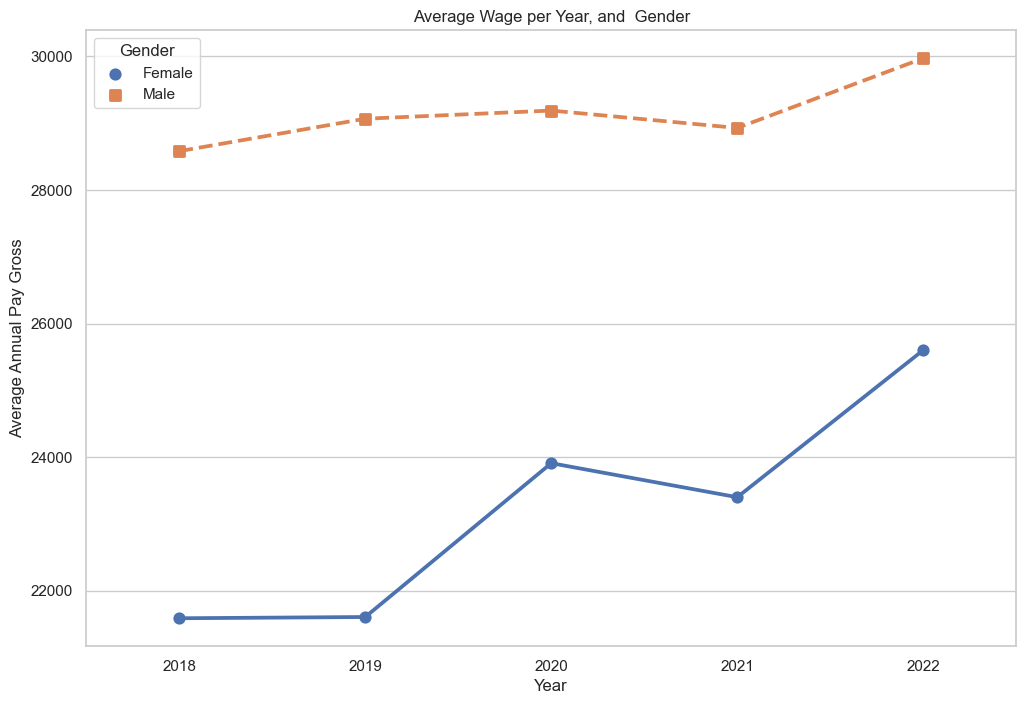

In [47]:
#Plot of the average wage per year, per male/female
sns.set(style="whitegrid")

# Grouping by year, sex, and work_type, and calculating the mean of Annual_pay_gross
grouped_data = wages_df.groupby(['year', 'sex'])['Annual_pay_gross'].mean().reset_index()

# Define custom legend labels and colors
custom_labels = ['Female', 'Male']
custom_colors = {'Female': 'blue', 'Male': 'orange'}

# Plotting using seaborn's pointplot
plt.figure(figsize=(12, 8))
sns.pointplot(x='year', y='Annual_pay_gross', hue='sex', markers=['o', 's'], linestyles=['-', '--'], data=grouped_data)

handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, custom_labels, title='Gender')

# plt.legend(title='Gender', labels=['Female', 'Male'])
plt.title('Average Wage per Year, and  Gender')
plt.xlabel('Year')
plt.ylabel('Average Annual Pay Gross')
plt.show()

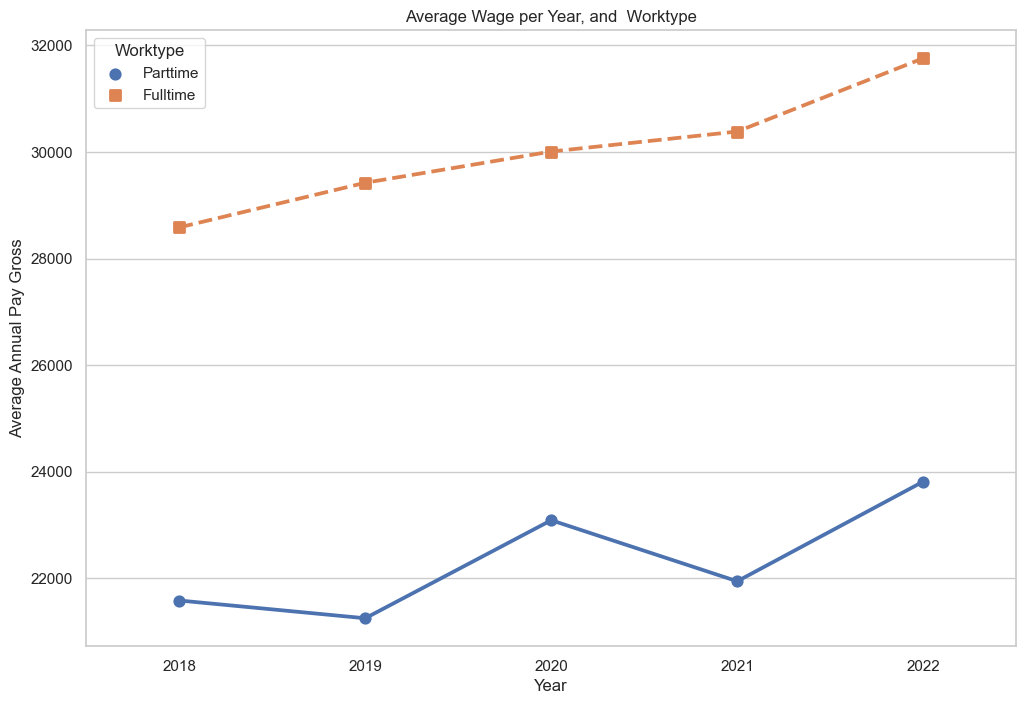

In [48]:
#Plot of the average wage per year, per male/female
sns.set(style="whitegrid")

# Grouping by year, sex, and work_type, and calculating the mean of Annual_pay_gross
grouped_data = wages_df.groupby(['year', 'work_type'])['Annual_pay_gross'].mean().reset_index()

# Define custom legend labels and colors
custom_labels = ['Parttime', 'Fulltime' ]
custom_colors = {'Parttime': 'blue', 'Fulltime': 'orange'}

# Plotting using seaborn's pointplot
plt.figure(figsize=(12, 8))
sns.pointplot(x='year', y='Annual_pay_gross', hue='work_type', markers=['o', 's'], linestyles=['-', '--'], data=grouped_data)

handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, custom_labels, title='Worktype')

# plt.legend(title='Worktype', labels=['Fulltime', 'Parttime'])
plt.title('Average Wage per Year, and  Worktype')
plt.xlabel('Year')
plt.ylabel('Average Annual Pay Gross')
plt.show()

###### Boxplot of Years and Annual Pay Gross

Text(0.5, 1.0, 'Boxplot of Annual Wages by year')

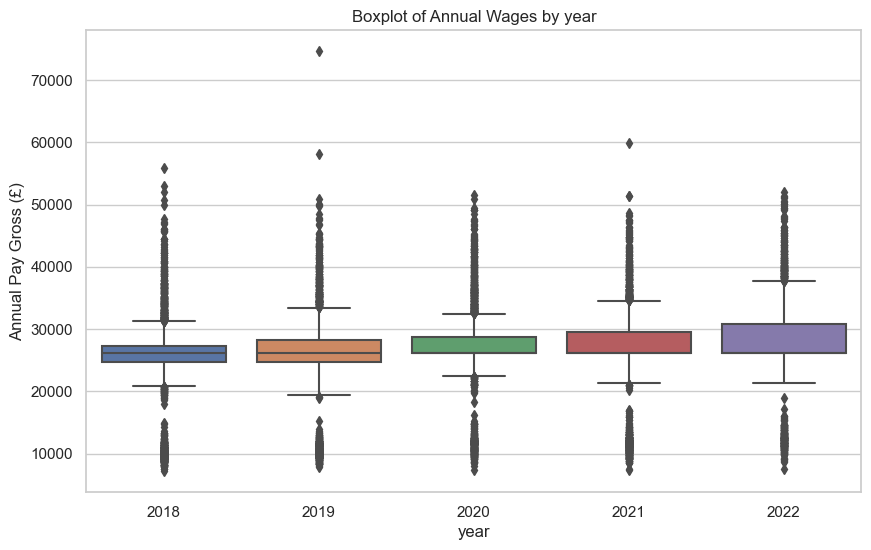

In [49]:
# Creates a boxplot of Annual Wages versus year
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='Annual_pay_gross', data=wages_df)

# Set labels and title
plt.xlabel('year')
plt.ylabel('Annual Pay Gross (£)')
plt.title('Boxplot of Annual Wages by year')

### To group the job titles into an occupation in order to compare occupations with Annual Pay Gross

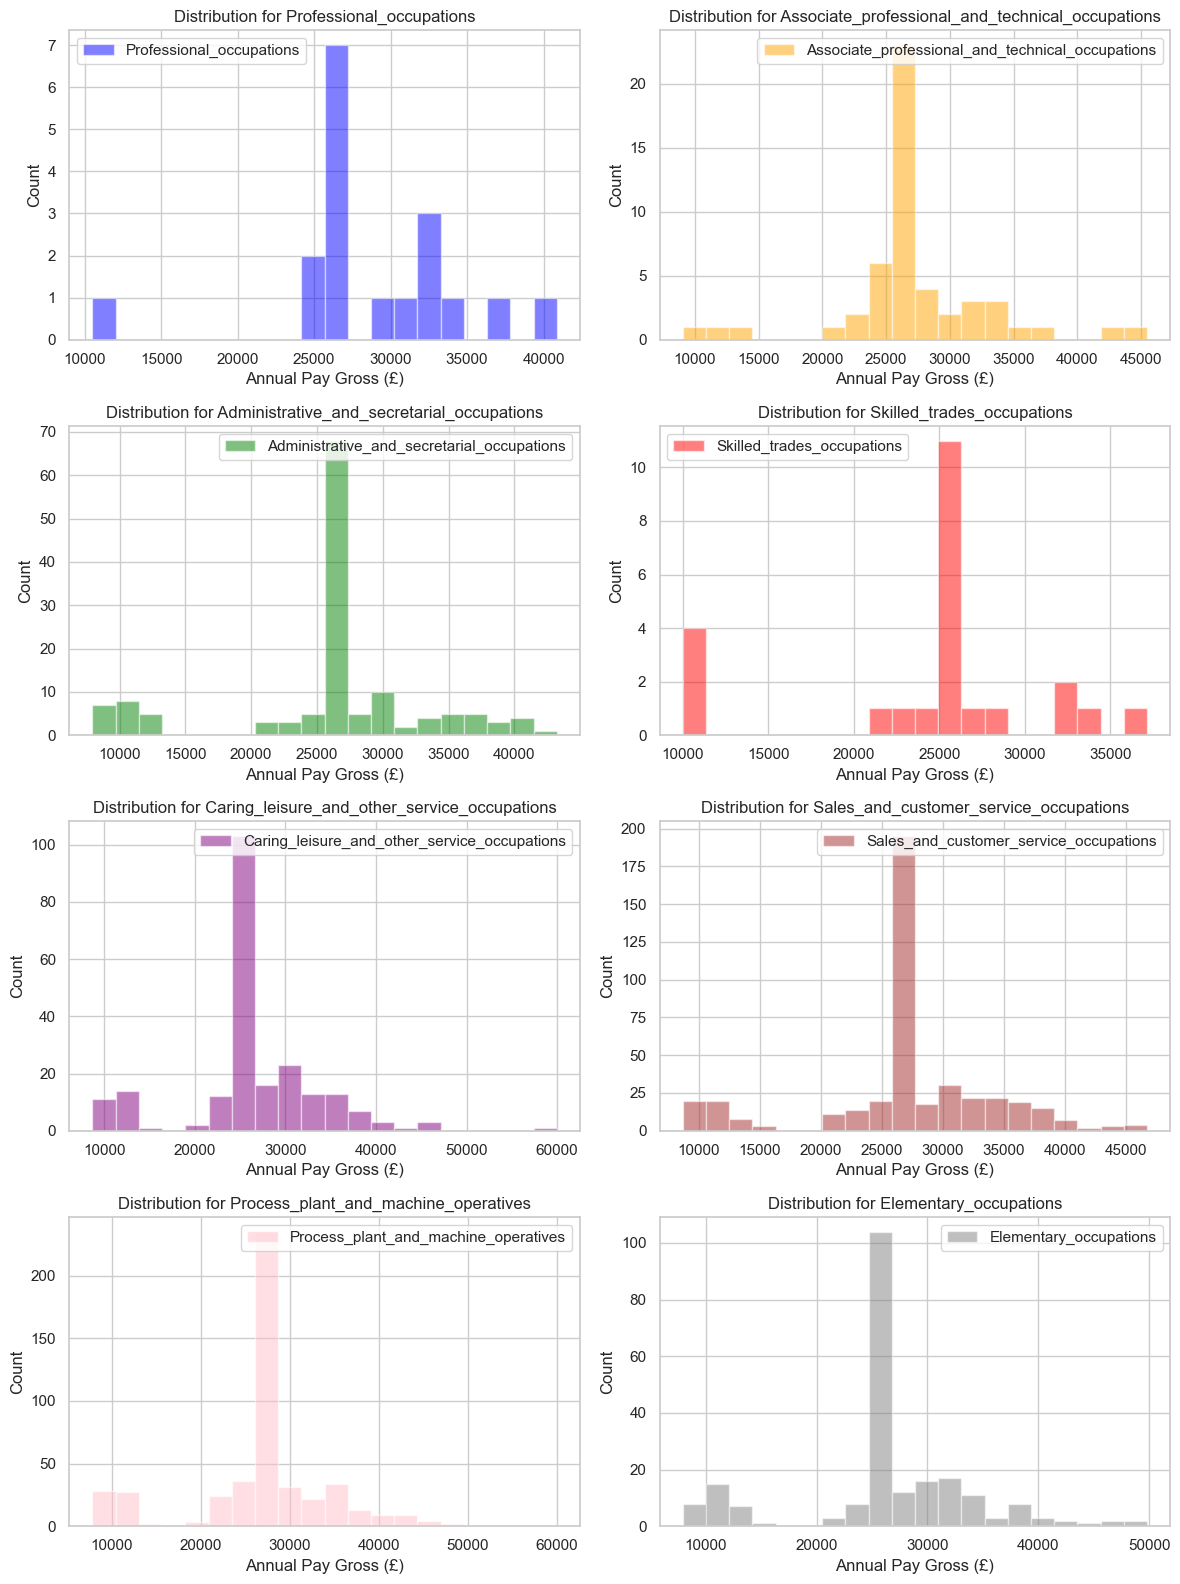

In [50]:
Occupations = Numeric_wages_df[['Professional_occupations', 'Associate_professional_and_technical_occupations',
                                'Administrative_and_secretarial_occupations', 'Skilled_trades_occupations',
                                'Caring_leisure_and_other_service_occupations', 'Sales_and_customer_service_occupations',
                                'Process_plant_and_machine_operatives', 'Elementary_occupations']]

# Defining a color palette
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

# Creating subplots for each job title category
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
fig.subplots_adjust(hspace=0.5)

for ax, column, color in zip(axes.flatten(), Occupations.columns, colors):
    ax.hist(Numeric_wages_df[Occupations[column] == 1]['Annual_pay_gross'], bins=20, alpha=0.5, label=column, color=color)
    ax.set_xlabel('Annual Pay Gross (£)')
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution for {column}')
    ax.legend()

plt.tight_layout()
plt.show()


### Checking the correlation co-efficients

In [51]:
# Determining the correlation co-efficients of the numeric columns
correlation_matrix = Numeric_wages_df.corr()
correlation_matrix

Hourly_pay_gross  \
Hourly_pay_gross                                            1.000000   
Hours_worked_total                                          0.608385   
Annual_pay_gross                                            0.700993   
sex                                                         0.212412   
year                                                        0.187107   
work_type                                                   0.658950   
No_qualifications                                          -0.076970   
Level_1_and_entry_level_qualifications                      0.175481   
Level_2_qualifications                                      0.062665   
Apprenticeship                                             -0.075995   
Level_3_qualifications                                      0.093257   
Level_4_qualifications_or_above                             0.042206   
Other_qualifications                                        0.015564   
Aged_15_years_and_under                                     0.009555   
Aged_16_to_64_years                                        -0.013677   
Aged_65_years_and_over                                     -0.000047   
Managers_directors_and_senior_officials                    -0.009629   
Professional_occupations                                   -0.009437   
Associate_professional_and_technical_occupations           -0.007150   
Administrative_and_secretarial_occupations                 -0.003827   
Skilled_trades_occupations                                 -0.004069   
Caring_leisure_and_other_service_occupations               -0.005496   
Sales_and_customer_service_occupations                     -0.004523   
Process_plant_and_machine_operatives                       -0.002730   
Elementary_occupations                                     -0.005459   
Disabled_under_the_Equality_Act                            -0.003328   
Not_disabled_under_the_Equality_Act                        -0.007526   
Asian_Asian_British_or_Asian_Welsh                         -0.016295   
Black_Black_British_Black_Welsh_Caribbean_or_Af...         -0.006446   
Mixed_or_Multiple_ethnic_groups                            -0.012480   
White                                                      -0.005139   
Other_ethnic_group                                         -0.013333   

                                                    Hours_worked_total  \
Hourly_pay_gross                                              0.608385   
Hours_worked_total                                            1.000000   
Annual_pay_gross                                              0.593792   
sex                                                           0.289163   
year                                                          0.000946   
work_type                                                     0.844699   
No_qualifications                                            -0.111020   
Level_1_and_entry_level_qualifications                        0.184359   
Level_2_qualifications                                        0.088794   
Apprenticeship                                               -0.008006   
Level_3_qualifications                                        0.067897   
Level_4_qualifications_or_above                              -0.041010   
Other_qualifications                                          0.057954   
Aged_15_years_and_under                                       0.001385   
Aged_16_to_64_years                                          -0.007684   
Aged_65_years_and_over                                       -0.010100   
Managers_directors_and_senior_officials                      -0.011922   
Professional_occupations                                     -0.011769   
Associate_professional_and_technical_occupations             -0.009118   
Administrative_and_secretarial_occupations                   -0.005168   
Skilled_trades_occupations                                   -0.003762   
Caring_leisure_and_other_service_occupations   

### FEATURE SELECTION USING CORRELATION MATRIX

In [52]:
# Correlation matrix of the numeric data  with annual pay gross
correlation_matrix = Numeric_wages_df.corr()
correlation_with_annual_pay = correlation_matrix['Annual_pay_gross'].sort_values(ascending=False)
correlation_with_annual_pay

Annual_pay_gross                                        1.000000
Hourly_pay_gross                                        0.700993
Hours_worked_total                                      0.593792
work_type                                               0.530392
sex                                                     0.408517
Level_1_and_entry_level_qualifications                  0.157844
year                                                    0.121522
Level_3_qualifications                                  0.087055
Level_2_qualifications                                  0.078182
Other_qualifications                                    0.023267
Aged_15_years_and_under                                 0.009436
Aged_65_years_and_over                                 -0.001603
Black_Black_British_Black_Welsh_Caribbean_or_African   -0.005629
Administrative_and_secretarial_occupations             -0.010121
Skilled_trades_occupations                             -0.011697
Caring_leisure_and_other_

##### To visualize the correlation relationships between the  features and "Annual_pay_gross"

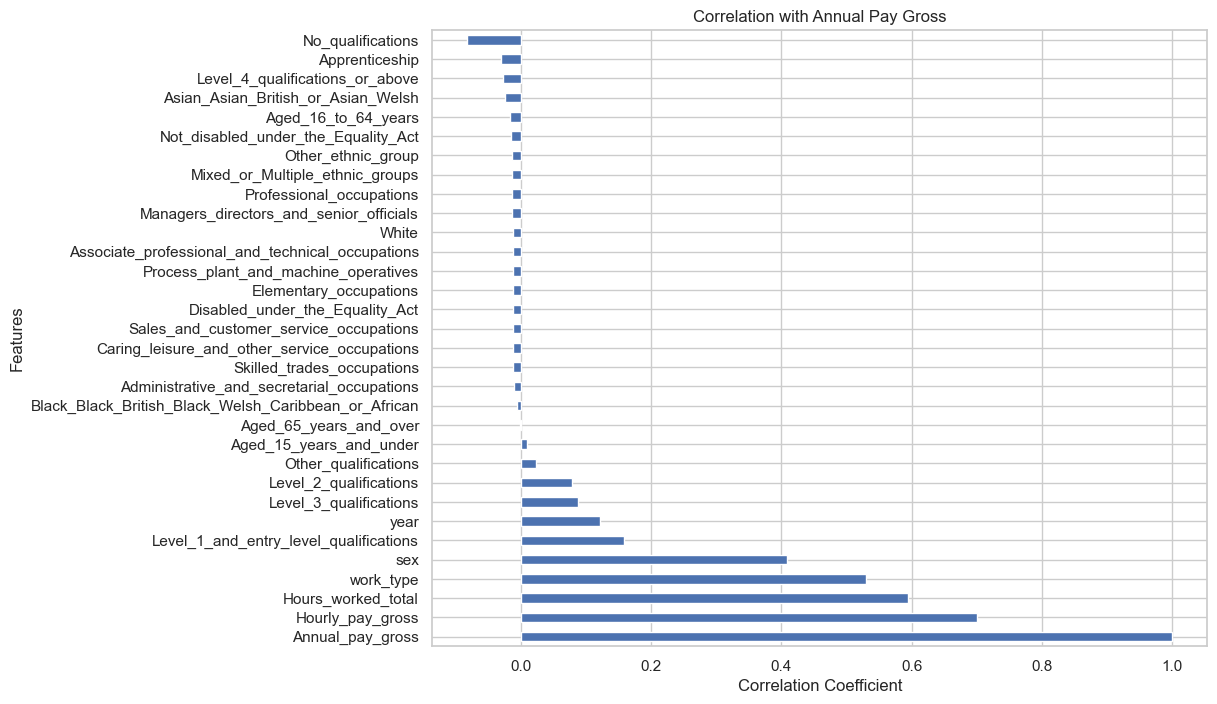

In [53]:
# Creates a horizontal bar chart to visualize feature correlations
plt.figure(figsize=(10, 8))
correlation_with_annual_pay.plot(kind='barh')
plt.title('Correlation with Annual Pay Gross')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

### SELECTING THE POSITIVELY CORRELATED FEATURES AND CREATING HEATMAP SCATTER PLOTS

In [54]:
# Selecting features with positive correlation
positive_correlated_features = correlation_matrix['Annual_pay_gross'][correlation_matrix['Annual_pay_gross'] > 0].index.tolist()

# Creating a new DataFrame with only the selected positive correlated features
filtered_positive_corr_feats_df = Numeric_wages_df[positive_correlated_features]
filtered_positive_corr_feats_df

Hourly_pay_gross  Hours_worked_total  Annual_pay_gross  sex  year  \
0                 12.97                37.7          31819.00    1  2018   
1                 13.61                39.0          26775.00    1  2018   
2                 14.27                39.0          31388.00    1  2018   
3                 12.72                37.5          28941.00    1  2018   
4                 17.60                38.6          33878.00    1  2018   
...                 ...                 ...               ...  ...   ...   
12635             12.00                18.5          26184.76    0  2022   
12636             12.49                18.5          26184.76    0  2022   
12637             12.63                19.3          15452.00    0  2022   
12638             12.96                18.3          26184.76    0  2022   
12639             11.19                20.0          26184.76    0  2022   

       work_type  Level_1_and_entry_level_qualifications  \
0              1                                    6367   
1              1                                    7273   
2              1                                    7056   
3              1                                    7718   
4              1                                    5960   
...          ...                                     ...   
12635          0                                   10923   
12636          0                                    7977   
12637          0                                    7223   
12638          0                                    9174   
12639          0                                    4979   

       Level_2_qualifications  Level_3_qualifications  Other_qualifications  \
0                        9174                   10849                  1692   
1                       10899                   13637                  1752   
2                       10293                   12915                  1953   
3                       11083                   13586                  1777   
4                        9631                   22179                  1783   
...                       ...                     ...                   ...   
12635                   14961                   17076                  3017   
12636                   10798                   14927                  2194   
12637                   10454                   15480                  2161   
12638                   12070                   14444                  2244   
12639                    8467                   29130                  1944   

       Aged_15_years_and_under  
0                           64  
1                          279  
2                          166  
3                           58  
4                            4  
...                        ...  
12635                      172  
12636                      172  
12637                      172  
12638                      172  
12639                      172  

[12640 rows x 11 columns]

#### FOR THE HEATMAP

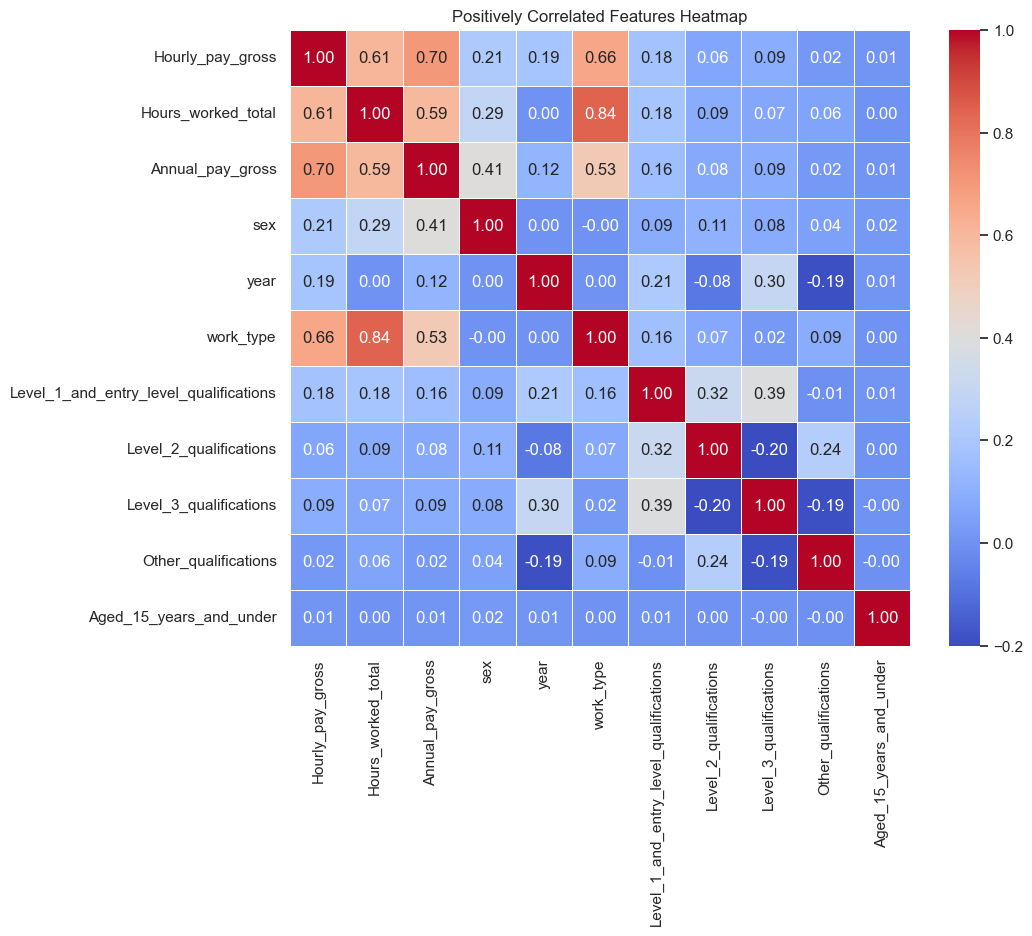

In [55]:
# Calculate the correlation matrix for the selected features
filtered_corr_matrix = filtered_positive_corr_feats_df.corr()

# Create a heatmap for positively correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Positively Correlated Features Heatmap')
plt.show()


###  FOR THE SCATTERPLOTS

In [56]:
# Funtion to create scatterplot between two numerical features
def scatterplot_func(x, y, title, x_label, y_label, data=filtered_positive_corr_feats_df):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

#### Hourly Pay Gross Vs Annual Pay

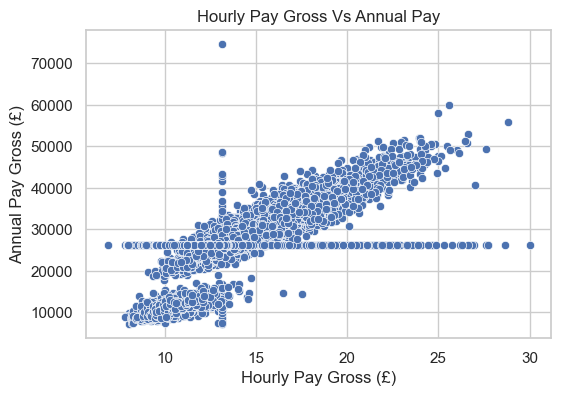

In [57]:
scatterplot_func('Hourly_pay_gross', 'Annual_pay_gross', 'Hourly Pay Gross Vs Annual Pay', 'Hourly Pay Gross (£)', 'Annual Pay Gross (£)')

#### Hours Worked Total Vs Annual Pay

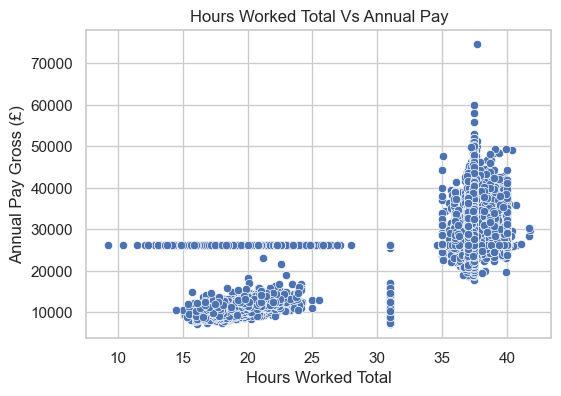

In [58]:
scatterplot_func(x="Hours_worked_total", y="Annual_pay_gross",
                 title="Hours Worked Total Vs Annual Pay",
                 x_label="Hours Worked Total", y_label="Annual Pay Gross (£)")

#### Sex Vs Annual Pay

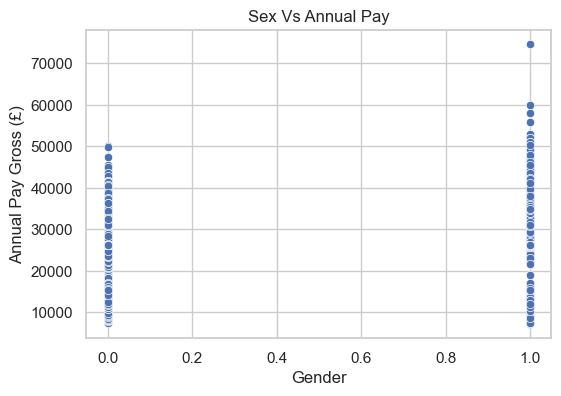

In [59]:
scatterplot_func(x="sex", y="Annual_pay_gross",
                 title="Sex Vs Annual Pay",
                 x_label="Gender", y_label="Annual Pay Gross (£)")

#### Years Vs Annual Pay

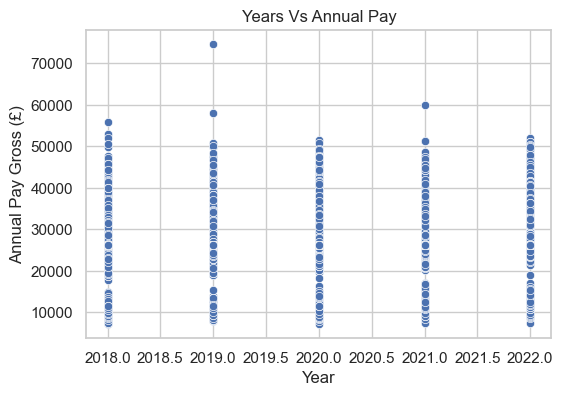

In [60]:
scatterplot_func(x="year", y="Annual_pay_gross",
                 title="Years Vs Annual Pay",
                 x_label="Year", y_label="Annual Pay Gross (£)")

#### Work Type Vs Annual Pay

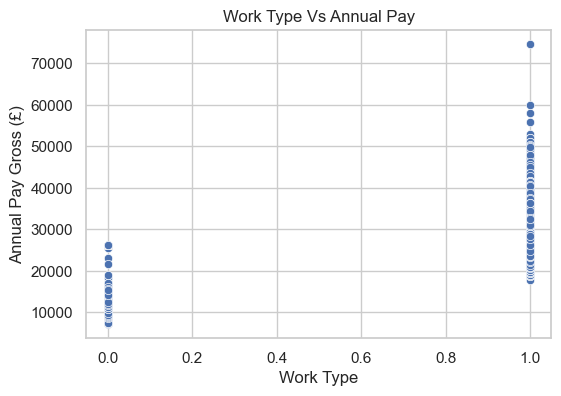

In [61]:
scatterplot_func(x="work_type", y="Annual_pay_gross",
                 title="Work Type Vs Annual Pay",
                 x_label="Work Type", y_label="Annual Pay Gross (£)")

#### Level 1 and Entry Level Qualification Vs Annual Pay

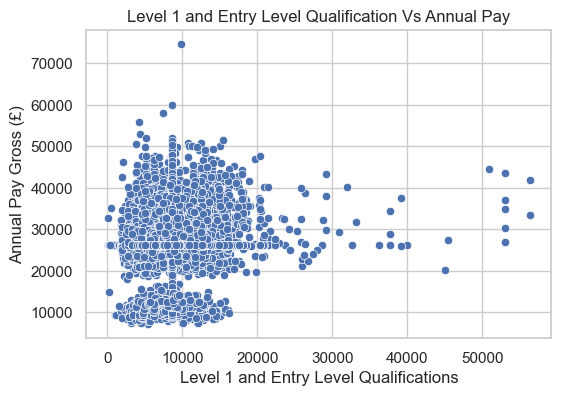

In [62]:
scatterplot_func(x="Level_1_and_entry_level_qualifications", y="Annual_pay_gross",
                 title="Level 1 and Entry Level Qualification Vs Annual Pay",
                 x_label="Level 1 and Entry Level Qualifications", y_label="Annual Pay Gross (£)")

#### Level 2 Qualifications Vs Annual Pay

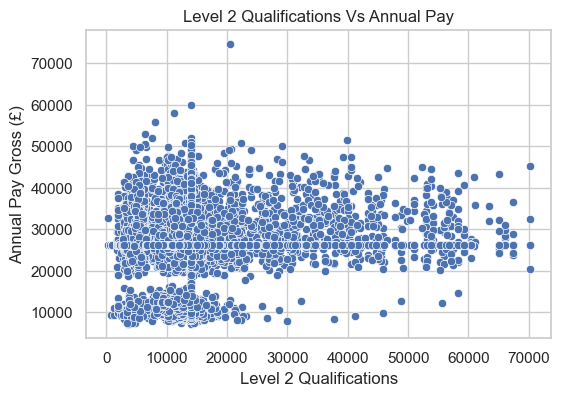

In [63]:
scatterplot_func(x="Level_2_qualifications", y="Annual_pay_gross",
                 title="Level 2 Qualifications Vs Annual Pay",
                 x_label="Level 2 Qualifications", y_label="Annual Pay Gross (£)")

#### Level 3 Qualifications Vs Annual Pay

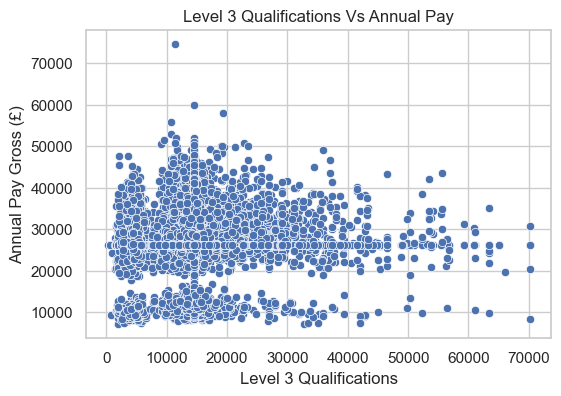

In [64]:
scatterplot_func(x="Level_3_qualifications", y="Annual_pay_gross",
                 title="Level 3 Qualifications Vs Annual Pay",
                 x_label="Level 3 Qualifications", y_label="Annual Pay Gross (£)")

#### Other Qualifications Vs Annual Pay

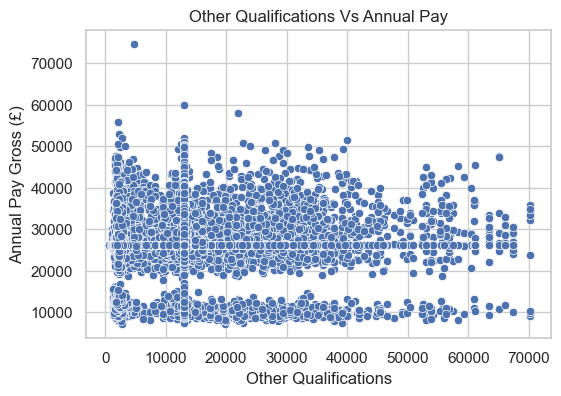

In [65]:
scatterplot_func(x="Other_qualifications", y="Annual_pay_gross",
                 title="Other Qualifications Vs Annual Pay",
                 x_label="Other Qualifications", y_label="Annual Pay Gross (£)")

#### Aged 15 Years and Under Vs Annual Pay

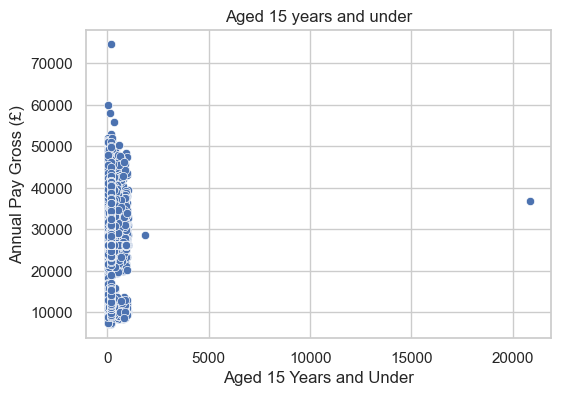

In [66]:
scatterplot_func(x="Aged_15_years_and_under", y="Annual_pay_gross",
                 title="Aged 15 years and under",
                 x_label="Aged 15 Years and Under", y_label="Annual Pay Gross (£)")

### TO CHECK THE TOP AND BOTTOM EARNING CONSTITUENCIES

##### - For top earning constituencies

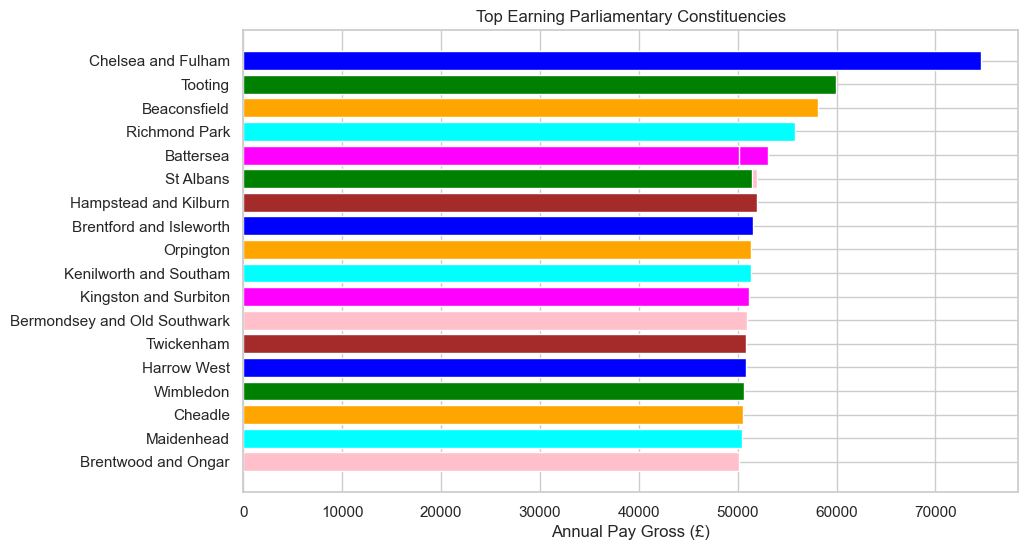

In [68]:
# Sort the DataFrame by "Annual_pay_gross" in descending order to find the top earning constituencies
top_earning_constituencies = wages_df.sort_values(by="Annual_pay_gross", ascending=False).head(20)

# Defining custom colors for the bars
colors = ['blue', 'green', 'orange', 'cyan', 'magenta', 'pink', 'brown']
# Create a bar chart to visualize the top earning constituencies
plt.figure(figsize=(10, 6))
plt.barh(top_earning_constituencies['Parliamentary_constituencies'], top_earning_constituencies['Annual_pay_gross'], color=colors)
plt.xlabel('Annual Pay Gross (£)')
plt.title('Top Earning Parliamentary Constituencies')
plt.gca().invert_yaxis()  # Inverts the y-axis for better readability

# Show the chart
plt.show()

From the above, it can be seen that Chelsea and Fulham is the topmost earning contituency followed by Tooting.\
It can also be observed that there is a break in the bar for Battersea and St Albans; this is due to the fact that:
 - Battersea had a high anual earnings of 53045 for males in 2018 and 50159 for females in 2022
 - Also, St Albans had a high anual earnings of 52006 in 2022 and 51430 in 2021 both for males
as seen from the foloowing cells bellow.

In [71]:
top_earning_constituencies.loc[top_earning_constituencies['Parliamentary_constituencies'] == 'Battersea']

Parliamentary_constituencies  Hourly_pay_gross  Hours_worked_total  \
322                      Battersea              26.6                37.5   
11698                    Battersea              23.4                37.5   

       Annual_pay_gross  sex  year  work_type  No_qualifications  \
322             53045.0    1  2018          1               9217   
11698           50159.0    0  2022          1               7823   

       Level_1_and_entry_level_qualifications  Level_2_qualifications  ...  \
322                                      4353                    6419  ...   
11698                                   11243                    4404  ...   

       Sales_and_customer_service_occupations  \
322                                       215   
11698                                      81   

       Process_plant_and_machine_operatives  Elementary_occupations  \
322                                     279                     360   
11698                                    76                     108   

       Disabled_under_the_Equality_Act  Not_disabled_under_the_Equality_Act  \
322                               1316                                 5457   
11698                              438                                 1980   

       Asian_Asian_British_or_Asian_Welsh  \
322                                    73   
11698                                  78   

       Black_Black_British_Black_Welsh_Caribbean_or_African  \
322                                                   36      
11698                                                 27      

       Mixed_or_Multiple_ethnic_groups  White  Other_ethnic_group  
322                                 85   6573                   5  
11698                               44   2252                  17  

[2 rows x 33 columns]

In [72]:
top_earning_constituencies.loc[top_earning_constituencies['Parliamentary_constituencies'] == 'St Albans']

Parliamentary_constituencies  Hourly_pay_gross  Hours_worked_total  \
10424                    St Albans             24.00                37.5   
7896                     St Albans             26.48                37.5   

       Annual_pay_gross  sex  year  work_type  No_qualifications  \
10424           52006.0    1  2022          1              11699   
7896            51430.0    1  2021          1              11699   

       Level_1_and_entry_level_qualifications  Level_2_qualifications  ...  \
10424                                    8684                   14017  ...   
7896                                     8684                   14017  ...   

       Sales_and_customer_service_occupations  \
10424                                      34   
7896                                        7   

       Process_plant_and_machine_operatives  Elementary_occupations  \
10424                                    47                      47   
7896                                     12                      16   

       Disabled_under_the_Equality_Act  Not_disabled_under_the_Equality_Act  \
10424                              170                                  968   
7896                                68                                  288   

       Asian_Asian_British_or_Asian_Welsh  \
10424                                   2   
7896                                    1   

       Black_Black_British_Black_Welsh_Caribbean_or_African  \
10424                                                  1      
7896                                                   0      

       Mixed_or_Multiple_ethnic_groups  White  Other_ethnic_group  
10424                                9   1123                   1  
7896                                 0    355                   0  

[2 rows x 33 columns]

##### - For bottom earning constituencies

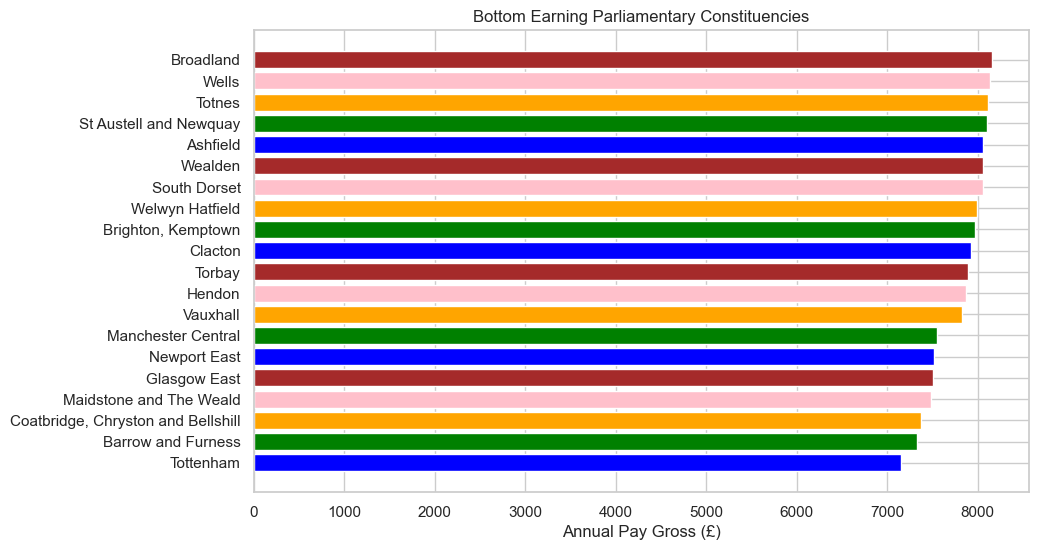

In [73]:
# Sort the DataFrame by "Annual_pay_gross" in ascending order to find the bottom earning constituencies
bottom_earning_constituencies = wages_df.sort_values(by="Annual_pay_gross").head(20)

# Defining custom colors for the bars
colors = ['blue', 'green', 'orange', 'pink', 'brown']

# Creates a bar chart to visualize the bottom earning constituencies
plt.figure(figsize=(10, 6))
plt.barh(bottom_earning_constituencies['Parliamentary_constituencies'], bottom_earning_constituencies['Annual_pay_gross'], color=colors)
plt.xlabel('Annual Pay Gross (£)')
plt.title('Bottom Earning Parliamentary Constituencies')

# Show the chart
plt.show()

From the above, it can be seen that Broadland is the topmost earning contituency followed by Wells.

##### plot wages on a map of the UK, where the colour is the amount of wages (any plot would just be for one year)

In [74]:
# Load the CSV file containing both attributes and geometry information
constituencies_csv_path = 'Westminster_Parliamentary_Constituencies_Dec_2021_UK_BFE_2022.csv'
constituencies_gdf = gpd.read_file(constituencies_csv_path)


In [75]:
constituencies_gdf.head()

OBJECTID   PCON21CD Parliamentary_constituencies   BNG_E   BNG_N      LONG  \
0        1  E14000530                    Aldershot  484884  155126   -0.7841   
1        2  E14000531          Aldridge-Brownhills  404723  302568  -1.93166   
2        3  E14000532     Altrincham and Sale West  374132  389051  -2.39049   
3        4  E14000533                 Amber Valley  440478  349675   -1.3977   
4        5  E14000534      Arundel and South Downs  510686  115542  -0.42635   

        LAT                              GlobalID  Shape__Area Shape__Length  \
0  51.28895  343e8dc7-3e36-4ae9-a696-0f4be7db7f88  52978156.02   42197.66173   
1  52.62087  5402080a-0523-4a4c-83f3-1d9c8b5e5cc9  44016547.98   38590.17796   
2  53.39766  ecee48b6-c31b-4998-97df-f02b67089c78  50930495.54   47809.30036   
3  53.04283  d2470af3-d629-4f58-a497-76e429c23279  124646400.8   64666.58661   
4  50.92871  c29c56a9-281a-45de-824f-263deb7ab030  646512824.6   231000.8274   

  geometry  
0     None  
1     None  
2     None  
3     None  
4     None

In [76]:
wages_df_modified.head()

Parliamentary_constituencies  Hourly_pay_gross  Hours_worked_total  \
0           Berwick-upon-Tweed             12.97                37.7   
1              Bishop Auckland             13.61                39.0   
2                      Blaydon             14.27                39.0   
3                 Blyth Valley             12.72                37.5   
4               City of Durham             17.60                38.6   

   Annual_pay_gross  sex  year  work_type  No_qualifications  \
0           31819.0    1  2018          1              11769   
1           26775.0    1  2018          1              16616   
2           31388.0    1  2018          1              14168   
3           28941.0    1  2018          1              13405   
4           33878.0    1  2018          1              13193   

   Level_1_and_entry_level_qualifications  Level_2_qualifications  ...  \
0                                    6367                    9174  ...   
1                                    7273                   10899  ...   
2                                    7056                   10293  ...   
3                                    7718                   11083  ...   
4                                    5960                    9631  ...   

   Sales_and_customer_service_occupations  \
0                                       8   
1                                      73   
2                                      20   
3                                       8   
4                                       2   

   Process_plant_and_machine_operatives  Elementary_occupations  \
0                                    17                      28   
1                                    55                     100   
2                                     9                      18   
3                                    10                      20   
4                                     0                       3   

   Disabled_under_the_Equality_Act  Not_disabled_under_the_Equality_Act  \
0                              101                                  445   
1                              313                                 1341   
2                               98                                  665   
3                              110                                  341   
4                                7                                   56   

   Asian_Asian_British_or_Asian_Welsh  \
0                                   5   
1                                  10   
2                                   9   
3                                   5   
4                                   0   

   Black_Black_British_Black_Welsh_Caribbean_or_African  \
0                                                  0      
1                                                  8      
2                                                  1      
3                                                  0      
4                                                  0      

   Mixed_or_Multiple_ethnic_groups  White  Other_ethnic_group  
0                                5    532                   3  
1                               25   1608                   2  
2                               14    738                   0  
3                                7    439                   0  
4                                0     62                   0  

[5 rows x 33 columns]

In [77]:
wages_df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12640 entries, 0 to 12639
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Parliamentary_constituencies                          12640 non-null  object 
 1   Hourly_pay_gross                                      12640 non-null  float64
 2   Hours_worked_total                                    12640 non-null  float64
 3   Annual_pay_gross                                      12640 non-null  float64
 4   sex                                                   12640 non-null  int32  
 5   year                                                  12640 non-null  int64  
 6   work_type                                             12640 non-null  int32  
 7   No_qualifications                                     12640 non-null  int32  
 8   Level_1_and_entry_level_qualifications                12

In [79]:
# Merge DataFrames based on a common identifier
merged_df = constituencies_gdf.merge(wages_df_modified, how='left', left_on='Parliamentary_constituencies', right_on='Parliamentary_constituencies')
merged_df

OBJECTID   PCON21CD Parliamentary_constituencies   BNG_E   BNG_N  \
0            1  E14000530                    Aldershot  484884  155126   
1            1  E14000530                    Aldershot  484884  155126   
2            1  E14000530                    Aldershot  484884  155126   
3            1  E14000530                    Aldershot  484884  155126   
4            1  E14000530                    Aldershot  484884  155126   
...        ...        ...                          ...     ...     ...   
12615      650  W07000080    Cardiff South and Penarth  317947  171807   
12616      650  W07000080    Cardiff South and Penarth  317947  171807   
12617      650  W07000080    Cardiff South and Penarth  317947  171807   
12618      650  W07000080    Cardiff South and Penarth  317947  171807   
12619      650  W07000080    Cardiff South and Penarth  317947  171807   

           LONG       LAT                              GlobalID  Shape__Area  \
0       -0.7841  51.28895  343e8dc7-3e36-4ae9-a696-0f4be7db7f88  52978156.02   
1       -0.7841  51.28895  343e8dc7-3e36-4ae9-a696-0f4be7db7f88  52978156.02   
2       -0.7841  51.28895  343e8dc7-3e36-4ae9-a696-0f4be7db7f88  52978156.02   
3       -0.7841  51.28895  343e8dc7-3e36-4ae9-a696-0f4be7db7f88  52978156.02   
4       -0.7841  51.28895  343e8dc7-3e36-4ae9-a696-0f4be7db7f88  52978156.02   
...         ...       ...                                   ...          ...   
12615  -3.18191  51.43929  42f55c2a-b376-48b8-bf93-8374200a0013  56896131.48   
12616  -3.18191  51.43929  42f55c2a-b376-48b8-bf93-8374200a0013  56896131.48   
12617  -3.18191  51.43929  42f55c2a-b376-48b8-bf93-8374200a0013  56896131.48   
12618  -3.18191  51.43929  42f55c2a-b376-48b8-bf93-8374200a0013  56896131.48   
12619  -3.18191  51.43929  42f55c2a-b376-48b8-bf93-8374200a0013  56896131.48   

      Shape__Length  ... Sales_and_customer_service_occupations  \
0       42197.66173  ...                                    0.0   
1       42197.66173  ...                                  109.0   
2       42197.66173  ...                                  208.0   
3       42197.66173  ...                                    9.0   
4       42197.66173  ...                                    7.0   
...             ...  ...                                    ...   
12615   66175.77904  ...                                   38.0   
12616   66175.77904  ...                                    5.0   
12617   66175.77904  ...                                   16.0   
12618   66175.77904  ...                                   81.0   
12619   66175.77904  ...                                   81.0   

       Process_plant_and_machine_operatives  Elementary_occupations  \
0                                       1.0                     3.0   
1                                      93.0                   170.0   
2                                     196.0                   286.0   
3                                       6.0                     8.0   
4                                       2.0                     2.0   
...                                     ...                     ...   
12615                                  41.0                    54.0   
12616                                   9.0                    12.0   
12617                                  25.0                    39.0   
12618                                  76.0                   108.0   
12619                                  76.0                   108.0   

       Disabled_under_the_Equality_Act  Not_disabled_under_the_Equality_Act  \
0                                 14.0                                 76.0   
1                                731.0                               3100.0   
2                               1108.0                               6883.0   
3                                 50.0                                202.0   
4                                  6.0                                 92.0   
...                     

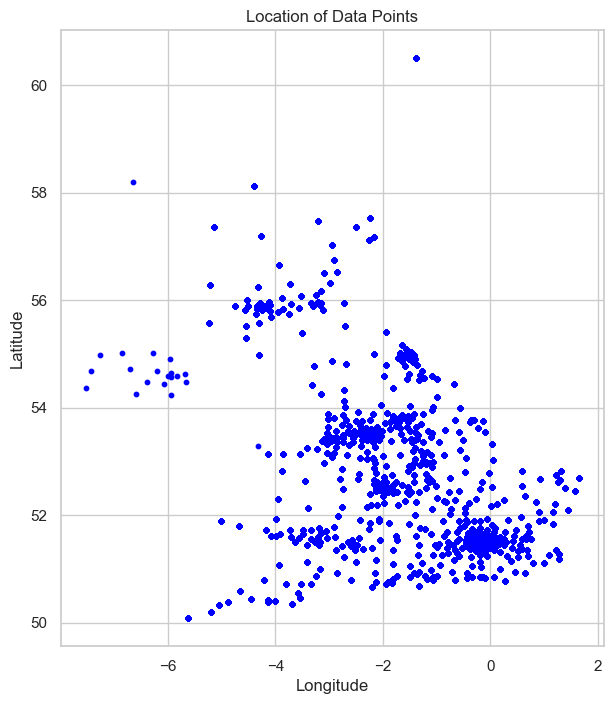

In [80]:
geometry = gpd.points_from_xy(merged_df['LONG'], merged_df['LAT'])

# Create a GeoDataFrame with the point geometry
geo_df = gpd.GeoDataFrame(merged_df, geometry=geometry)

# Plotting the map with points
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
geo_df.plot(ax=ax, color='blue', markersize=10)

# Customize the plot as needed
ax.set_title('Location of Data Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

C:\Program Files\Python311\Lib\site-packages\geopandas\plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


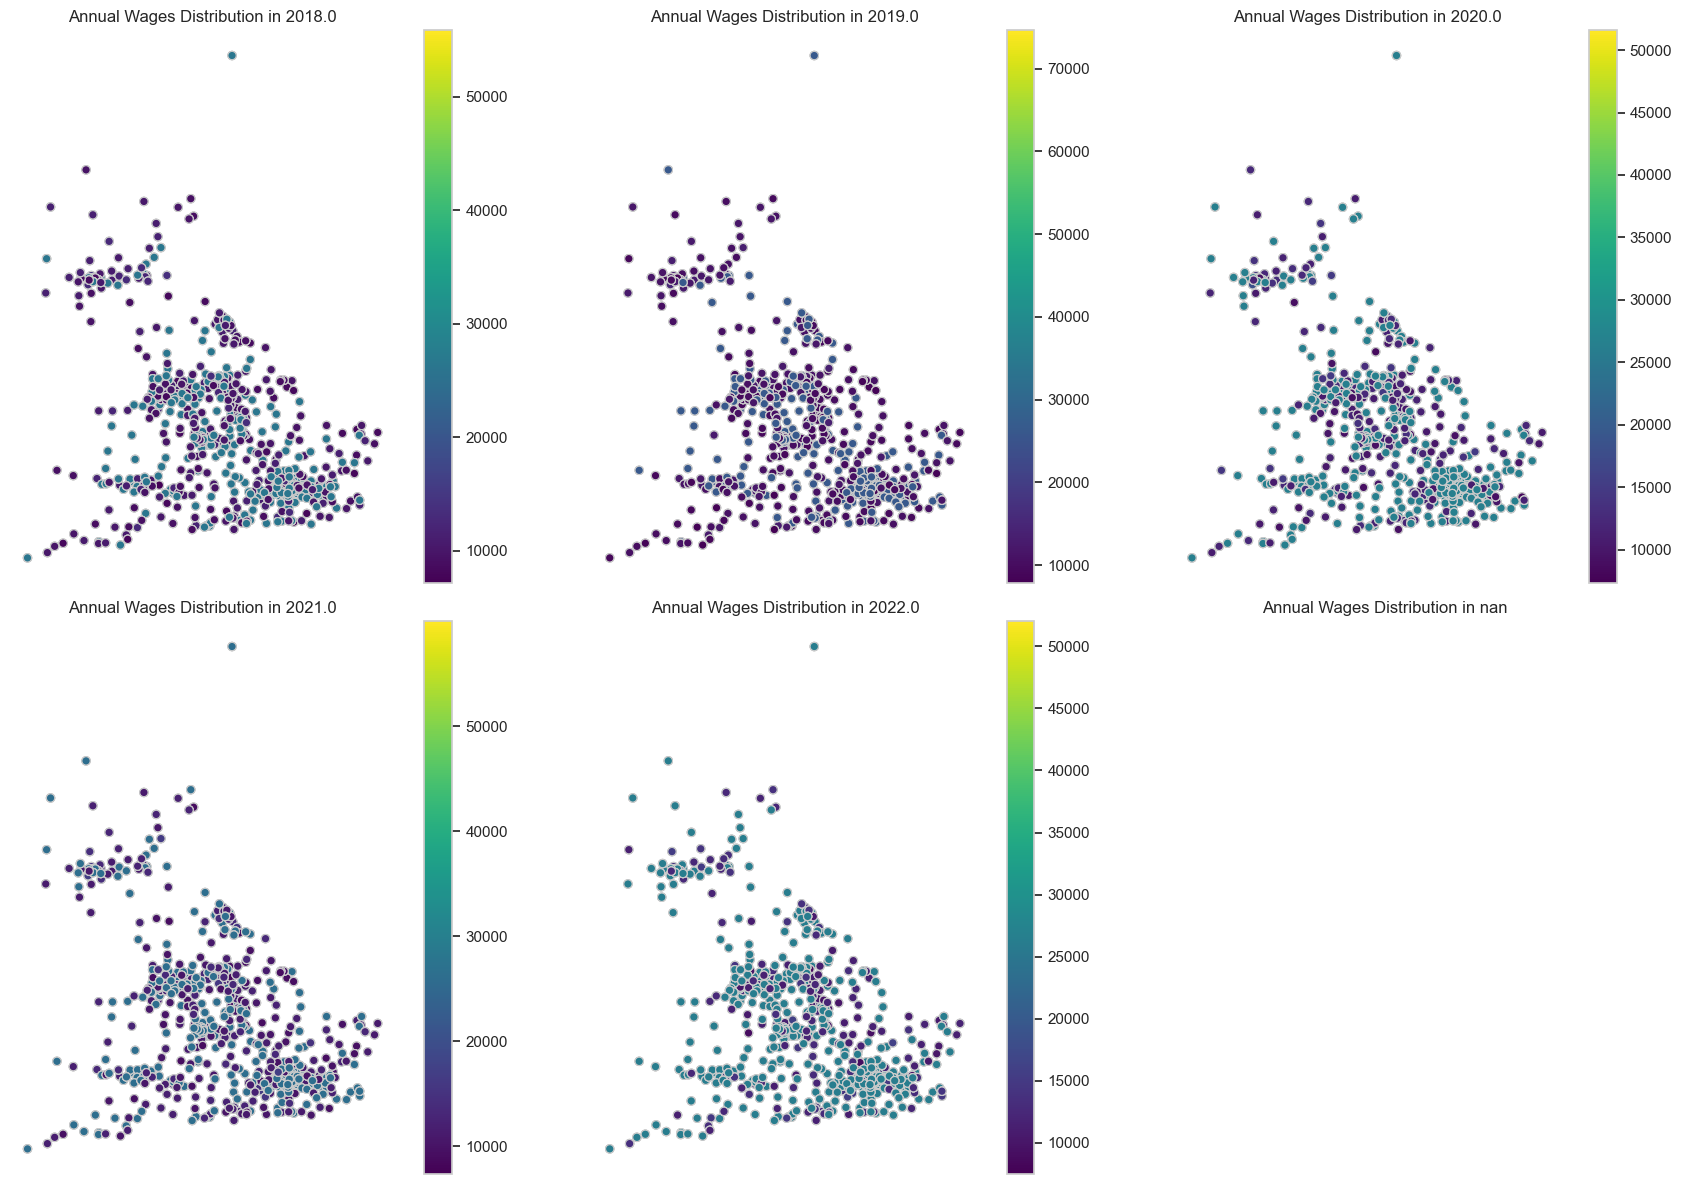

In [81]:
unique_years = geo_df['year'].unique()

num_years = len(unique_years)
num_rows = (num_years - 1) // 3 + 1  # Calculate the number of rows needed based on the number of years
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows), sharex=True, sharey=True)

for i, year in enumerate(unique_years):
    ax = axes.flatten()[i]
    geo_df_year = geo_df[geo_df['year'] == year]
    geo_df_year.plot(column='Annual_pay_gross', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Customizes the legend
    legend = ax.get_legend()
    if legend is not None:
        legend.set_title('Annual Pay Gross')
        for label in legend.get_texts():
            label.set_text('Annual Pay Gross')

    ax.set_title(f'Annual Wages Distribution in {year}')
    ax.set_axis_off()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### Treating Outliers

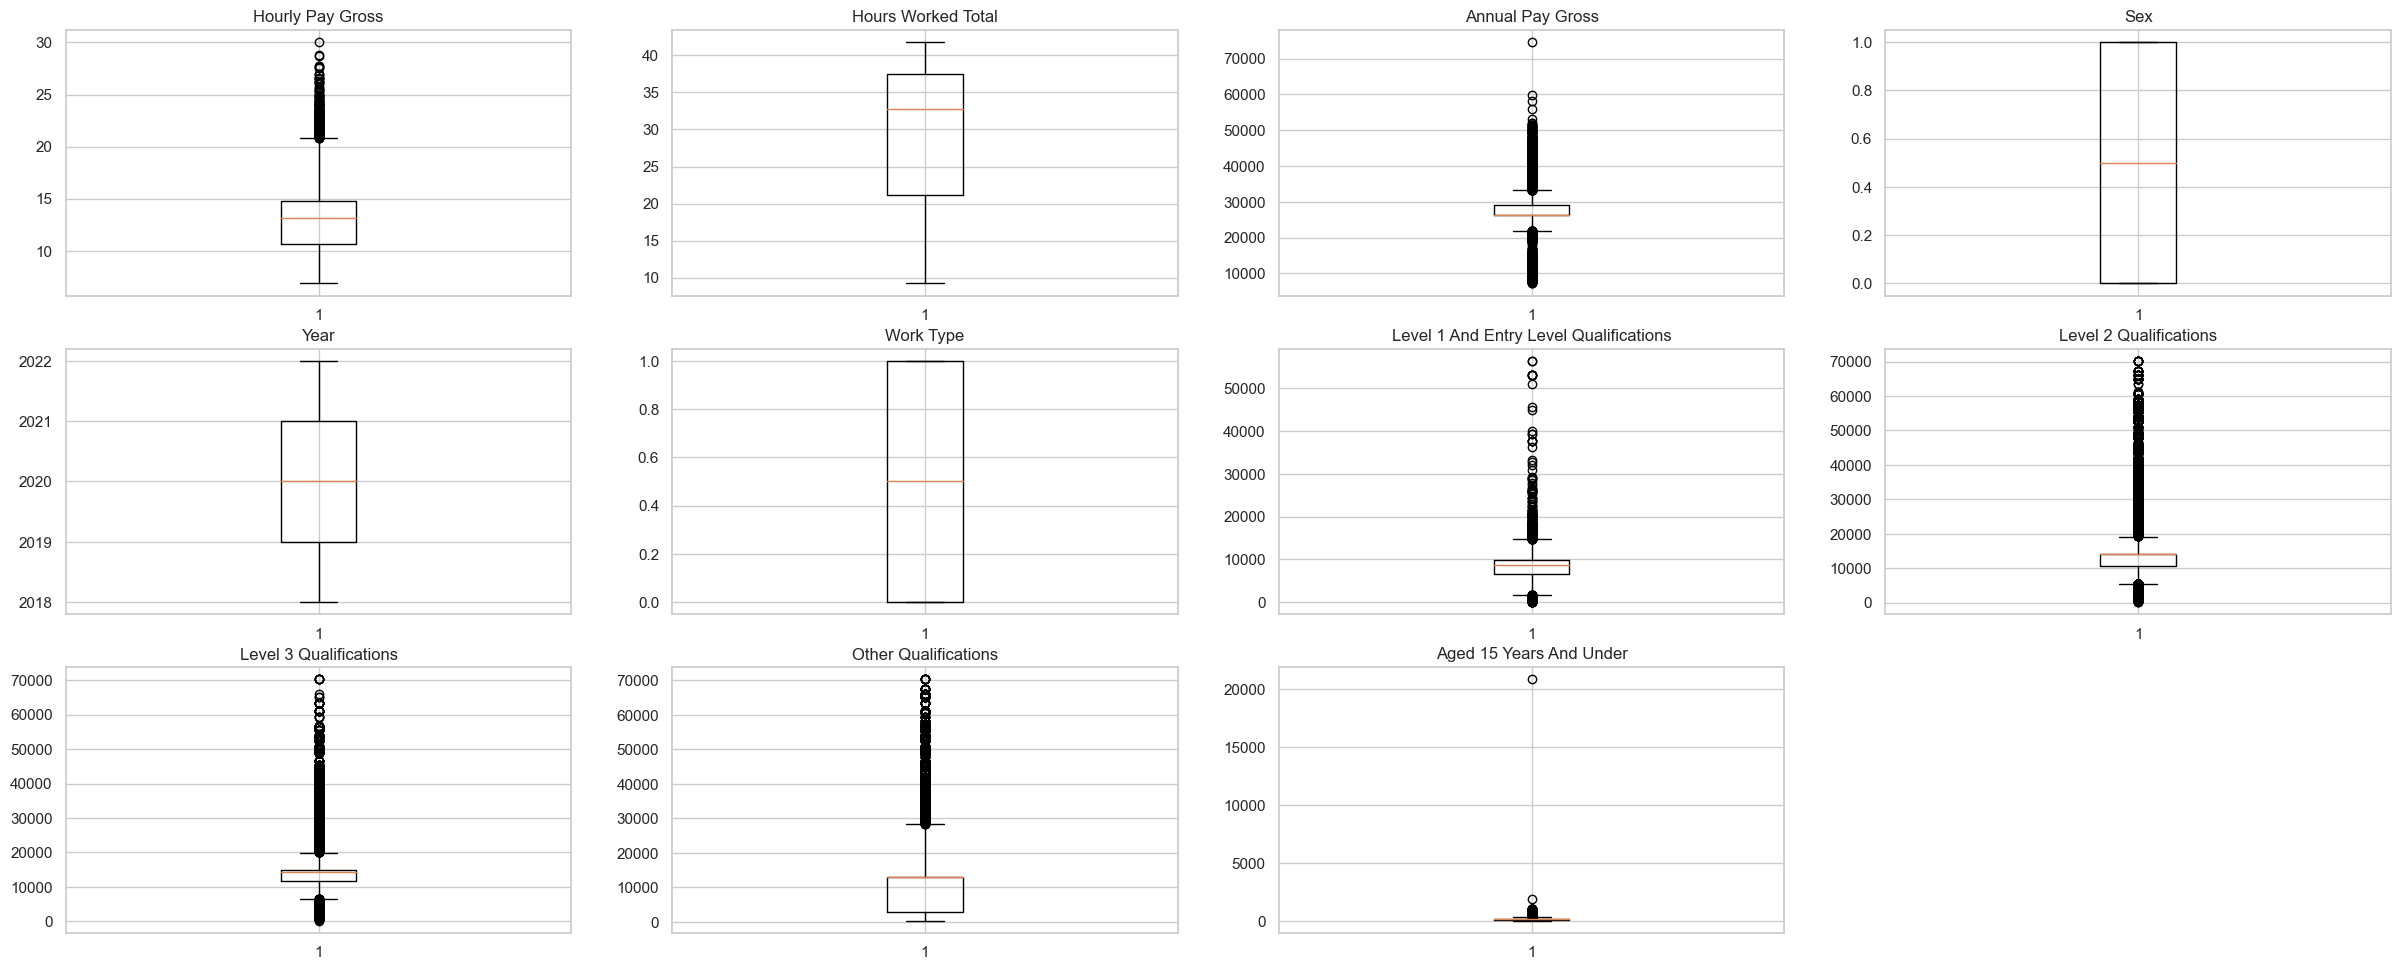

In [82]:
# Creating plots to determine the features containing outliers
plt.figure(figsize=(30, 20))
for i, feature in enumerate(filtered_positive_corr_feats_df):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(filtered_positive_corr_feats_df[feature])
    plt.title(feature.replace('_', ' ').title())  # Replace underscores in the title
plt.show()

### Dropping the features without outliers and assigning to another variable

In [83]:
Feats_without_outliers = ['Hours_worked_total', 'sex', 'year', 'work_type']
Feats_with_outliers = filtered_positive_corr_feats_df.drop(Feats_without_outliers, axis=1)

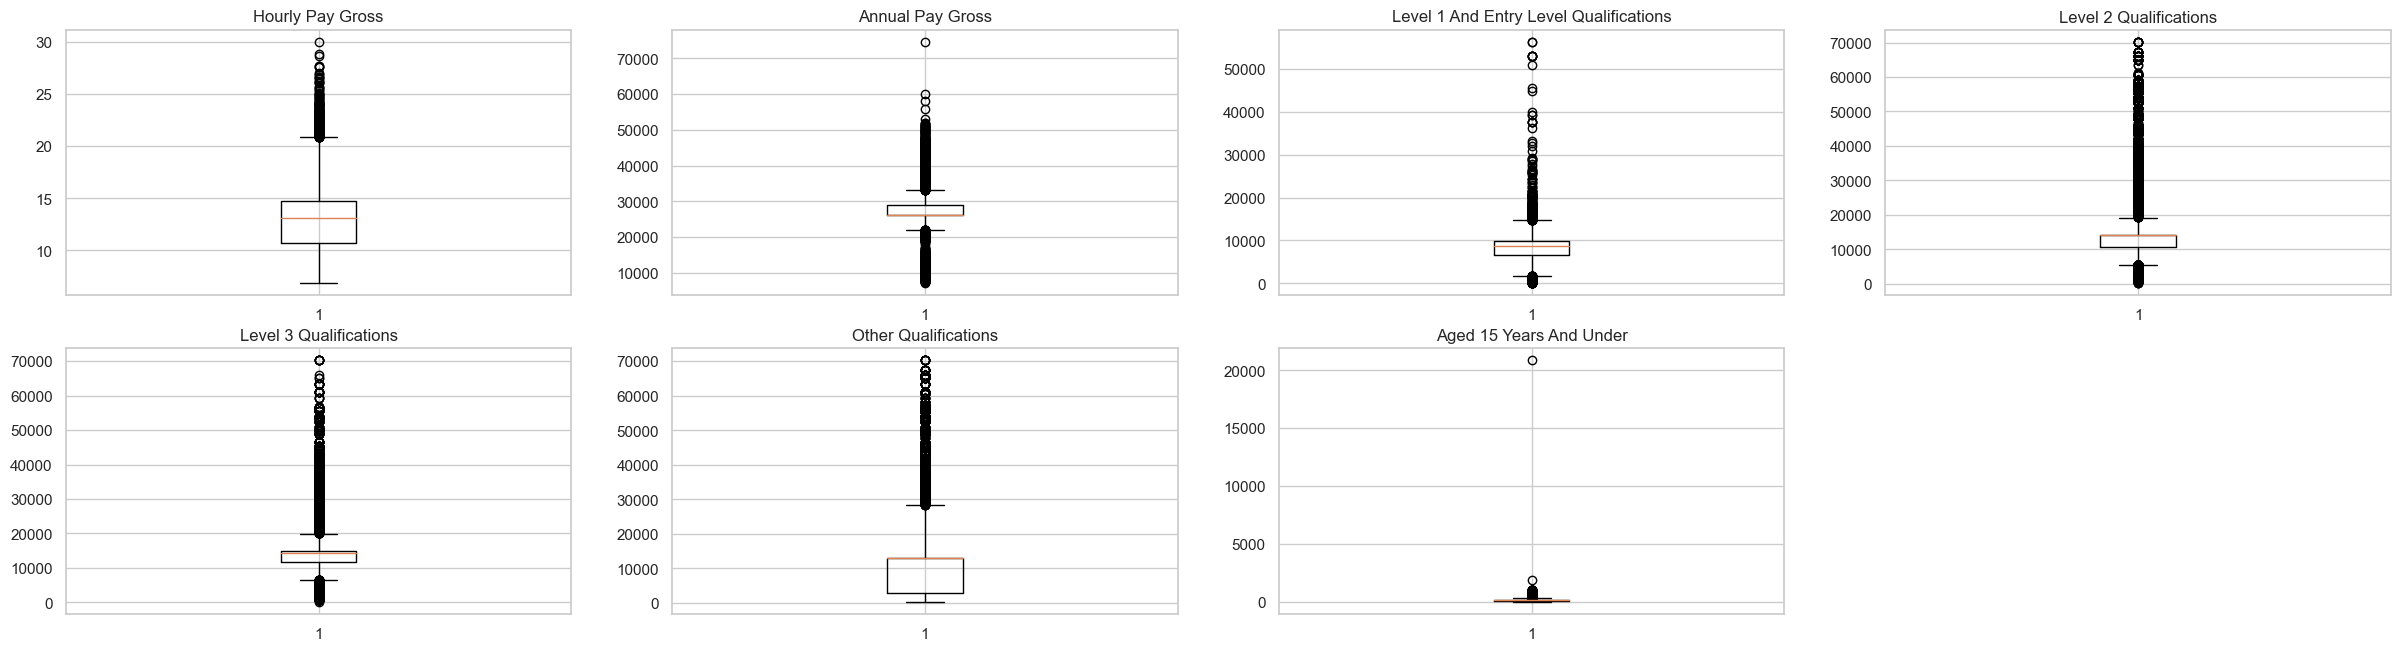

In [84]:
# Creating plots to show only the features containing outliers
plt.figure(figsize=(30,20))
for i, feature in enumerate(Feats_with_outliers):
  plt.subplot(5,4, i+1)
  plt.boxplot(Feats_with_outliers[feature])
  plt.title(feature.replace('_', ' ').title())  # Replace underscores in the title
plt.show()

In [85]:
Feats_with_outliers.drop('Annual_pay_gross', axis =1, inplace=True)

In [86]:
def outliers_treatment(df,col):
  Q1 =Numeric_wages_df[col].quantile(0.25)
  Q3 =Numeric_wages_df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower=Q1-(1.5*IQR)
  upper= Q3+(1.5*IQR)
  df[col]=np.clip(Numeric_wages_df[col],lower,upper)
  return Numeric_wages_df

In [87]:
def treat_outliers(Numeric_wages_df, col_list):
  for c in col_list:
    Numeric_wages_df=outliers_treatment(Numeric_wages_df,c)
  return Numeric_wages_df

In [88]:
Numeric_wages_df=treat_outliers(Numeric_wages_df, Feats_with_outliers)

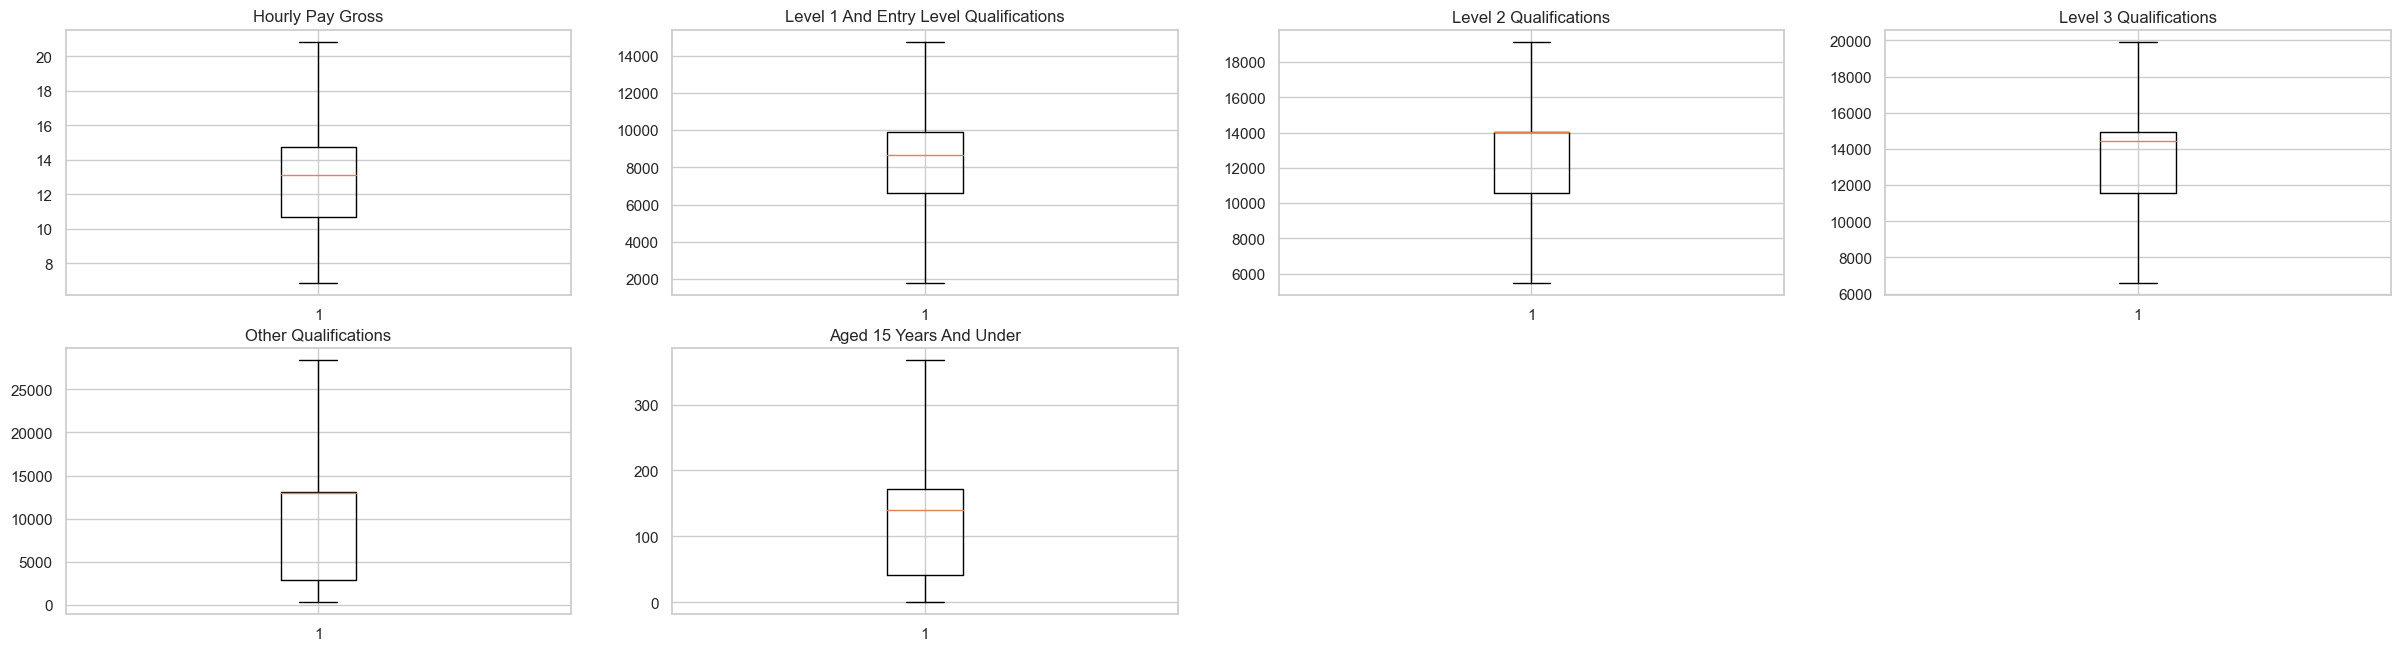

In [89]:
plt.figure(figsize=(30,20))
for i, feature in enumerate(Feats_with_outliers):
  plt.subplot(5,4, i+1)
  plt.boxplot(Numeric_wages_df[feature])
  plt.title(feature.replace('_', ' ').title())  # Replace underscores in the title
plt.show()

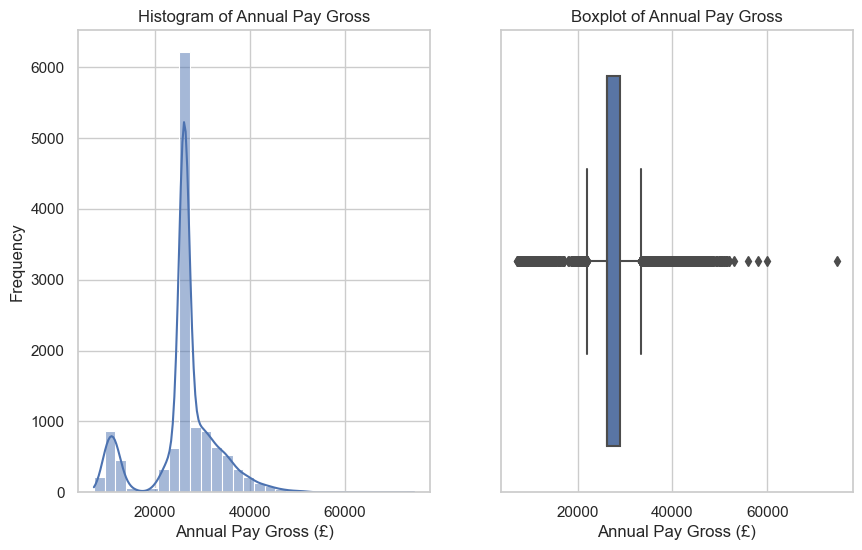

In [90]:
def histogram_boxplot(data, feature):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature.replace("_", " ").title()}')  # Replace underscores in the title

    plt.xlabel(f'{feature.replace("_", " ").title()} (£)')
    plt.ylabel("Frequency")  # Update y-axis label

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature.replace("_", " ").title()}')  # Replace underscores in the title

    plt.xlabel(f'{feature.replace("_", " ").title()} (£)')

    plt.show()

# Calling the function
histogram_boxplot(data=filtered_positive_corr_feats_df, feature="Annual_pay_gross")



In [91]:
wages_df['Annual_pay_gross_log']=np.log(wages_df['Annual_pay_gross'])

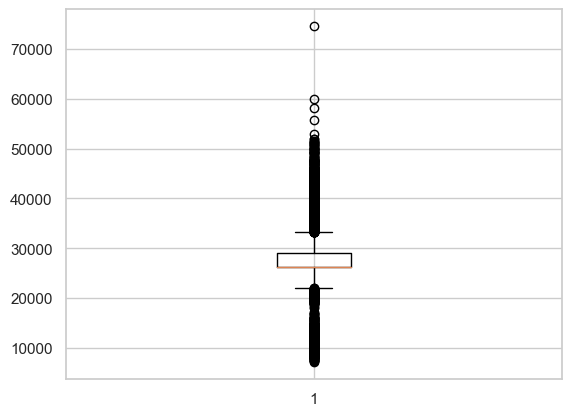

In [92]:
plt.boxplot(wages_df['Annual_pay_gross']);

The purpose of treating outliers and transforming the target variable, Annual Pay Gross, to a logarithmic scale is to meet the three key assumptions of linear regression:

- Linearity: Ensuring that the relationship between the independent variables (predictors) and the dependent variable (Annual Pay Gross) is linear. This assumption implies that changes in the predictors result in proportional changes in the response variable.

- Normality: Verifying that the residuals, which represent the differences between predicted and actual values, follow a normal distribution. Ideally, most residuals should cluster around zero, and the remaining residuals should be evenly distributed on both sides of zero.

- Independence: Confirming that the residuals are independent of each other. This assumption implies that there should be no discernible relationship or correlation between individual residuals. Each residual's value should be unaffected by the value of any other residual.

Adhering to these assumptions is crucial because deviations from them can introduce inaccuracies or biases in the results of linear regression analysis. Thus, it is essential to assess these assumptions rigorously before interpreting the outcomes of a linear regression model.

# BUILDING A MODEL

### SPLITTING THE DATASET FOR TRAINING AND TESTING

In [93]:
X = filtered_positive_corr_feats_df.drop(['Annual_pay_gross', ], axis=1) # Features
y = filtered_positive_corr_feats_df['Annual_pay_gross'] # prediction output

In [94]:
X.shape

(12640, 10)

In [95]:
y.shape

(12640,)

In [96]:
# training, evaluating the machine learning model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # X_train and y_train are used for training, and X_test and y_test are used for evaluation

### FEATURES SCALING

In [97]:
# Applying feature scaling
scale_train = StandardScaler()
scale_train.fit(X_train)
X_train = scale_train.transform(X_train)
X_test = scale_train.transform(X_test)

In [98]:
# X_train = pd.DataFrame(X_train)
# X_test = pd.DataFrame(X_test)

In [99]:
# Transforming into a Pandas DataFrame is necessary as machine learning models only accept features in a two-dimensional format
X_train = pd.DataFrame(X_train, columns=['Hourly_pay_gross','Hours_worked_total', 'sex', 'year', 'work_type', 'Level_1_and_entry_level_qualifications','Level_2_qualifications','Level_3_qualifications','Other_qualifications','Aged_15_years_and_under'])
X_test = pd.DataFrame(X_test, columns=['Hourly_pay_gross','Hours_worked_total', 'sex', 'year', 'work_type', 'Level_1_and_entry_level_qualifications','Level_2_qualifications','Level_3_qualifications','Other_qualifications','Aged_15_years_and_under'])

In [100]:
# #converting to pandas dataframe # becuase machine learning only accept 2d feature
# X_train = pd.DataFrame(X_train, columns=X_train.columns)
# X_test = pd.DataFrame(X_test, columns=X_test.columns)

#### Reshaping the attributes

In [101]:
# Hourly_pay_gross
X_train_Hourly_paygross= X_train['Hourly_pay_gross'].to_numpy().reshape(-1,1)
X_test_Hourly_paygross = X_test['Hourly_pay_gross'].to_numpy().reshape(-1,1)

# Hours_worked_total
X_train_Hours_workedtotal = X_train['Hours_worked_total'].to_numpy().reshape(-1,1)
X_test_Hours_workedtotal= X_test['Hours_worked_total'].to_numpy().reshape(-1,1)

# sex
X_train_sex = X_train['sex'].to_numpy().reshape(-1,1)
X_test_sex = X_test['sex'].to_numpy().reshape(-1,1)

# year
X_train_year  = X_train['year'].to_numpy().reshape(-1,1)
X_test_year  = X_test['year'].to_numpy().reshape(-1,1)

# Work_type
X_train_worktype  = X_train['work_type'].to_numpy().reshape(-1,1)
X_test_worktype  = X_test['work_type'].to_numpy().reshape(-1,1)

# Level_1_and_entry_level_qualifications
X_train_Level_1_and_entry_level_qualifications= X_train['Level_1_and_entry_level_qualifications'].to_numpy().reshape(-1,1)
X_test_Level_1_and_entry_level_qualifications  = X_test['Level_1_and_entry_level_qualifications'].to_numpy().reshape(-1,1)

# Level_2_qualifications
X_train_Level_2_qualifications  = X_train['Level_2_qualifications'].to_numpy().reshape(-1,1)
X_test_Level_2_qualifications  = X_test['Level_2_qualifications'].to_numpy().reshape(-1,1)

# Level_3_qualifications
X_train_Level_3_qualifications  = X_train['Level_3_qualifications'].to_numpy().reshape(-1,1)
X_test_Level_3_qualifications  = X_test['Level_3_qualifications'].to_numpy().reshape(-1,1)

# Other_qualifications
X_train_Other_qualifications  = X_train['Other_qualifications'].to_numpy().reshape(-1,1)
X_test_Other_qualifications  = X_test['Other_qualifications'].to_numpy().reshape(-1,1)

# Level_3_qualifications
X_train_Aged_15_years_and_under  = X_train['Aged_15_years_and_under'].to_numpy().reshape(-1,1)
X_test_Aged_15_years_and_under  = X_test['Aged_15_years_and_under'].to_numpy().reshape(-1,1)

###  LINEAR REGRESSION

In [102]:
# Linear Regression
lr = LinearRegression()
#Train the model on the training set
lr.fit(X_train, y_train)

LinearRegression()

##### Defining the evaluation metrics

In [103]:
# Data Visualization with Python.11 December. Available at:https://www.youtube.com/watch?v=icOcecahe5Y&list=PLqe6YDeOlcOYswRxkfWr17v25ym-ScKdL&index=16(Accessed: 12th October 2023)
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

def model_performance_regression(model, predictors, target):
    """
    Evaluate the performance of a regression model using various metrics.

    Parameters:
    - model: Regression model
    - predictors: Independent variables
    - target: Dependent variable

    Returns:
    DataFrame with performance metrics
    """
    # Predictions using the independent variables
    pred = model.predict(predictors)

    mse = mean_squared_error(target, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(target, pred)
    r2 = r2_score(target, pred)
    adjr2 = adj_r2_score(predictors, target, pred)
    mape = mape_score(target, pred)

    # Creating a DataFrame of metrics
    df_perf = pd.DataFrame(
        {
            "MSE": mse,
            "RMSE": rmse,
            "MAE": mae,
            "R2": r2,
            "Adj. R2": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

### Training and evaluating the model

In [104]:
# train
lr_Hourly_paygross = LinearRegression()
lr_Hourly_paygross.fit(X_train_Hourly_paygross, y_train)

# Evaluate and store the performance metrics
lr_test_Hourly_paygross = model_performance_regression(lr_Hourly_paygross, X_test_Hourly_paygross, y_test)

print("Model performance of Hourly Pay Gross (correlation with Annual Pay = 0.70)")
print(lr_test_Hourly_paygross)
print()

#train model
lr_Hours_workedtotal = LinearRegression()
lr_Hours_workedtotal.fit(X_train_Hours_workedtotal, y_train)

# Evaluate and store the performance metrics
lr_test_Hours_workedtotal = model_performance_regression(lr_Hours_workedtotal, X_test_Hours_workedtotal, y_test)
print("Model performance of Hours Worked Total (correlation with Annual Pay = 0.59)")
print(lr_test_Hours_workedtotal)
print()

#train model
lr_sex = LinearRegression()
lr_sex.fit(X_train_sex, y_train)

# Evaluate and store the performance metrics
lr_test_sex = model_performance_regression(lr_sex, X_test_sex, y_test)
print("Model performance of Sex (correlation with Annual Pay = 0.53)")
print(lr_test_sex)
print()

#train model
lr_year = LinearRegression()
lr_year.fit(X_train_year, y_train)

# Evaluate and store the performance metrics
lr_test_year = model_performance_regression(lr_year, X_test_year, y_test)
print("Model performance of Year (correlation with Annual Pay = 0.41)")
print(lr_test_year)
print()

#train model
lr_worktype = LinearRegression()
lr_worktype.fit(X_train_worktype, y_train)

# Evaluate and store the performance metrics
lr_test_worktype= model_performance_regression(lr_worktype, X_test_worktype, y_test)
print("Model performance of Work Type (correlation with Annual Pay = 0.16)")
print(lr_test_worktype)
print()

#train model
lr_Level_1_and_entry_level_qualifications = LinearRegression()
lr_Level_1_and_entry_level_qualifications.fit(X_train_Level_1_and_entry_level_qualifications, y_train)

# Evaluate and store the performance metrics
lr_test_Level_1_and_entry_level_qualifications = model_performance_regression(lr_Level_1_and_entry_level_qualifications, X_test_Level_1_and_entry_level_qualifications, y_test)
print("Model performance of Level 1 & Entry Level Qualifications (correlation with Annual Pay = 0.12)")
print(lr_test_Level_1_and_entry_level_qualifications)
print()

#train model
lr_Level_2_qualifications = LinearRegression()
lr_Level_2_qualifications.fit(X_train_Level_2_qualifications, y_train)

# Evaluate and store the performance metrics
lr_test_Level_2_qualifications = model_performance_regression(lr_Level_2_qualifications, X_test_Level_2_qualifications, y_test)
print("Model performance of Entry Level 2 Qualifications (correlation with Annual Pay = 0.09)")
print(lr_test_Level_2_qualifications)
print()

#train model
lr_Level_3_qualifications = LinearRegression()
lr_Level_3_qualifications.fit(X_train_Level_3_qualifications, y_train)

# Evaluate and store the performance metrics
lr_test_Level_3_qualifications = model_performance_regression(lr_Level_3_qualifications, X_test_Level_3_qualifications, y_test)
print("Model performance of Entry Level 3 Qualifications (correlation with Annual Pay = 0.08)")
print(lr_test_Level_3_qualifications)
print()

#train model
lr_Other_qualifications = LinearRegression()
lr_Other_qualifications.fit(X_train_Other_qualifications, y_train)

# Evaluate and store the performance metrics
lr_test_Other_qualifications = model_performance_regression(lr_Other_qualifications, X_test_Other_qualifications, y_test)
print("Model performance of Other Qualifications (correlation with Annual Pay = 0.02 )")
print(lr_test_Other_qualifications)
print()

#train model
lr_Aged_15_years_and_under = LinearRegression()
lr_Aged_15_years_and_under.fit(X_train_Aged_15_years_and_under, y_train)

# Evaluate and store the performance metrics
lr_test_Aged_15_years_and_under = model_performance_regression(lr_Aged_15_years_and_under, X_test_Aged_15_years_and_under, y_test)
print("Model performance of Aged 15 Years and Under (correlation with Annual Pay = 0.01)")
print(lr_test_Aged_15_years_and_under)
print()

Model performance of Hourly Pay Gross (correlation with Annual Pay = 0.70)
            MSE         RMSE          MAE        R2   Adj. R2       MAPE
0  2.779476e+07  5272.073628  3723.015998  0.475884  0.475677  20.843872

Model performance of Hours Worked Total (correlation with Annual Pay = 0.59)
            MSE         RMSE         MAE        R2   Adj. R2       MAPE
0  3.450626e+07  5874.202529  4459.33517  0.349328  0.349071  22.570849

Model performance of Sex (correlation with Annual Pay = 0.53)
            MSE         RMSE          MAE        R2   Adj. R2       MAPE
0  4.365297e+07  6607.039803  5034.479181  0.176852  0.176526  26.392069

Model performance of Year (correlation with Annual Pay = 0.41)
            MSE         RMSE          MAE        R2   Adj. R2       MAPE
0  5.213825e+07  7220.682356  4629.010016  0.016848  0.016459  26.222084

Model performance of Work Type (correlation with Annual Pay = 0.16)
            MSE         RMSE          MAE        R2   Adj. R2       M

In [105]:
# Print coefficients
intercept = lr.intercept_
coefficient = lr.coef_
print('Intercept:', intercept)
print('Coefficients:', coefficient)

Intercept: 26199.695209651913
Coefficients: [3681.4334851  1196.97452553 1827.42536026  189.72202801  424.86658867
   -9.45674702   41.15072511  -16.20637611  -56.50195671  -21.97098477]


### MULTIPLE LINEAR REGRESSION

In [106]:
# Linear Regression
lr_multiple = LinearRegression()
#Train the model on the training set
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [107]:
# Training data set
lr_multiple_train = model_performance_regression(lr_multiple, X_train, y_train)
print("Model performance of the numerical data on the training data")
print(lr_multiple_train)
print()

# Testing data set
lr_multiple_test = model_performance_regression(lr_multiple, X_test, y_test)
print("Model performance of the numerical data on the testing data")
print(lr_multiple_test)

Model performance of the numerical data on the training data
            MSE         RMSE          MAE     R2   Adj. R2       MAPE
0  2.143159e+07  4629.426709  3471.357089  0.592  0.591596  18.383928

Model performance of the numerical data on the testing data
            MSE         RMSE          MAE        R2   Adj. R2      MAPE
0  2.249516e+07  4742.906691  3517.218945  0.575817  0.574132  18.54868


The model appears to generalize reasonably well from the training data to the testing data, as the performance metrics on/
the testing data are not significantly worse than those on the training data.

The R-squared values are moderate, indicating that the model explains a substantial portion of the variance in the target/
variable.

The MAPE values, representing the percentage difference between predicted and actual values, are in the range of 18%,
suggesting that the model's predictions have a moderate level of accuracy.

Both training and testing data metrics show similar trends, which is generally positive and indicates consistency.

### SUPPORT VECTOR REGRESSION

In [108]:
# Support Vector Regression
svr = SVR(kernel='linear')

#Train the model on the training set
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [109]:
# Making predictions on the test set
y_pred_svr = svr.predict(X_test)

# Evaluating the model
mean_abs = mean_absolute_error(y_test,y_pred_svr)
mean_squared = mean_squared_error(y_test,y_pred_svr)

print(f"The Mean Absolute Error is: {mean_abs:.2f}")
print(f"The Mean Squared Error is : {mean_squared:.2f}")
print(f"The Root  Mean Squared Error is : {np.sqrt(mean_squared):.2f}")
print(f"The coefficient of determination(r2) is: {r2_score(y_test,y_pred_svr):.2f}")

The Mean Absolute Error is: 3760.70
The Mean Squared Error is : 30498021.81
The Root  Mean Squared Error is : 5522.50
The coefficient of determination(r2) is: 0.42


- Mean Absolute Error (MAE): The MAE is approximately 3760.70 showing that the average absolute difference between the model's predictions and the actual values. This would suggest a moderate level of accuracy in  SVM's predictions.
- Mean Squared Error (MSE): An MSE of approximately 30,498,021.81 indicates a clear error between the model's predictions and the actual values.
- Root Mean Squared Error (RMSE): An RMSE of approximately 5522.50 shows the model's predictions deviate on average, by around 5522.50 units from the observed values. This indicates a moderate to high level of error in prediction.
- Coefficient of Determination (R-squared): The R-squared value of 0.42 indicates that the model might not capture a substantial portion of the variability present in the data, showing a limited goodness of fit.

In [110]:
y_pred_svr

array([28725.91523604, 27497.44187415, 27338.33507471, ...,
       26237.10962584, 26402.59105303, 26405.15497234])

In [111]:
y_test

11547    25991.00
1346     29055.00
9099     25223.00
8678     26184.76
4872     12134.00
           ...   
10943    26184.76
879      26184.76
11233    26184.76
10790    26184.76
1509     25335.00
Name: Annual_pay_gross, Length: 2528, dtype: float64

In [112]:
test_df = pd.DataFrame(columns=['y_test', 'y_predict_svr'])
test_df

Empty DataFrame
Columns: [y_test, y_predict_svr]
Index: []

In [113]:
test_df['y_test'] = y_test
test_df

y_test y_predict_svr
11547  25991.00           NaN
1346   29055.00           NaN
9099   25223.00           NaN
8678   26184.76           NaN
4872   12134.00           NaN
...         ...           ...
10943  26184.76           NaN
879    26184.76           NaN
11233  26184.76           NaN
10790  26184.76           NaN
1509   25335.00           NaN

[2528 rows x 2 columns]

In [114]:
test_df['y_predict_svr'] = y_pred_svr
test_df

y_test  y_predict_svr
11547  25991.00   28725.915236
1346   29055.00   27497.441874
9099   25223.00   27338.335075
8678   26184.76   27224.548008
4872   12134.00   23202.322946
...         ...            ...
10943  26184.76   26084.071811
879    26184.76   26532.896650
11233  26184.76   26237.109626
10790  26184.76   26402.591053
1509   25335.00   26405.154972

[2528 rows x 2 columns]

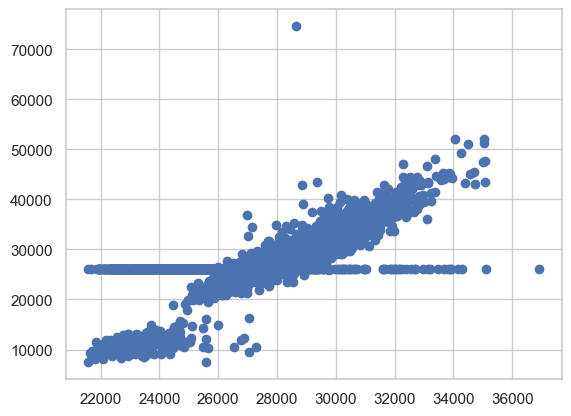

In [115]:
plt.scatter(test_df['y_predict_svr'], test_df['y_test'])
plt.show()

- From the above, it can be seen that the model is making predictions that closely match the actual values hence the diagonal alignment.
- The low MAE and RMSE values further support the idea that, on average, the model's predictions are close to the true values.
- The high R-squared value reinforces the notion that the model is explaining a large portion of the variability in the target variable.

#### HYPERPARAMETER TUNING IN SUPPORT VECTOR REGRESSION USING DIFFERENT KERNELS (POLY, RBF, AND SIGMOID)

#### 1. FOR KERNEL = 'POLY'

In [116]:
# Support Vector Regression
svr_poly = SVR(kernel='poly', degree=3)# Specify the degree of the polynomial

#Train the model on the training set
svr_poly.fit(X_train, y_train)

SVR(kernel='poly')

In [117]:
y_pred_poly = svr_poly.predict(X_test)

# Calculate metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
r2_poly = r2_score(y_test, y_pred_poly)

# Print the metrics
print(f"Mean Absolute Error (Poly): {mae_poly:.2f}")
print(f"Mean Squared Error (Poly): {mse_poly:.2f}")
print(f"Root Mean Squared Error (Poly):{np.sqrt(rmse_poly):.2f}")
print(f"R-squared (Poly):{r2_poly:.2f}")

Mean Absolute Error (Poly): 4313.90
Mean Squared Error (Poly): 50031954.50
Root Mean Squared Error (Poly):84.10
R-squared (Poly):0.06


#### 2. FOR KERNEL = 'rbf'

In [118]:
# Support Vector Regression
svr_rbf = SVR(kernel='rbf')

#Train the model on the training set
svr_rbf.fit(X_train, y_train)

SVR()

In [119]:
y_pred_rbf = svr_rbf.predict(X_test)

# Calculate metrics
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
rmse_rbf = mean_squared_error(y_test, y_pred_rbf, squared=False)
r2_rbf = r2_score(y_test, y_pred_rbf)

# Print the metrics
print(f"The Mean Absolute Error (RBF) is: {mae_rbf:.2f}")
print(f"The Mean Squared Error (RBF) is : {mse_rbf:.2f}")
print(f"The Root Mean Squared Error (RBF) is : {rmse_rbf:.2f}")
print(f"The Coefficient of Determination r2(RBF) is: {r2_rbf:.2f}")

The Mean Absolute Error (RBF) is: 4280.86
The Mean Squared Error (RBF) is : 50425710.12
The Root Mean Squared Error (RBF) is : 7101.11
The Coefficient of Determination r2(RBF) is: 0.05


#### 3. FOR KERNEL = 'sigmoid'

In [120]:
# Support Vector Regression
svr_sigmoid = SVR(kernel='sigmoid')

#Train the model on the training set
svr_sigmoid.fit(X_train, y_train)

SVR(kernel='sigmoid')

In [121]:
svr_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svr_sigmoid.predict(X_test)

# Calculate metrics
mae_sigmoid = mean_absolute_error(y_test, y_pred_sigmoid)
mse_sigmoid = mean_squared_error(y_test, y_pred_sigmoid)
rmse_sigmoid = mean_squared_error(y_test, y_pred_sigmoid, squared=False)
r2_sigmoid = r2_score(y_test, y_pred_sigmoid)

# Print the metrics
print(f"The Mean Absolute Error (Sigmoid) is: {mae_sigmoid:.2f}")
print(f"The Mean Squared Error (Sigmoid) is : {mse_sigmoid:.2f}")
print(f"The Root Mean Squared Error (Sigmoid) is : {rmse_sigmoid:.2f}")
print(f"The Coefficient of Determination r2(Sigmoid) is: {r2_sigmoid:.2f}")

The Mean Absolute Error (Sigmoid) is: 4240.16
The Mean Squared Error (Sigmoid) is : 48004122.24
The Root Mean Squared Error (Sigmoid) is : 6928.50
The Coefficient of Determination r2(Sigmoid) is: 0.09


### RANDOM FOREST REGRESSION

In [122]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)

#Train the model on the training set
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [123]:
# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluating the model
mean_abs = mean_absolute_error(y_test,y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

mean_squared = mean_squared_error(y_test,y_pred_rf)
print(f"The Mean Absolute Error is: {mean_abs:.2f}")
print(f"The Mean Squared Error is : {mean_squared:.2f}")
print(f"The Root Mean Squaredd Error is : {np.sqrt(mean_squared):.2f}")
print(f"The Coefficient of Determination(r2) is: {r2_score(y_test,y_pred_rf):.2f}")

The Mean Absolute Error is: 2987.82
The Mean Squared Error is : 21930085.09
The Root Mean Squaredd Error is : 4682.96
The Coefficient of Determination(r2) is: 0.59


#### HYPERPARAMETER TUNING FOR RANDOM FOREST REGRESSOR USING SCIKIT-LEARN'S RandomizedSearchCV

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# From the data above, define a smaller parameter grid
param_dist = {
    'n_estimators': [150, 200],
    'max_depth': [None, 20],
    'min_samples_split': [4, 7],
    'min_samples_leaf': [1, 2],
    'max_features': [1.0, 'sqrt']
}

# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_regressor, param_distributions=param_dist, n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1
)

# Perform random search with cross-validation
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}


##### Creating a Random Forest regressor with the best hyperparameters

In [125]:
best_rf_reg = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=7,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=None,
    random_state=0
)

# Fit the model on the training set
best_rf_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_best_rf_reg = best_rf_reg.predict(X_test)

# Calculate evaluation metrics
mae_best_rf_reg = mean_absolute_error(y_test, y_pred_best_rf_reg )
mse_best_rf_reg = mean_squared_error(y_test, y_pred_best_rf_reg )
rmse_best_rf_reg = np.sqrt(mse_best_rf_reg)
r2_best_rf_reg = r2_score(y_test, y_pred_best_rf_reg )

# Print the evaluation metrics
print("Random Forest Regression MSE(best params):", mse_best_rf_reg)
print("Random Forest Regression MAE(best params):", mae_best_rf_reg )
print("Random Forest Regression RMSE(best params):", rmse_best_rf_reg)
print("Random Forest Regression r2(best params):", r2_best_rf_reg )


Random Forest Regression MSE(best params): 20618456.82153406
Random Forest Regression MAE(best params): 2942.1312079844483
Random Forest Regression RMSE(best params): 4540.755093762938
Random Forest Regression r2(best params): 0.6112053234827918


Mean Absolute Error (MAE): The MAE, which stands at approximately 2942.13, shows the average absolute difference between the predicted values by the Random Forest Regression model and the actual observed values indicating a moderate level of accuracy in the RF's predictions.

Mean Squared Error (MSE): An MSE of approximately 20,618,456.82 shows that the model's predictions results to a considerable squared difference from the actual values implying a significant level of error in the predictions.

Root Mean Squared Error (RMSE): The RMSE, at around 4540.76, shows the square root of the average squared differences between predicted and observed values implying a moderate to high level of error in the model's predictions.

Coefficient of Determination (R-squared): The R-squared value of approximately 0.61 indicates that the Random Forest Regression model explains approximately 61% of the variance in the dependent variable using the chosen predictors suggesting a moderate ability of the model to capture the variability in the data.

##### Visualizing the feature importance in Random Forest

In [126]:
Feat_names = X_train.columns.tolist()

In [127]:
importances =rf.feature_importances_
indices =np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

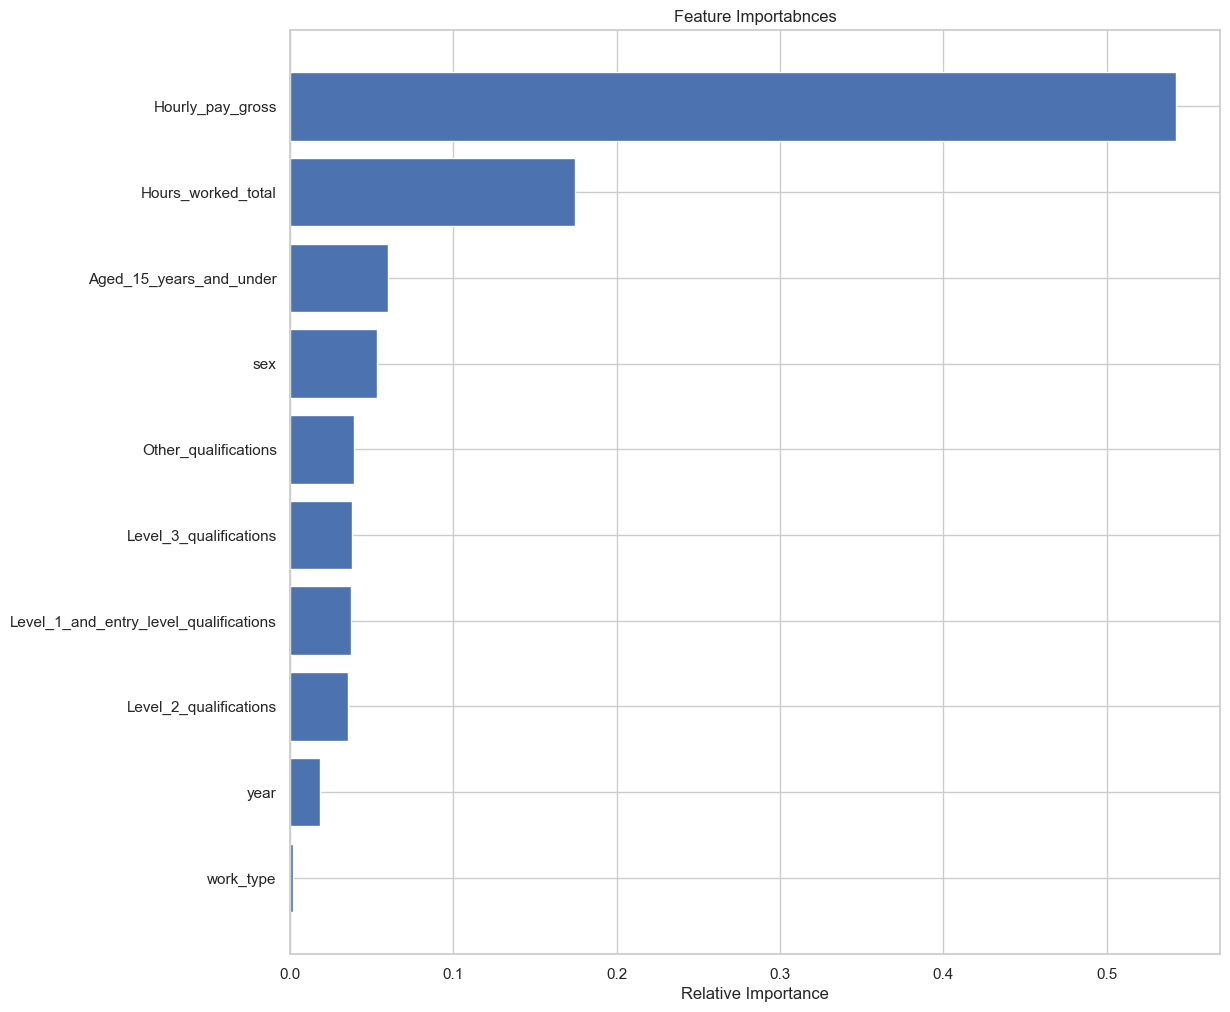

In [128]:
plt.figure(figsize=(12,12))
plt.title('Feature Importabnces')
plt.barh(range(len(indices)),importances[indices], align='center');
plt.yticks(range(len(indices)), [Feat_names[i] for i in indices]);
plt.xlabel('Relative Importance')

### DECISION TREE REGRESSOR

In [129]:
# Create a decision tree regressor
decision_tree_regressor = DecisionTreeRegressor()

# Train the model on the training data
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [130]:
# Function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    assert len(y_true) == len(y_pred), "Input arrays must have the same length."
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

In [131]:
# Make predictions on the training data
deci_tree_train_pred = decision_tree_regressor.predict(X_train)
# Make predictions on the testing data
deci_tree_test_pred = decision_tree_regressor.predict(X_test)

In [132]:
# Calculate metrics for the training data
train_mse = mean_squared_error(y_train, deci_tree_train_pred)
print("Training Data Metrics:")
print("MSE:", train_mse)

train_rmse = mean_squared_error(y_train, deci_tree_train_pred, squared=False)
print("RMSE:", train_rmse)

train_mae = mean_absolute_error(y_train, deci_tree_train_pred)
print("MAE:", train_mae)

train_r2 = r2_score(y_train, deci_tree_train_pred)
print("R-squared:", train_r2)

train_adj_r2 = 1 - (1 - train_r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
print("Adjusted R-squared:", train_adj_r2)

train_mape = calculate_mape(y_train, deci_tree_train_pred)
print("MAPE:", train_mape)


Training Data Metrics:
MSE: 37770.55751076898
RMSE: 194.34648829029297
MAE: 5.826358702537752
R-squared: 0.9992809500287138
Adjusted R-squared: 0.9992802381685303
MAPE: 0.03155067760428519


- Mean Squared Error (MSE): The MSE of 37770.56 indicates a degree of error between the model's predictions and the actual values.
- Root Mean Squared Error (RMSE): With an RMSE of 194.35, the model's predictions deviate from the actual values by an average of approximately 194.35 units.
- Mean Absolute Error (MAE): A MAE of 5.83 suggests an average absolute difference between the model's predictions and the actual values of approximately 5.83 units.
- The R-squared value of 0.999 indicates an exceptionally high fit inclduing relevant predictors.
- Adjusted R-squared: The adjusted R-squared value, similar to the R-squared value, remains very high at 0.999, indicating the model's robustness and the relevance of the predictors included.
- Mean Absolute Percentage Error (MAPE): The MAPE of 0.0315 indicates that, on average, the model's predictions deviate by approximately 3.15% from the actual values. This suggests a relatively low percentage of error between predicted and actual values.

##### Calculating the metrics for the testing data

In [134]:
test_mse = mean_squared_error(y_test, deci_tree_test_pred)
print("\nTesting Data Metrics:")
print("MSE:", test_mse)

test_rmse = mean_squared_error(y_test, deci_tree_test_pred, squared=False)
print("RMSE:", test_rmse)

test_mae = mean_absolute_error(y_test, deci_tree_test_pred)
print("MAE:", test_mae)

test_r2 = r2_score(y_test, deci_tree_test_pred)
print("R-squared:", test_r2)

test_adj_r2 = 1 - (1 - test_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print("Adjusted R-squared:", test_adj_r2)

test_mape = calculate_mape(y_test, deci_tree_test_pred)
print("MAPE:", test_mape)


Testing Data Metrics:
MSE: 39185575.17447966
RMSE: 6259.838270632849
MAE: 3406.498331645576
R-squared: 0.26109198394562316
Adjusted R-squared: 0.25815631443408416
MAPE: 17.599460188554268


###### HYPERPARAMETER TUNING FOR THE DECISION TREE REGRESSOR

In [135]:
# Defining the hyperparameters to test
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Choosing an appropriate scoring metric ( negative mean squared error for GridSearchCV)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Performing Grid Search Cross-Validation
grid_search = GridSearchCV(decision_tree_regressor, param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

# Getting the best hyperparameter values
best_params = grid_search.best_params_

# Training the final model with the best hyperparameters on the entire training set
final_dec_tree_reg = DecisionTreeRegressor(**best_params)
final_dec_tree_reg.fit(X_train, y_train)

# Making predictions on the testing data
predictions = final_dec_tree_reg.predict(X_test)

# Evaluating the model
mse_final_dec_tree_reg = mean_squared_error(y_test, predictions)
rmse_final_dec_tree_reg = mean_squared_error(y_test, predictions, squared=False)
mae_final_dec_tree_reg = mean_absolute_error(y_test, predictions)
r2_final_dec_tree_reg = r2_score(y_test, predictions)

print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse_final_dec_tree_reg)
print("Root Mean Squared Error:", rmse_final_dec_tree_reg)
print("Mean Absolute Error:", mae_final_dec_tree_reg)
print("R-squared:", r2_final_dec_tree_reg)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error: 22609511.746983342
Root Mean Squared Error: 4754.946029870722
Mean Absolute Error: 2934.5700138729057
R-squared: 0.5736607311610444


In [136]:
# Create a DecisionTreeRegressor with the best hyperparameters
final_decision_tree_regressor = DecisionTreeRegressor(**best_params)

# Perform cross-validation on the entire training set
cv_scores = cross_val_score(final_decision_tree_regressor, X_train, y_train, cv=5, scoring=scorer)

# Print or use the cross-validated scores as needed
print("Cross-Validated Scores:", cv_scores)
print("Mean Cross-Validated Score:", np.mean(cv_scores))

Cross-Validated Scores: [-23253296.02702108 -22814590.15469012 -24514920.33221016
 -23394998.26425072 -22483375.43400695]
Mean Cross-Validated Score: -23292236.042435806


### RIDGE REGRESSION

In [137]:
# instantiate the model
ridge_reg = Ridge(random_state=0)

# fit the model
ridge_reg.fit(X_train, y_train)

Ridge(random_state=0)

In [138]:
# Make predictions on the testing data
y_pred_rid = ridge_reg.predict(X_test)

In [139]:
# Evaluate the model using regression metrics
mse = mean_squared_error(y_test,y_pred_rid)
rmse = mean_squared_error(y_test, y_pred_rid, squared=False)
mae = mean_absolute_error(y_test, y_pred_rid)
r2 = r2_score(y_test, y_pred_rid)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 22495455.569870654
Root Mean Squared Error: 4742.937441066522
Mean Absolute Error: 3517.2759234977693
R-squared: 0.5758114466519828


- Mean Squared Error (MSE): The The MSE of approximately 22,495,455.57 signifies a considerable error between the model's predictions and the actual values.
-  RMSE of around 4742.94 indicates that, on average, the model's predictions deviate from the actual values by approximately 4742.94 units.
- Mean Absolute Error (MAE): An MAE of approximately 3517.28 indicates the average absolute difference between the model's predictions and the actual values, which is notably high.
- The R-squared value of 0.576 suggests that the model explains approximately 57.6% of the variance in the dependent variable based on the predictors used.

#### HYPERPARAMETER TUNING FOR RIDGE REGRESSION

In [140]:
# Dictionary to store evaluation metrics for each alpha
evaluation_metrics = {}
alphas = [0.1, 1.0, 10.0, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=0)

    # Perform 5-fold cross-validation (adjust as needed)
    scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Store mean score for this alpha
    mse = -scores.mean()

    # Fit the model on the entire training set for detailed evaluation
    ridge.fit(X_train, y_train)

    # Make predictions on the training set
    y_pred = ridge.predict(X_train)

    # Calculate additional evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    mae = mean_absolute_error(y_train, y_pred)
    r_squared = r2_score(y_train, y_pred)

    # Store the metrics in the dictionary
    evaluation_metrics[alpha] = {
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse,
        "Mean Absolute Error": mae,
        "R-squared": r_squared
    }

# Find the alpha with the best Mean Squared Error
best_alpha = min(evaluation_metrics, key=lambda k: evaluation_metrics[k]["Mean Squared Error"])

# Print results for each alpha
for alpha in alphas:
    metrics = evaluation_metrics[alpha]
    print(f"For Alpha = {alpha}:")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"Root Mean Squared Error: {metrics['Root Mean Squared Error']}")
    print(f"Mean Absolute Error: {metrics['Mean Absolute Error']}")
    print(f"R-squared: {metrics['R-squared']}")
    print()

# Print the best alpha and its metrics
print(f"Best Alpha: {best_alpha}")
print(f"Metrics for Best Alpha:")
best_metrics = evaluation_metrics[best_alpha]
print(f"Mean Squared Error: {best_metrics['Mean Squared Error']}")
print(f"Root Mean Squared Error: {best_metrics['Root Mean Squared Error']}")
print(f"Mean Absolute Error: {best_metrics['Mean Absolute Error']}")
print(f"R-squared: {best_metrics['R-squared']}")

For Alpha = 0.1:
Mean Squared Error: 21486050.190366615
Root Mean Squared Error: 4629.426710392674
Mean Absolute Error: 3471.360936658566
R-squared: 0.5920000553789058

For Alpha = 1.0:
Mean Squared Error: 21486021.92515605
Root Mean Squared Error: 4629.426848579855
Mean Absolute Error: 3471.395583957598
R-squared: 0.5920000310215213

For Alpha = 10.0:
Mean Squared Error: 21485920.427399173
Root Mean Squared Error: 4629.440231683374
Mean Absolute Error: 3471.7468055956474
R-squared: 0.5919976720626731

For Alpha = 100:
Mean Squared Error: 21497420.718671285
Root Mean Squared Error: 4630.4549623031235
Mean Absolute Error: 3475.4329053079578
R-squared: 0.5918187917625842

Best Alpha: 10.0
Metrics for Best Alpha:
Mean Squared Error: 21485920.427399173
Root Mean Squared Error: 4629.440231683374
Mean Absolute Error: 3471.7468055956474
R-squared: 0.5919976720626731


In [141]:
# Instantiate Ridge with the best alpha
best_ridge_model = Ridge(alpha=best_alpha, random_state=0)

# Train the best model on the entire training set
best_ridge_model.fit(X_train, y_train)

Ridge(alpha=10.0, random_state=0)

In [142]:
# Make predictions on the training set
y_pred_train = best_ridge_model.predict(X_train)

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Print training set metrics for the best model
print(f"Training Set Metrics for Best Alpha ({best_alpha}):")
print(f"Mean Squared Error: {mse_train}")
print(f"Root Mean Squared Error: {rmse_train}")
print(f"Mean Absolute Error: {mae_train}")
print(f"R-squared: {r2_train}")


Training Set Metrics for Best Alpha (10.0):
Mean Squared Error: 21431716.858728614
Root Mean Squared Error: 4629.440231683374
Mean Absolute Error: 3471.7468055956474
R-squared: 0.5919976720626731


In [143]:
# Make predictions on the testing set
y_pred_test = best_ridge_model.predict(X_test)

# Evaluate the model on the training set
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print testing set metrics for the best model
print(f"Testing Set Metrics for Best Alpha ({best_alpha}):")
print(f"Mean Squared Error: {mse_test}")
print(f"Root Mean Squared Error: {rmse_test}")
print(f"Mean Absolute Error: {mae_test}")
print(f"R-squared: {r2_test}")


Testing Set Metrics for Best Alpha (10.0):
Mean Squared Error: 22498143.07285153
Root Mean Squared Error: 4743.220748905909
Mean Absolute Error: 3517.784413517227
R-squared: 0.575760769394168


### XGBOOST REGRESSION

In [162]:
# Convert the data to DMatrix format (optimized data structure for XGBoost)
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)

In [164]:
# Define the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # for regression tasks
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10,
    'num_boost_round': 100
}

# Train the XGBoost model
model = xgb.train(params, xgb_train, num_boost_round=10)

# Make predictions on the testing set
y_pred_xgb = model.predict(xgb_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Round metrics to two decimal places
mse_xgb = round(mse_xgb, 2)
rmse_xgb = round(rmse_xgb, 2)
mae_xgb = round(mae_xgb, 2)
r2_xgb = round(r2_xgb, 2)

# Print the rounded metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r_squared}')

Mean Squared Error: 43003715.94737259
Root Mean Squared Error: 4630.4549623031235
Mean Absolute Error: 4188.286363695362
R-squared: 0.5918187917625842


C:\Users\760676\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [10:24:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


- Mean Squared Error (MSE): The The MSE of approximately 21,497,420.72 signifies a considerable error between the model's predictions and the actual values.
-  RMSE of around 4630.45 indicates that, on average, the model's predictions deviate from the actual values by approximately 4630.45 units.
- Mean Absolute Error (MAE): An MAE of approximately 3475.43 indicates the average absolute difference between the model's predictions and the actual values, which is notably high.
- The R-squared value of 0.5918 suggests that the model explains approximately 59.18% of the variance in the dependent variable based on the predictors used.

# Testing the Performance and Determining the Best Regressor

### Visualizing the different regressors

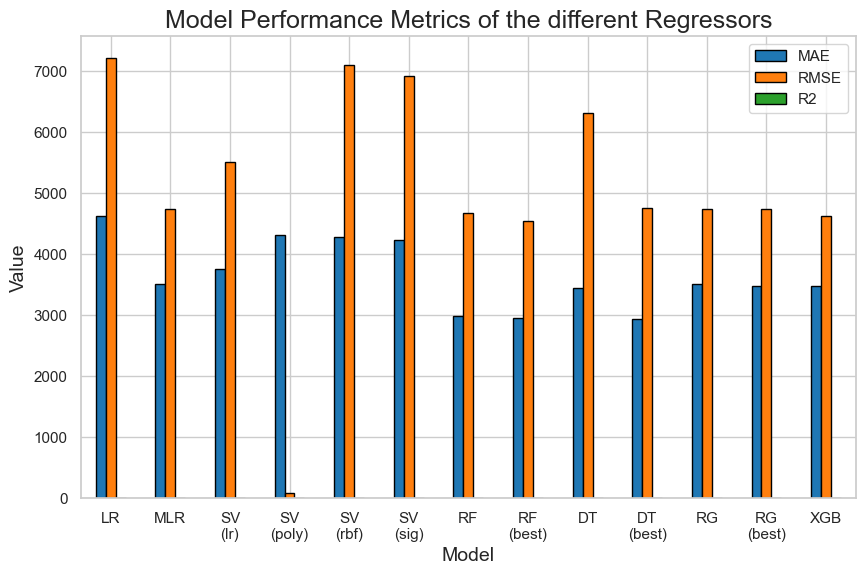

In [146]:
# Create a dataframe with the model performance metrics
file = {'Model': ['LR','MLR', 'SV\n(lr)','SV\n(poly)', 'SV\n(rbf)','SV\n(sig)','RF', 'RF\n(best)', 'DT', 'DT\n(best)', 'RG', 'RG\n(best)','XGB'],
        'MAE':   [4628.99, 3517.24, 3760.71, 4313.89, 4280.86, 4240.17, 2984.41, 2949.04, 3454.44, 2945, 3517.30, 3471.81, 3475.46 ],
        'RMSE': [7220.68, 4742.95, 5522.54, 84.10, 7101.4, 6928.57, 4676.87, 4547.34, 6326.19, 4754.97, 4742.98, 4743.26, 4630.50],
        'R2': [0.02, 0.58, 0.42, 0.06, 0.05, 0.09, 0.59, 0.61, 0.25, 0.57, 0.58, 0.58, 0.59]}
dff = pd.DataFrame(file)

# Setting the Model column as the index
dff.set_index('Model', inplace=True)

# Plot the bar chart
ax = dff.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'], edgecolor='black')

# Set the plot title and labels
ax.set_title('Model Performance Metrics of the different Regressors', fontsize=18)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Value', fontsize=14)
ax.set_xticklabels(dff.index, rotation=0)

# Show the plot
plt.show()

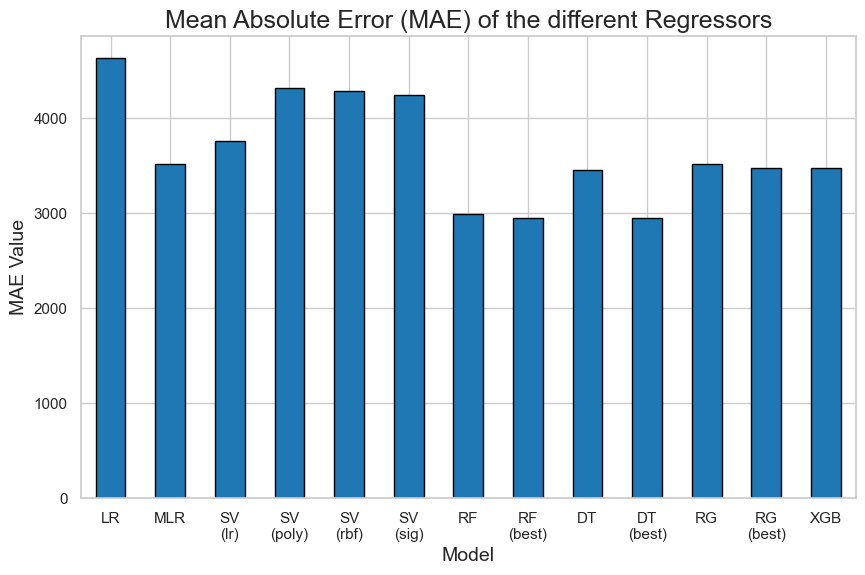

In [147]:
# Plot MAE
ax_mae = dff['MAE'].plot(kind='bar', figsize=(10, 6), color='#1f77b4', edgecolor='black')
ax_mae.set_title('Mean Absolute Error (MAE) of the different Regressors', fontsize=18)
ax_mae.set_xlabel('Model', fontsize=14)
ax_mae.set_ylabel('MAE Value', fontsize=14)
ax_mae.set_xticklabels(dff.index, rotation=0)
plt.show()

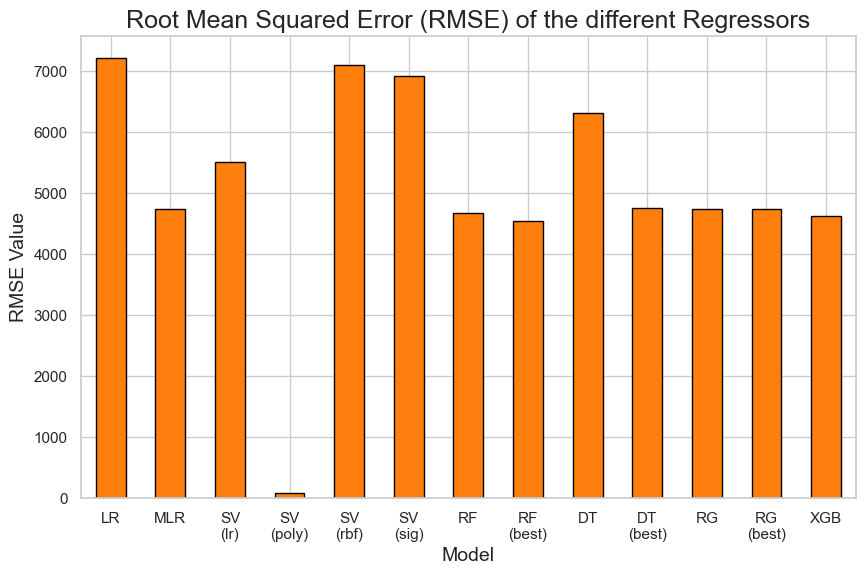

In [148]:
# Plot RMSE
ax_rmse = dff['RMSE'].plot(kind='bar', figsize=(10, 6), color='#ff7f0e', edgecolor='black')
ax_rmse.set_title('Root Mean Squared Error (RMSE) of the different Regressors', fontsize=18)
ax_rmse.set_xlabel('Model', fontsize=14)
ax_rmse.set_ylabel('RMSE Value', fontsize=14)
ax_rmse.set_xticklabels(dff.index, rotation=0)
plt.show()

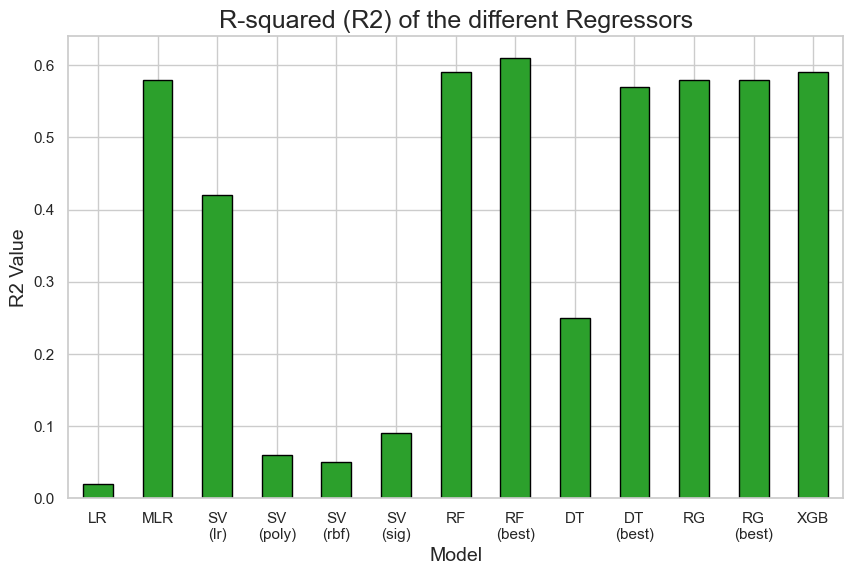

In [149]:
# Plot R2
ax_r2 = dff['R2'].plot(kind='bar', figsize=(10, 6), color='#2ca02c', edgecolor='black')
ax_r2.set_title('R-squared (R2) of the different Regressors', fontsize=18)
ax_r2.set_xlabel('Model', fontsize=14)
ax_r2.set_ylabel('R2 Value', fontsize=14)
ax_r2.set_xticklabels(dff.index, rotation=0)
plt.show()

#### Predicting Annual Wages Using Random Forest Regression (With Best Params)

Mean Squared Error on Test Set (Random Forest): 32598674.058572914
Mean Absolute Error on Test Set (Random Forest): 4529.059186062132
R-squared on Test Set (Random Forest): 0.2799270742681381


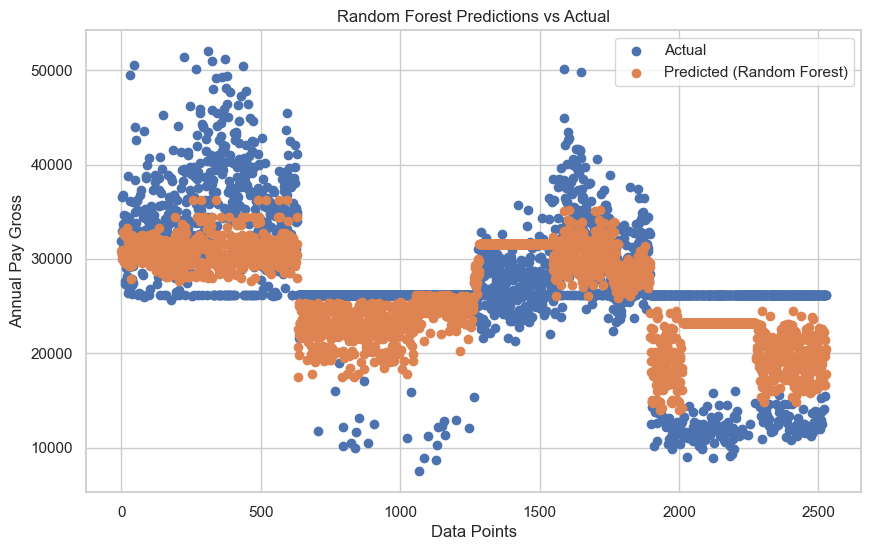

In [150]:
# Train-test split
train_size = int(len(filtered_positive_corr_feats_df) * 0.8)
train, test = filtered_positive_corr_feats_df[:train_size], filtered_positive_corr_feats_df[train_size:]

# Features and target variable
features = [ 'year', 'work_type', 'Level_1_and_entry_level_qualifications', 'Level_2_qualifications', 'Level_3_qualifications', 'Other_qualifications', 'Aged_15_years_and_under']
target = 'Annual_pay_gross'

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# Use the best hyperparameters
# best_params = {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}
# best_rf_reg = RandomForestRegressor(
#     n_estimators=200,
#     min_samples_split=7,
#     min_samples_leaf=2,
#     max_features='sqrt',
#     max_depth=None,
#     random_state=0
# )

best_rf_reg = {
    'n_estimators': 200,
    'min_samples_split': 7,
    'min_samples_leaf': 2,
    'max_features':'sqrt',
    'max_depth':None,
    'random_state': 0
}

# Create and train the Random Forest model with best hyperparameters
model_rf = RandomForestRegressor(**best_rf_reg)
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_best_rf_reg = mean_absolute_error(y_test, y_pred_best_rf_reg )
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error on Test Set (Random Forest): {mse_rf}')
print(f'Mean Absolute Error on Test Set (Random Forest): {mae_rf}')
print(f'R-squared on Test Set (Random Forest): {r2_rf}')

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test.values, label='Actual', marker='o')
plt.scatter(range(len(y_pred_rf)), y_pred_rf, label='Predicted (Random Forest)', marker='o')
plt.xlabel('Data Points')
plt.ylabel('Annual Pay Gross')
plt.title('Random Forest Predictions vs Actual')
plt.legend()
plt.show()

### Visualizing predictions vs actual values for Random Forest

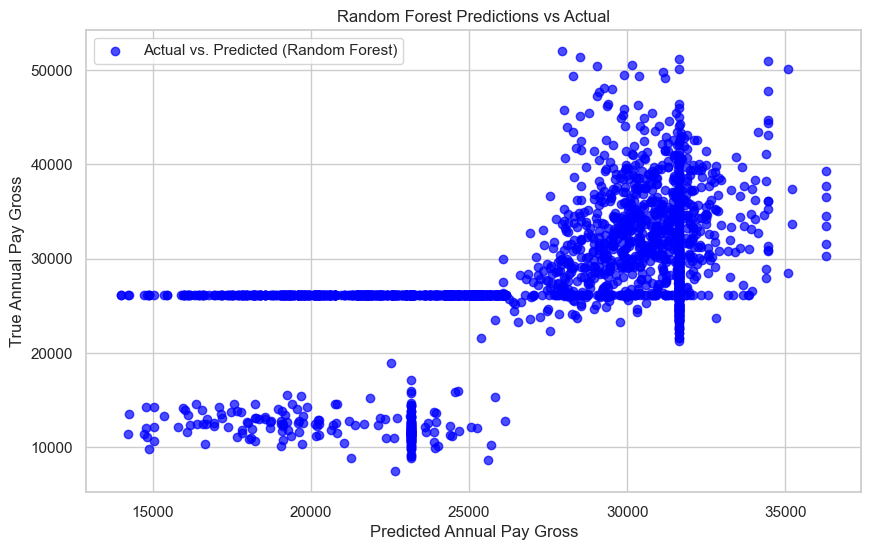

In [151]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, y_test.values, label='Actual vs. Predicted (Random Forest)', marker='o', color='blue', alpha=0.7)
plt.xlabel('Predicted Annual Pay Gross')
plt.ylabel('True Annual Pay Gross')
plt.title('Random Forest Predictions vs Actual')
plt.legend()
plt.show()

#### Predicting Annual Wages Using XGBOOST Regression

In [165]:
# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10,
    'n_estimators': 100  # Add the number of boosting rounds here
}

# Create and train the XGBoost model
model_xgb = XGBRegressor(**params)
model_xgb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Round metrics to two decimal places
mse_xgb = round(mse_xgb, 2)
rmse_xgb = round(rmse_xgb, 2)
mae_xgb = round(mae_xgb, 2)
r2_xgb = round(r2_xgb, 2)

# Print the rounded metrics
print(f'Mean Squared Error: {mse_xgb}')
print(f'Root Mean Squared Error: {rmse_xgb}')
print(f'Mean Absolute Error: {mae_xgb}')
print(f'R-squared: {r2_xgb}')


Mean Squared Error: 31779431.83
Root Mean Squared Error: 5637.32
Mean Absolute Error: 4626.18
R-squared: 0.3


### Visualizing predictions vs actual values for XGBOOST Regressor

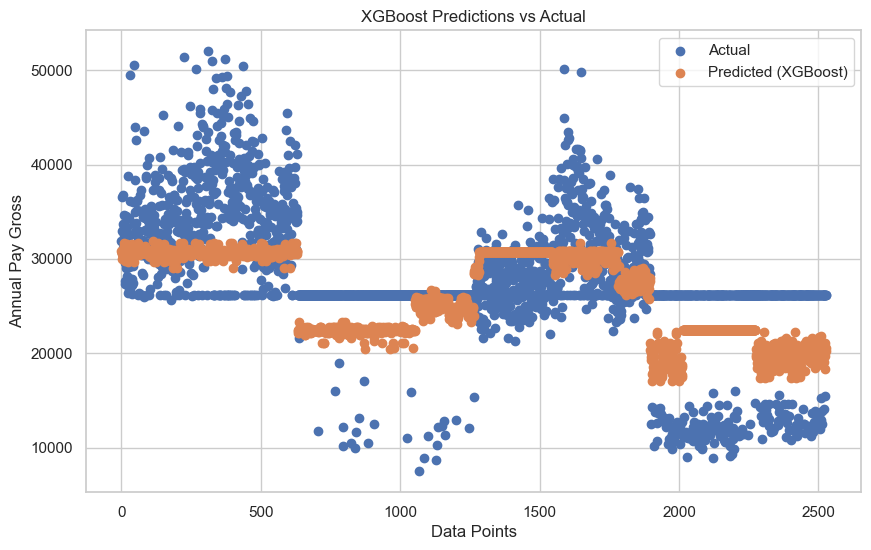

In [166]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test.values, label='Actual', marker='o')
plt.scatter(range(len(y_pred_xgb)), y_pred_xgb, label='Predicted (XGBoost)', marker='o')
plt.xlabel('Data Points')
plt.ylabel('Annual Pay Gross')
plt.title('XGBoost Predictions vs Actual')
plt.legend()
plt.show()

#### Predicting Future Average Annual Wage (Linear Regression) With Input Feature Year and Target Annual Pay Gross

Mean Squared Error: 52138253.68294591
R-squared: 0.016848076929703026


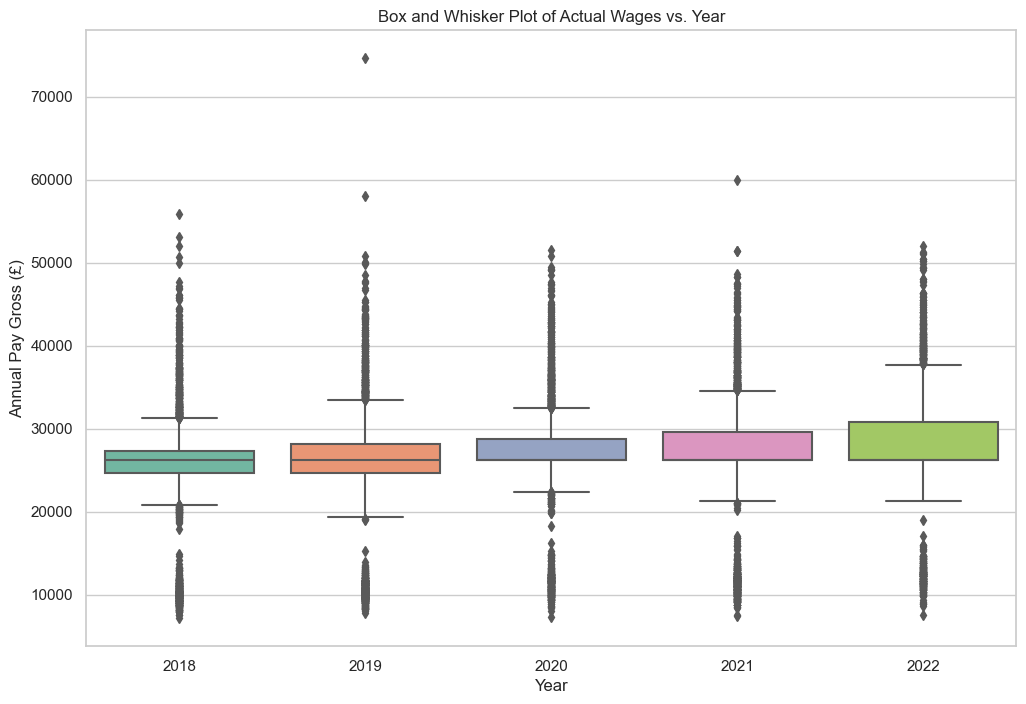

In [154]:
# Data Preparation
X1 = filtered_positive_corr_feats_df[['year']]
y1 = filtered_positive_corr_feats_df['Annual_pay_gross']

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Model Selection
LR_future = LinearRegression()

# Training
LR_future.fit(X1_train, y1_train)

# Prediction
y1_pred_LR = LR_future.predict(X1_test)

# Evaluation
mse = mean_squared_error(y1_test, y1_pred_LR)
r2 = r2_score(y1_test, y1_pred_LR)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='year', y='Annual_pay_gross', data=filtered_positive_corr_feats_df, palette='Set2')
plt.title('Box and Whisker Plot of Actual Wages vs. Year')
plt.xlabel('Year')
plt.ylabel('Annual Pay Gross (£)')
plt.show()

In [155]:
# Creates a DataFrame with the years to be predicted
future_years_lr = pd.DataFrame({'year': [2023, 2024, 2025, 2026,2027]})

# Using the trained model to predict annual wages for the future years
future_predictions_lr = LR_future.predict(future_years_lr)

# Displays the predictions with two decimal places
future_predictions_df_lr = pd.DataFrame({'Year': future_years_lr['year'], 'Predicted_Annual_Wage': future_predictions_lr})
future_predictions_df_lr['Predicted_Annual_Wage'] = future_predictions_df_lr['Predicted_Annual_Wage'].round(2)
print(future_predictions_df_lr)

   Year  Predicted_Annual_Wage
0  2023               28021.72
1  2024               28631.49
2  2025               29241.27
3  2026               29851.04
4  2027               30460.81


### USING A FEEDFORWARD NEURAL NETWORK (DEEP LEARNING MODEL)

Epoch 1/100
253/253 [==============================] - 1s 2ms/step - loss: 118933056.0000 - val_loss: 52281568.0000
Epoch 2/100
253/253 [==============================] - 0s 2ms/step - loss: 76839976.0000 - val_loss: 54180352.0000
Epoch 3/100
253/253 [==============================] - 0s 1ms/step - loss: 60002672.0000 - val_loss: 49808760.0000
Epoch 4/100
253/253 [==============================] - 0s 2ms/step - loss: 55433028.0000 - val_loss: 46709528.0000
Epoch 5/100
253/253 [==============================] - 0s 1ms/step - loss: 54212424.0000 - val_loss: 46748912.0000
Epoch 6/100
253/253 [==============================] - 0s 1ms/step - loss: 53930820.0000 - val_loss: 60084248.0000
Epoch 7/100
253/253 [==============================] - 0s 1ms/step - loss: 53391204.0000 - val_loss: 51544076.0000
Epoch 8/100
253/253 [==============================] - 0s 1ms/step - loss: 53056876.0000 - val_loss: 54103516.0000
Epoch 9/100
253/253 [==============================] - 0s 2ms/step - loss: 5329

253/253 [==============================] - 0s 1ms/step - loss: 48586200.0000 - val_loss: 47268948.0000
Epoch 72/100
253/253 [==============================] - 0s 1ms/step - loss: 49044340.0000 - val_loss: 51119780.0000
Epoch 73/100
253/253 [==============================] - 0s 1ms/step - loss: 49063592.0000 - val_loss: 47068556.0000
Epoch 74/100
253/253 [==============================] - 0s 1ms/step - loss: 48633056.0000 - val_loss: 49490816.0000
Epoch 75/100
253/253 [==============================] - 0s 1ms/step - loss: 48366292.0000 - val_loss: 58995308.0000
Epoch 76/100
253/253 [==============================] - 0s 1ms/step - loss: 48544576.0000 - val_loss: 47058088.0000
Epoch 77/100
253/253 [==============================] - 0s 1ms/step - loss: 48485912.0000 - val_loss: 46595108.0000
Epoch 78/100
253/253 [==============================] - 0s 1ms/step - loss: 48544652.0000 - val_loss: 45877100.0000
Epoch 79/100
253/253 [==============================] - 0s 1ms/step - loss: 48523392.

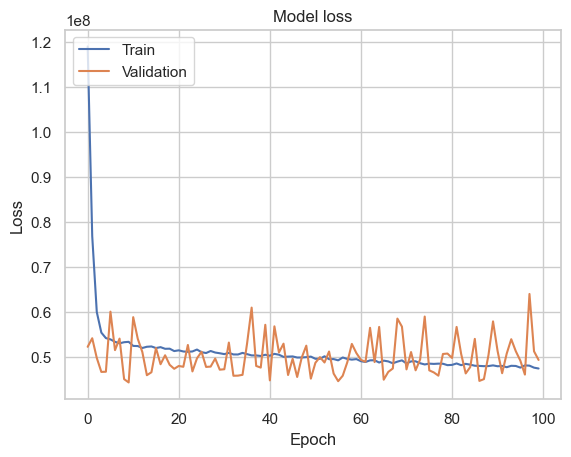

In [156]:
# Assuming X_train and y_train are your training data
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Capture the training history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [157]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Absolute Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

79/79 [==============================] - 0s 969us/step
Mean Squared Error: 43003715.94737259
Root Mean Absolute Error: 4630.4549623031235
Mean Absolute Error: 4188.286363695362
R-squared: 0.05008984402471395


# **Dataset Review (option 1)**

We attempt to remove the horizontal cluster of data points in the scatter plots and Random Forest Prediction plots by assigning random values to columns with missing values. In the present case, we have assigned the mean value leading to a horizontally skewed data point cluster.

In [168]:
# To load the dataset
wages = "wagecheck24.csv"
new_wages_df = pd.read_csv(r"wagecheck24.csv")

# Random selection rows to view contents
new_wages_df.sample(12)

# Remove '-', ' ', "," and '__', with '_'
new_wages_df.columns = new_wages_df.columns.str.replace(r'[_\s\-,]+', '_', regex=True)
#df.columns = df.columns.str.replace(r'[_\s\-,]+', '_', regex=True)
new_wages_df.columns

Index(['Parliamentary_constituencies', 'Hourly_pay_gross',
       'Hours_worked_total', 'Annual_pay_gross', 'sex', 'year', 'work_type',
       'No_qualifications', 'Level_1_and_entry_level_qualifications',
       'Level_2_qualifications', 'Apprenticeship', 'Level_3_qualifications',
       'Level_4_qualifications_or_above', 'Other_qualifications',
       'Aged_15_years_and_under', 'Aged_16_to_64_years',
       'Aged_65_years_and_over', 'Managers_directors_and_senior_officials',
       'Professional_occupations',
       'Associate_professional_and_technical_occupations',
       'Administrative_and_secretarial_occupations',
       'Skilled_trades_occupations',
       'Caring_leisure_and_other_service_occupations',
       'Sales_and_customer_service_occupations',
       'Process_plant_and_machine_operatives', 'Elementary_occupations',
       'Disabled_under_the_Equality_Act',
       'Not_disabled_under_the_Equality_Act',
       'Asian_Asian_British_or_Asian_Welsh',
       'Black_Black_Brit

In [169]:
selected_column = new_wages_df['Annual_pay_gross']

wages_df_modified['Annual_pay_gross'] = new_wages_df['Annual_pay_gross']

new_data_sample = filtered_positive_corr_feats_df.drop(columns='Annual_pay_gross')
new_data_sample.head()

new_data_sample['Annual_pay_gross'] = selected_column
new_data_sample.sample(12)

Hourly_pay_gross  Hours_worked_total  sex  year  work_type  \
4508               9.45               18.70    0  2019          0   
2345              10.95               18.40    0  2018          0   
8780               9.26               30.99    1  2021          0   
2158               9.27               19.80    0  2018          0   
4573              13.13               19.50    0  2019          0   
7228              11.21               20.70    0  2020          0   
6004              13.13               30.99    1  2020          0   
11377             13.13               37.00    0  2022          1   
7954              25.35               37.50    1  2021          1   
8861              14.01               37.00    0  2021          1   
6204              13.13               30.99    1  2020          0   
6172              13.13               30.99    1  2020          0   

       Level_1_and_entry_level_qualifications  Level_2_qualifications  \
4508                                     5192                   12788   
2345                                     4845                   13443   
8780                                     8219                    3210   
2158                                     4592                   16879   
4573                                     6205                    1888   
7228                                     8080                   11035   
6004                                     8882                   11109   
11377                                    9007                    3508   
7954                                     8684                   14017   
8861                                     9392                    3366   
6204                                     8584                   11520   
6172                                     4506                    6714   

       Level_3_qualifications  Other_qualifications  Aged_15_years_and_under  \
4508                    13976                  2303                      372   
2345                     4541                 32748                      172   
8780                    16171                 13000                       29   
2158                     5193                 23447                      132   
4573                    55430                 31907                      459   
7228                    13269                  1751                      471   
6004                    12428                  2250                      153   
11377                   16823                 13000                      172   
7954                    14432                 13000                      239   
8861                    16562                 13000                      764   
6204                    13005                  2156                      172   
6172                    15521                  1510                      759   

      Annual_pay_gross  
4508                 #  
2345                 #  
8780                 #  
2158             10026  
4573                 #  
7228                 #  
6004                 #  
11377            24504  
7954             44751  
8861             27975  
6204                 #  
6172                 #

In [170]:
mask = new_data_sample['Annual_pay_gross'].apply(lambda x: not pd.to_numeric(x, errors='coerce') == float)

conditions = [
    (new_data_sample['Hourly_pay_gross'] < 8),
    ((8 <= new_data_sample['Hourly_pay_gross']) & (new_data_sample['Hourly_pay_gross'] < 10)),
    ((10 <= new_data_sample['Hourly_pay_gross']) & (new_data_sample['Hourly_pay_gross'] < 12)),
    ((12 <= new_data_sample['Hourly_pay_gross']) & (new_data_sample['Hourly_pay_gross'] < 14)),
    ((14 <= new_data_sample['Hourly_pay_gross']) & (new_data_sample['Hourly_pay_gross'] < 17)),
    ((17 <= new_data_sample['Hourly_pay_gross']) & (new_data_sample['Hourly_pay_gross'] < 20)),
    ((20 <= new_data_sample['Hourly_pay_gross']) & (new_data_sample['Hourly_pay_gross'] < 25)),
    ((25 <= new_data_sample['Hourly_pay_gross']) & (new_data_sample['Hourly_pay_gross'] < 31)),
    ((31 <= new_data_sample['Hourly_pay_gross']) & (new_data_sample['Hourly_pay_gross'] < 34)),
    (new_data_sample['Hourly_pay_gross'] >= 34)
]

values = [9250, 11350, 15490, 18320, 22350, 25920, 34430, 37220, 39760, 42260]

new_data_sample.loc[mask, 'Annual_pay_gross'] = np.select(conditions, values, default=new_data_sample['Annual_pay_gross'])

new_data_sample


Hourly_pay_gross  Hours_worked_total  sex  year  work_type  \
0                 12.97                37.7    1  2018          1   
1                 13.61                39.0    1  2018          1   
2                 14.27                39.0    1  2018          1   
3                 12.72                37.5    1  2018          1   
4                 17.60                38.6    1  2018          1   
...                 ...                 ...  ...   ...        ...   
12635             12.00                18.5    0  2022          0   
12636             12.49                18.5    0  2022          0   
12637             12.63                19.3    0  2022          0   
12638             12.96                18.3    0  2022          0   
12639             11.19                20.0    0  2022          0   

       Level_1_and_entry_level_qualifications  Level_2_qualifications  \
0                                        6367                    9174   
1                                        7273                   10899   
2                                        7056                   10293   
3                                        7718                   11083   
4                                        5960                    9631   
...                                       ...                     ...   
12635                                   10923                   14961   
12636                                    7977                   10798   
12637                                    7223                   10454   
12638                                    9174                   12070   
12639                                    4979                    8467   

       Level_3_qualifications  Other_qualifications  Aged_15_years_and_under  \
0                       10849                  1692                       64   
1                       13637                  1752                      279   
2                       12915                  1953                      166   
3                       13586                  1777                       58   
4                       22179                  1783                        4   
...                       ...                   ...                      ...   
12635                   17076                  3017                      172   
12636                   14927                  2194                      172   
12637                   15480                  2161                      172   
12638                   14444                  2244                      172   
12639                   29130                  1944                      172   

      Annual_pay_gross  
0                18320  
1                18320  
2                22350  
3                18320  
4                25920  
...                ...  
12635            18320  
12636            18320  
12637            18320  
12638            18320  
12639            15490  

[12640 rows x 11 columns]

In [171]:
y_column = new_data_sample['Annual_pay_gross']

In [172]:
# Funtion to create scatterplot between two numerical features
def scatterplota_func(x, y, title, x_label, y_label, data=new_data_sample):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

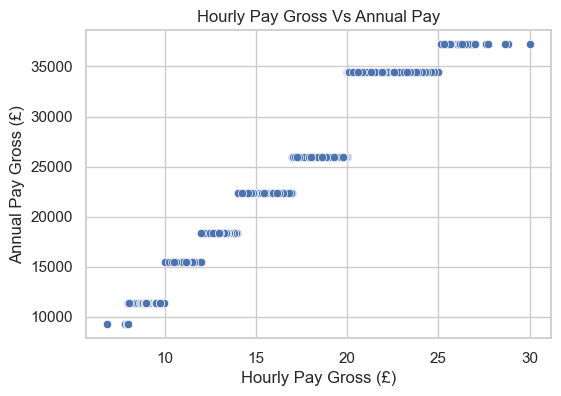

In [173]:
scatterplota_func('Hourly_pay_gross', 'Annual_pay_gross', 'Hourly Pay Gross Vs Annual Pay', 'Hourly Pay Gross (£)', 'Annual Pay Gross (£)')


In [174]:
X = new_data_sample.drop(['Annual_pay_gross', ], axis=1) # Features
y = new_data_sample['Annual_pay_gross'] # prediction output
X.shape

(12640, 10)

In [175]:
y.shape

(12640,)

In [176]:
# training, evaluating the machine learning model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # X_train and y_train are used for training, and X_test and y_test are used for evaluation

In [177]:
# Applying feature scaling
scale_train = StandardScaler()
scale_train.fit(X_train)
X_train = scale_train.transform(X_train)
X_test = scale_train.transform(X_test)


# Transforming into a Pandas DataFrame is necessary as machine learning models only accept features in a two-dimensional format
X_train = pd.DataFrame(X_train, columns=['Hourly_pay_gross','Hours_worked_total', 'sex', 'year', 'work_type', 'Level_1_and_entry_level_qualifications','Level_2_qualifications','Level_3_qualifications','Other_qualifications','Aged_15_years_and_under'])
X_test = pd.DataFrame(X_test, columns=['Hourly_pay_gross','Hours_worked_total', 'sex', 'year', 'work_type', 'Level_1_and_entry_level_qualifications','Level_2_qualifications','Level_3_qualifications','Other_qualifications','Aged_15_years_and_under'])

# Hourly_pay_gross
X_train_Hourly_paygross= X_train['Hourly_pay_gross'].to_numpy().reshape(-1,1)
X_test_Hourly_paygross = X_test['Hourly_pay_gross'].to_numpy().reshape(-1,1)

# Hours_worked_total
X_train_Hours_workedtotal = X_train['Hours_worked_total'].to_numpy().reshape(-1,1)
X_test_Hours_workedtotal= X_test['Hours_worked_total'].to_numpy().reshape(-1,1)

# sex
X_train_sex = X_train['sex'].to_numpy().reshape(-1,1)
X_test_sex = X_test['sex'].to_numpy().reshape(-1,1)

# year
X_train_year  = X_train['year'].to_numpy().reshape(-1,1)
X_test_year  = X_test['year'].to_numpy().reshape(-1,1)

# Work_type
X_train_worktype  = X_train['work_type'].to_numpy().reshape(-1,1)
X_test_worktype  = X_test['work_type'].to_numpy().reshape(-1,1)

# Level_1_and_entry_level_qualifications
X_train_Level_1_and_entry_level_qualifications= X_train['Level_1_and_entry_level_qualifications'].to_numpy().reshape(-1,1)
X_test_Level_1_and_entry_level_qualifications  = X_test['Level_1_and_entry_level_qualifications'].to_numpy().reshape(-1,1)

# Level_2_qualifications
X_train_Level_2_qualifications  = X_train['Level_2_qualifications'].to_numpy().reshape(-1,1)
X_test_Level_2_qualifications  = X_test['Level_2_qualifications'].to_numpy().reshape(-1,1)

# Level_3_qualifications
X_train_Level_3_qualifications  = X_train['Level_3_qualifications'].to_numpy().reshape(-1,1)
X_test_Level_3_qualifications  = X_test['Level_3_qualifications'].to_numpy().reshape(-1,1)

# Other_qualifications
X_train_Other_qualifications  = X_train['Other_qualifications'].to_numpy().reshape(-1,1)
X_test_Other_qualifications  = X_test['Other_qualifications'].to_numpy().reshape(-1,1)

# Level_3_qualifications
X_train_Aged_15_years_and_under  = X_train['Aged_15_years_and_under'].to_numpy().reshape(-1,1)
X_test_Aged_15_years_and_under  = X_test['Aged_15_years_and_under'].to_numpy().reshape(-1,1)


In [178]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)

#Train the model on the training set
rf.fit(X_train, y_train)


# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluating the model
mean_abs = mean_absolute_error(y_test,y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

mean_squared = mean_squared_error(y_test,y_pred_rf)
print(f"The Mean Absolute Error is: {mean_abs:.2f}")
print(f"The Mean Squared Error is : {mean_squared:.2f}")
print(f"The Root Mean Squaredd Error is : {np.sqrt(mean_squared):.2f}")
print(f"The Coefficient of Determination(r2) is: {r2_score(y_test,y_pred_rf):.2f}")

The Mean Absolute Error is: 4.24
The Mean Squared Error is : 26450.08
The Root Mean Squaredd Error is : 162.63
The Coefficient of Determination(r2) is: 1.00


In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# From the data above, define a smaller parameter grid
param_dist = {
    'n_estimators': [150, 200],
    'max_depth': [None, 20],
    'min_samples_split': [4, 7],
    'min_samples_leaf': [1, 2],
    'max_features': [1.0, 'sqrt']
}

# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_regressor, param_distributions=param_dist, n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1
)

# Perform random search with cross-validation
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 1.0, 'max_depth': 20}


In [180]:
best_rf_reg = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=7,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=None,
    random_state=0
)

# Fit the model on the training set
best_rf_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_best_rf_reg = best_rf_reg.predict(X_test)

# Calculate evaluation metrics
mae_best_rf_reg = mean_absolute_error(y_test, y_pred_best_rf_reg )
mse_best_rf_reg = mean_squared_error(y_test, y_pred_best_rf_reg )
rmse_best_rf_reg = np.sqrt(mse_best_rf_reg)
r2_best_rf_reg = r2_score(y_test, y_pred_best_rf_reg )

# Print the evaluation metrics
print("Random Forest Regression MSE(best params):", mse_best_rf_reg)
print("Random Forest Regression MAE(best params):", mae_best_rf_reg )
print("Random Forest Regression RMSE(best params):", rmse_best_rf_reg)
print("Random Forest Regression r2(best params):", r2_best_rf_reg )


Random Forest Regression MSE(best params): 132683.13429574078
Random Forest Regression MAE(best params): 161.0673075768663
Random Forest Regression RMSE(best params): 364.2569619042864
Random Forest Regression r2(best params): 0.9949219417343403


Mean Squared Error on Test Set (Random Forest): 13276322.929470055
Mean Absolute Error on Test Set (Random Forest): 2440.9095436895186
R-squared on Test Set (Random Forest): 0.4699072191038539
10112


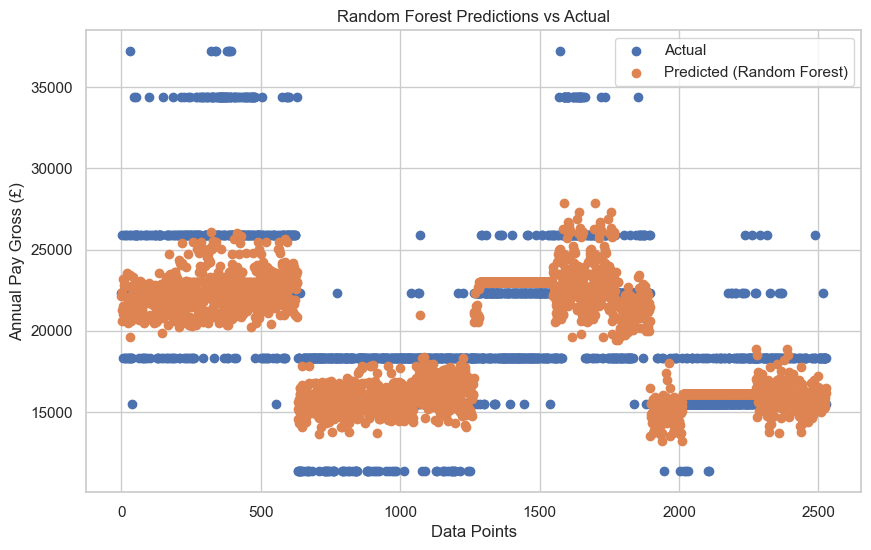

In [181]:
# Train-test split
train_size = int(len(new_data_sample) * 0.8)
train, test = new_data_sample[:train_size], new_data_sample[train_size:]

# Features and target variable
features = [ 'year', 'work_type', 'Level_1_and_entry_level_qualifications', 'Level_2_qualifications', 'Level_3_qualifications', 'Other_qualifications', 'Aged_15_years_and_under']
target = 'Annual_pay_gross'

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# Use the best hyperparameters
# best_params = {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}
# best_rf_reg = RandomForestRegressor(
#     n_estimators=200,
#     min_samples_split=7,
#     min_samples_leaf=2,
#     max_features='sqrt',
#     max_depth=None,
#     random_state=0
# )

best_rf_reg = {
    'n_estimators': 200,
    'min_samples_split': 7,
    'min_samples_leaf': 2,
    'max_features':'sqrt',
    'max_depth':None,
    'random_state': 0
}

# Create and train the Random Forest model with best hyperparameters
model_rf = RandomForestRegressor(**best_rf_reg)
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_best_rf_reg = mean_absolute_error(y_test, y_pred_best_rf_reg )
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error on Test Set (Random Forest): {mse_rf}')
print(f'Mean Absolute Error on Test Set (Random Forest): {mae_rf}')
print(f'R-squared on Test Set (Random Forest): {r2_rf}')

X_train.shape
print(len(X_train))
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test.values, label='Actual', marker='o')
plt.scatter(range(len(y_pred_rf)), y_pred_rf, label='Predicted (Random Forest)', marker='o')
plt.xlabel('Data Points')
plt.ylabel('Annual Pay Gross (£)')
plt.title('Random Forest Predictions vs Actual')
plt.legend()
plt.show()

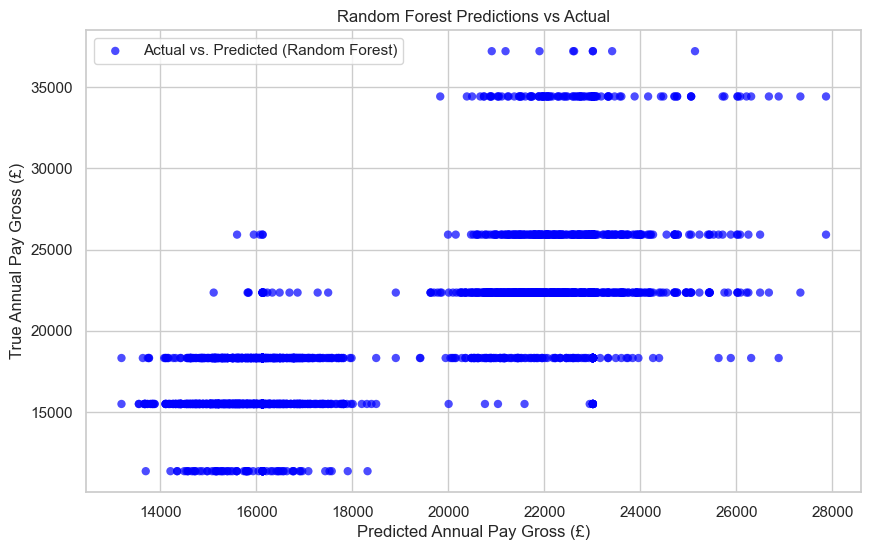

In [182]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, y_test.values, label='Actual vs. Predicted (Random Forest)', marker='o', color='blue', alpha=0.7, edgecolors='none')
plt.xlabel('Predicted Annual Pay Gross (£)')
plt.ylabel('True Annual Pay Gross (£)')
plt.title('Random Forest Predictions vs Actual')
plt.legend()
plt.show()


# **Dataset Review (option 2)**

We attempt to remove the horizontal cluster of data points in the scatter plots and Random Forest Prediction plots by assigning a large number in this case (£110,000) to columns with missing values.

In [184]:
# To load the dataset
wages = "wagecheck24.csv"
newb_wages_df = pd.read_csv(r"wagecheck24.csv")

# Random selection rows to view contents
newb_wages_df.sample(12)

# Remove '-', ' ', "," and '__', with '_'
newb_wages_df.columns = newb_wages_df.columns.str.replace(r'[_\s\-,]+', '_', regex=True)
#df.columns = df.columns.str.replace(r'[_\s\-,]+', '_', regex=True)
newb_wages_df.columns

Index(['Parliamentary_constituencies', 'Hourly_pay_gross',
       'Hours_worked_total', 'Annual_pay_gross', 'sex', 'year', 'work_type',
       'No_qualifications', 'Level_1_and_entry_level_qualifications',
       'Level_2_qualifications', 'Apprenticeship', 'Level_3_qualifications',
       'Level_4_qualifications_or_above', 'Other_qualifications',
       'Aged_15_years_and_under', 'Aged_16_to_64_years',
       'Aged_65_years_and_over', 'Managers_directors_and_senior_officials',
       'Professional_occupations',
       'Associate_professional_and_technical_occupations',
       'Administrative_and_secretarial_occupations',
       'Skilled_trades_occupations',
       'Caring_leisure_and_other_service_occupations',
       'Sales_and_customer_service_occupations',
       'Process_plant_and_machine_operatives', 'Elementary_occupations',
       'Disabled_under_the_Equality_Act',
       'Not_disabled_under_the_Equality_Act',
       'Asian_Asian_British_or_Asian_Welsh',
       'Black_Black_Brit

In [185]:
selected_column = newb_wages_df['Annual_pay_gross']

wages_df_modified['Annual_pay_gross'] = newb_wages_df['Annual_pay_gross']

new_data_sampleb = filtered_positive_corr_feats_df.drop(columns='Annual_pay_gross')
new_data_sampleb.head()

new_data_sampleb['Annual_pay_gross'] = selected_column
new_data_sampleb.sample(12)

Hourly_pay_gross  Hours_worked_total  sex  year  work_type  \
5355              12.91               39.00    1  2020          1   
11884             13.30               37.50    0  2022          1   
11489             12.66               37.00    0  2022          1   
1576              18.12               37.30    0  2018          1   
332               16.86               37.50    1  2018          1   
2493              10.64               19.70    0  2018          0   
4355              11.34               37.50    0  2019          1   
3106              14.48               39.00    1  2019          1   
1936               9.02               19.80    0  2018          0   
1104              13.13               30.99    1  2018          0   
4395              13.66               37.50    0  2019          1   
4815              10.19               19.80    0  2019          0   

       Level_1_and_entry_level_qualifications  Level_2_qualifications  \
5355                                    13061                   38430   
11884                                   11668                    5689   
11489                                    8684                   14017   
1576                                     7777                    3221   
332                                      8143                   11170   
2493                                     5757                   14304   
4355                                    15547                   27689   
3106                                     5225                   12048   
1936                                     5535                   16106   
1104                                     5351                   11195   
4395                                     1910                    9972   
4815                                    10200                   11678   

       Level_3_qualifications  Other_qualifications  Aged_15_years_and_under  \
5355                     9864                 42799                      172   
11884                   28373                 13000                      172   
11489                   14432                 13000                      172   
1576                     5268                 26946                       19   
332                     13046                  2304                       32   
2493                     5465                 27572                       34   
4355                     5389                 27572                       43   
3106                     3072                 37881                       99   
1936                     3711                 35400                      358   
1104                     2635                 13217                       35   
4395                     4234                 15990                       90   
4815                    11775                  2449                      181   

      Annual_pay_gross  
5355             29507  
11884            23316  
11489            24908  
1576             33787  
332              37183  
2493             10702  
4355             21893  
3106             29217  
1936                 #  
1104                 #  
4395             25148  
4815             11173

In [186]:
new_data_sampleb['Annual_pay_gross'] = pd.to_numeric(new_data_sampleb['Annual_pay_gross'], errors='coerce')
new_data_sampleb['Annual_pay_gross'].fillna(110000, inplace=True)

new_data_sampleb

Hourly_pay_gross  Hours_worked_total  sex  year  work_type  \
0                 12.97                37.7    1  2018          1   
1                 13.61                39.0    1  2018          1   
2                 14.27                39.0    1  2018          1   
3                 12.72                37.5    1  2018          1   
4                 17.60                38.6    1  2018          1   
...                 ...                 ...  ...   ...        ...   
12635             12.00                18.5    0  2022          0   
12636             12.49                18.5    0  2022          0   
12637             12.63                19.3    0  2022          0   
12638             12.96                18.3    0  2022          0   
12639             11.19                20.0    0  2022          0   

       Level_1_and_entry_level_qualifications  Level_2_qualifications  \
0                                        6367                    9174   
1                                        7273                   10899   
2                                        7056                   10293   
3                                        7718                   11083   
4                                        5960                    9631   
...                                       ...                     ...   
12635                                   10923                   14961   
12636                                    7977                   10798   
12637                                    7223                   10454   
12638                                    9174                   12070   
12639                                    4979                    8467   

       Level_3_qualifications  Other_qualifications  Aged_15_years_and_under  \
0                       10849                  1692                       64   
1                       13637                  1752                      279   
2                       12915                  1953                      166   
3                       13586                  1777                       58   
4                       22179                  1783                        4   
...                       ...                   ...                      ...   
12635                   17076                  3017                      172   
12636                   14927                  2194                      172   
12637                   15480                  2161                      172   
12638                   14444                  2244                      172   
12639                   29130                  1944                      172   

       Annual_pay_gross  
0               31819.0  
1               26775.0  
2               31388.0  
3               28941.0  
4               33878.0  
...                 ...  
12635          110000.0  
12636          110000.0  
12637           15452.0  
12638          110000.0  
12639          110000.0  

[12640 rows x 11 columns]

In [187]:
y_column = new_data_sampleb['Annual_pay_gross']

In [189]:
def scatterplotb_func(x, y, title, x_label, y_label, data=new_data_sampleb):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.ylim(0, 100000)
    plt.show()

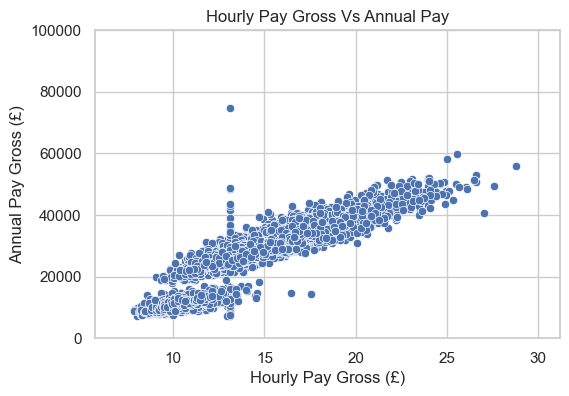

In [190]:
scatterplotb_func('Hourly_pay_gross', 'Annual_pay_gross', 'Hourly Pay Gross Vs Annual Pay', 'Hourly Pay Gross (£)', 'Annual Pay Gross (£)')

In [191]:
X = new_data_sampleb.drop(['Annual_pay_gross', ], axis=1) # Features
y = new_data_sampleb['Annual_pay_gross'] # prediction output
X.shape

(12640, 10)

In [192]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # X_train and y_train are used for training, and X_test and y_test are used for evaluation
# Applying feature scaling
scale_train = StandardScaler()
scale_train.fit(X_train)
X_train = scale_train.transform(X_train)
X_test = scale_train.transform(X_test)


# Transforming into a Pandas DataFrame is necessary as machine learning models only accept features in a two-dimensional format
X_train = pd.DataFrame(X_train, columns=['Hourly_pay_gross','Hours_worked_total', 'sex', 'year', 'work_type', 'Level_1_and_entry_level_qualifications','Level_2_qualifications','Level_3_qualifications','Other_qualifications','Aged_15_years_and_under'])
X_test = pd.DataFrame(X_test, columns=['Hourly_pay_gross','Hours_worked_total', 'sex', 'year', 'work_type', 'Level_1_and_entry_level_qualifications','Level_2_qualifications','Level_3_qualifications','Other_qualifications','Aged_15_years_and_under'])

# Hourly_pay_gross
X_train_Hourly_paygross= X_train['Hourly_pay_gross'].to_numpy().reshape(-1,1)
X_test_Hourly_paygross = X_test['Hourly_pay_gross'].to_numpy().reshape(-1,1)

# Hours_worked_total
X_train_Hours_workedtotal = X_train['Hours_worked_total'].to_numpy().reshape(-1,1)
X_test_Hours_workedtotal= X_test['Hours_worked_total'].to_numpy().reshape(-1,1)

# sex
X_train_sex = X_train['sex'].to_numpy().reshape(-1,1)
X_test_sex = X_test['sex'].to_numpy().reshape(-1,1)

# year
X_train_year  = X_train['year'].to_numpy().reshape(-1,1)
X_test_year  = X_test['year'].to_numpy().reshape(-1,1)

# Work_type
X_train_worktype  = X_train['work_type'].to_numpy().reshape(-1,1)
X_test_worktype  = X_test['work_type'].to_numpy().reshape(-1,1)

# Level_1_and_entry_level_qualifications
X_train_Level_1_and_entry_level_qualifications= X_train['Level_1_and_entry_level_qualifications'].to_numpy().reshape(-1,1)
X_test_Level_1_and_entry_level_qualifications  = X_test['Level_1_and_entry_level_qualifications'].to_numpy().reshape(-1,1)

# Level_2_qualifications
X_train_Level_2_qualifications  = X_train['Level_2_qualifications'].to_numpy().reshape(-1,1)
X_test_Level_2_qualifications  = X_test['Level_2_qualifications'].to_numpy().reshape(-1,1)

# Level_3_qualifications
X_train_Level_3_qualifications  = X_train['Level_3_qualifications'].to_numpy().reshape(-1,1)
X_test_Level_3_qualifications  = X_test['Level_3_qualifications'].to_numpy().reshape(-1,1)

# Other_qualifications
X_train_Other_qualifications  = X_train['Other_qualifications'].to_numpy().reshape(-1,1)
X_test_Other_qualifications  = X_test['Other_qualifications'].to_numpy().reshape(-1,1)

# Level_3_qualifications
X_train_Aged_15_years_and_under  = X_train['Aged_15_years_and_under'].to_numpy().reshape(-1,1)
X_test_Aged_15_years_and_under  = X_test['Aged_15_years_and_under'].to_numpy().reshape(-1,1)


In [193]:

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)

#Train the model on the training set
rf.fit(X_train, y_train)


# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluating the model
mean_abs = mean_absolute_error(y_test,y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

mean_squared = mean_squared_error(y_test,y_pred_rf)
print(f"The Mean Absolute Error is: {mean_abs:.2f}")
print(f"The Mean Squared Error is : {mean_squared:.2f}")
print(f"The Root Mean Squaredd Error is : {np.sqrt(mean_squared):.2f}")
print(f"The Coefficient of Determination(r2) is: {r2_score(y_test,y_pred_rf):.2f}")

The Mean Absolute Error is: 20532.18
The Mean Squared Error is : 993192944.42
The Root Mean Squaredd Error is : 31514.96
The Coefficient of Determination(r2) is: 0.44


In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# From the data above, define a smaller parameter grid
param_dist = {
    'n_estimators': [150, 200],
    'max_depth': [None, 20],
    'min_samples_split': [4, 7],
    'min_samples_leaf': [1, 2],
    'max_features': [1.0, 'sqrt']
}

# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_regressor, param_distributions=param_dist, n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1
)

# Perform random search with cross-validation
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}


In [195]:
best_rf_reg = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=7,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=None,
    random_state=0
)

# Fit the model on the training set
best_rf_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_best_rf_reg = best_rf_reg.predict(X_test)

# Calculate evaluation metrics
mae_best_rf_reg = mean_absolute_error(y_test, y_pred_best_rf_reg )
mse_best_rf_reg = mean_squared_error(y_test, y_pred_best_rf_reg )
rmse_best_rf_reg = np.sqrt(mse_best_rf_reg)
r2_best_rf_reg = r2_score(y_test, y_pred_best_rf_reg )

# Print the evaluation metrics
print("Random Forest Regression MSE(best params):", mse_best_rf_reg)
print("Random Forest Regression MAE(best params):", mae_best_rf_reg )
print("Random Forest Regression RMSE(best params):", rmse_best_rf_reg)
print("Random Forest Regression r2(best params):", r2_best_rf_reg )


Random Forest Regression MSE(best params): 939846682.4680438
Random Forest Regression MAE(best params): 20298.963629495873
Random Forest Regression RMSE(best params): 30656.918998295372
Random Forest Regression r2(best params): 0.46978530848597555


Mean Squared Error on Test Set (Random Forest): 13276322.929470055
Mean Absolute Error on Test Set (Random Forest): 2440.9095436895186
R-squared on Test Set (Random Forest): 0.4699072191038539
10112


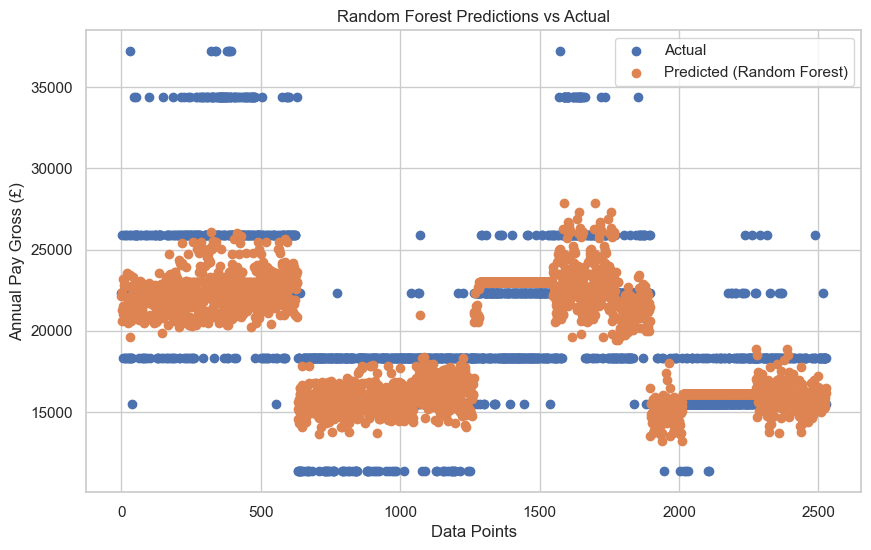

In [196]:
# Train-test split
train_size = int(len(new_data_sample) * 0.8)
train, test = new_data_sample[:train_size], new_data_sample[train_size:]

# Features and target variable
features = [ 'year', 'work_type', 'Level_1_and_entry_level_qualifications', 'Level_2_qualifications', 'Level_3_qualifications', 'Other_qualifications', 'Aged_15_years_and_under']
target = 'Annual_pay_gross'

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# Use the best hyperparameters
# best_params = {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}
# best_rf_reg = RandomForestRegressor(
#     n_estimators=200,
#     min_samples_split=7,
#     min_samples_leaf=2,
#     max_features='sqrt',
#     max_depth=None,
#     random_state=0
# )

best_rf_reg = {
    'n_estimators': 200,
    'min_samples_split': 7,
    'min_samples_leaf': 2,
    'max_features':'sqrt',
    'max_depth':None,
    'random_state': 0
}

# Create and train the Random Forest model with best hyperparameters
model_rf = RandomForestRegressor(**best_rf_reg)
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_best_rf_reg = mean_absolute_error(y_test, y_pred_best_rf_reg )
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error on Test Set (Random Forest): {mse_rf}')
print(f'Mean Absolute Error on Test Set (Random Forest): {mae_rf}')
print(f'R-squared on Test Set (Random Forest): {r2_rf}')

X_train.shape
print(len(X_train))
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test.values, label='Actual', marker='o')
plt.scatter(range(len(y_pred_rf)), y_pred_rf, label='Predicted (Random Forest)', marker='o')
plt.xlabel('Data Points')
plt.ylabel('Annual Pay Gross (£)')
plt.title('Random Forest Predictions vs Actual')
plt.legend()
plt.show()

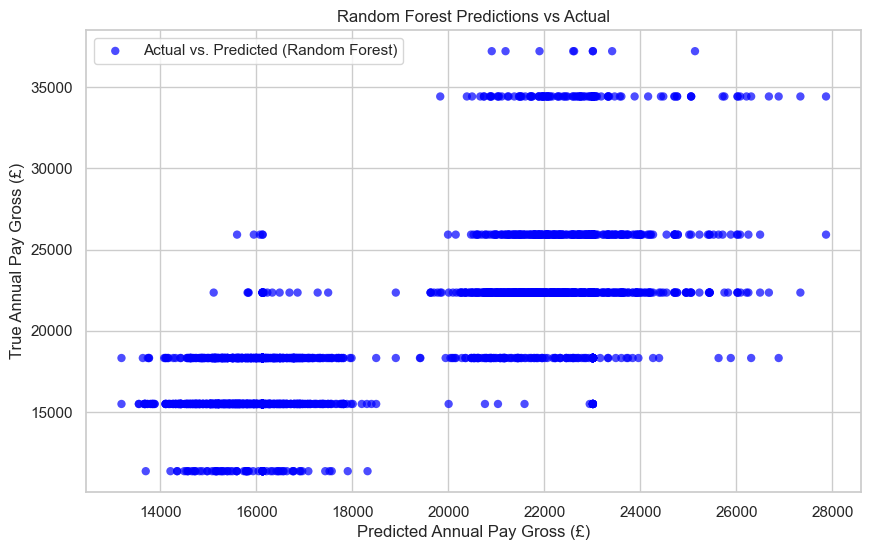

In [197]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, y_test.values, label='Actual vs. Predicted (Random Forest)', marker='o', color='blue', alpha=0.7, edgecolors='none')
plt.xlabel('Predicted Annual Pay Gross (£)')
plt.ylabel('True Annual Pay Gross (£)')
plt.title('Random Forest Predictions vs Actual')
plt.legend()
plt.show()
